# Anticipez les besoins en consommation électrique de bâtiments

# Modélisation

Tester différents modèles de prédiction afin de répondre au mieux à la
problématique.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pingouin as pg


# Lire fichier 
df = pd.read_csv('df_build.csv')

In [2]:
df_build = df.copy()

In [3]:
df_build.sample(4)

,Unnamed: 0,OSEBuildingID,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age
78,84,125,65.0,211.49,1.55,44.7,57.4,130862,132060.0,SPS-District K-12,K-12 School,1.0,1.0,47.563013,-122.311211,1,0,1,0,58
642,687,19860,24.0,13.99,0.20,69.1,68.1,26840,29040.0,NonResidential,Office,5.0,1.0,47.603877,-122.333743,1,0,0,0,109
934,990,21964,73.0,19.79,0.88,22.5,28.7,21765,21765.0,NonResidential,Worship Facility,2.0,1.0,47.674782,-122.382494,1,0,1,0,105
844,893,21397,50.0,73.01,1.49,56.1,67.7,45271,45271.0,NonResidential,Retail Store,2.0,1.0,47.623883,-122.338045,1,0,1,0,51


In [4]:
# Supprimer colonnes 'Unnamed: 0' 

df_build.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_build.sample(5)

,OSEBuildingID,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age
310,473,96.0,62.01,0.11,42.7,42.8,172371,168132.0,NonResidential,Office,5.0,1.0,47.623859,-122.335464,1,0,1,0,6
415,610,59.0,130.62,1.09,77.2,77.2,99440,65088.0,NonResidential,Office,7.0,1.0,47.598550,-122.333262,1,0,1,0,109
1300,25709,NaN,208.24,7.04,175.3,174.3,28800,21600.0,NonResidential,Hotel,3.0,1.0,47.597681,-122.324217,1,0,1,0,107
547,792,94.0,133.54,1.24,60.0,66.8,93610,101278.0,NonResidential,Office,1.0,1.0,47.556594,-122.331679,1,0,1,0,65
933,21955,NaN,13.35,0.43,36.4,37.4,23910,20000.0,NonResidential,Office,3.0,1.0,47.639826,-122.399062,1,0,1,0,88


## Encoder variables qualitatives/catégorielles

In [6]:
# Créer une liste avec les variables catégorielles
col_qual = ['BuildingType', 'LargestPropertyUseType', 
            'Electricity', 'NaturalGas', 
            'Steam', 'OtherFuel']

# Les 4  dernière ne servent à rien

In [7]:
for col in col_qual:
    print(df_build[col].unique())

['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus']
['Hotel' 'Police Station' 'Other - Entertainment/Public Assembly'
 'Library' 'Fitness Center/Health Club/Gym' 'Social/Meeting Hall'
 'Courthouse' 'Other' 'K-12 School' 'College/University'
 'Automobile Dealership' 'Office' 'Self-Storage Facility' 'Retail Store'
 'Senior Care Community' 'Medical Office'
 'Hospital (General Medical & Surgical)' 'Museum'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Other - Lodging/Residential' 'Residence Hall/Dormitory'
 'Other/Specialty Hospital' 'Financial Office'
 'Non-Refrigerated Warehouse' 'Distribution Center' 'Parking'
 'Multifamily Housing' 'Worship Facility' 'Laboratory'
 'Supermarket/Grocery Store' 'Convention Center'
 'Urgent Care/Clinic/Other Outpatient' 'Other - Services' 'Strip Mall'
 'Wholesale Club/Supercenter' 'Refrigerated Warehouse'
 'Other - Recreation' 'Lifestyle Center' 'Other - Public Services'
 'Data Center' 'Other - Mall' 'Manufacturing/Industrial Plant'

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Encoder les variables de la liste
for col in col_qual:
    # Définir l'encodeur
    encoder = OneHotEncoder(sparse=False)
    # Encoder
    df_build[col] = encoder.fit_transform(df_build[col].values.reshape(-1,1))
    # Afficher
    print(df_build[col])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1540    0.0
1541    0.0
1542    0.0
1543    0.0
1544    0.0
Name: BuildingType, Length: 1545, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1540    0.0
1541    0.0
1542    0.0
1543    0.0
1544    0.0
Name: LargestPropertyUseType, Length: 1545, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1540    0.0
1541    0.0
1542    0.0
1543    0.0
1544    0.0
Name: Electricity, Length: 1545, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1540    0.0
1541    0.0
1542    0.0
1543    0.0
1544    1.0
Name: NaturalGas, Length: 1545, dtype: float64
0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
1540    1.0
1541    1.0
1542    1.0
1543    1.0
1544    1.0
Name: Steam, Length: 1545, dtype: float64
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1540    1.0
1541    1.0

In [9]:
for col in col_qual:
    print(df_build[col].unique())

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]


In [10]:
df_build.sample(5)

,OSEBuildingID,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age
309,471,74.0,36.71,0.10,60.7,60.7,86700,79384.0,0.0,0.0,6.0,1.0,47.622626,-122.338058,0.0,1.0,1.0,1.0,11
788,21129,99.0,37.82,1.79,52.1,59.4,20516,10155.0,0.0,0.0,2.0,1.0,47.651155,-122.350302,0.0,1.0,0.0,1.0,104
810,21219,69.0,11.21,0.09,33.4,32.8,48112,48112.0,0.0,0.0,1.0,1.0,47.721613,-122.343286,0.0,1.0,1.0,1.0,43
912,21794,34.0,79.28,1.79,68.2,77.2,40809,40809.0,0.0,0.0,5.0,1.0,47.641712,-122.317386,0.0,1.0,0.0,1.0,47
901,21723,81.0,82.66,1.76,43.5,54.7,45680,45680.0,0.0,0.0,3.0,1.0,47.685739,-122.318417,0.0,1.0,0.0,1.0,107


## Définir les sous échantillons

### Définir target et features pour la prédiction de la consommation totale d’énergie

In [11]:
df_build['TotalEnergyConsumption'] = df_build['SiteEUIWN(kBtu/sf)'] * df_build['PropertyGFABuilding(s)']

In [12]:
sous_echantillon1 = df_build.drop(['OSEBuildingID', 'ENERGYSTARScore',
                                   'GHGEmissions(MetricTonsCO2e)', 
                                   'GHGEmissionsIntensity(kgCO2e/ft2)', 
                                   'SiteEUI(kBtu/sf)', 
                                   'SiteEUIWN(kBtu/sf)'], axis=1)

X1 = df_build.drop(['OSEBuildingID', 'ENERGYSTARScore',
                    'GHGEmissions(MetricTonsCO2e)', 
                    'GHGEmissionsIntensity(kgCO2e/ft2)', 
                    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                    'TotalEnergyConsumption'], axis=1)

# Consommation d'Energie multipliée par la surface
y1 = df_build['TotalEnergyConsumption']

sous_echantillon1.sample(5)

,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age,TotalEnergyConsumption
1489,37864,37864.0,0.0,0.0,1.0,1.0,47.561595,-122.385417,0.0,1.0,0.0,1.0,7,8761729.6
962,33385,33385.0,0.0,0.0,4.0,1.0,47.660787,-122.385871,0.0,1.0,1.0,1.0,7,1378800.5
417,75007,34647.0,0.0,0.0,4.0,1.0,47.599706,-122.333785,0.0,0.0,0.0,1.0,115,2865267.4
917,31600,31600.0,0.0,0.0,1.0,1.0,47.521832,-122.321335,0.0,1.0,0.0,1.0,36,3722480.0
470,98668,98668.0,0.0,0.0,5.0,1.0,47.624968,-122.359705,0.0,1.0,1.0,1.0,33,4696596.8


In [13]:
# Tester la normalité

data = sous_echantillon1
pg.normality(data, method = 'normaltest') # dv='TotalEnergyConsumption')

,W,pval,normal
PropertyGFABuilding(s),1693.194872,0.000000e+00,False
LargestPropertyUseTypeGFA,1655.064809,0.000000e+00,False
BuildingType,2218.198625,0.000000e+00,False
LargestPropertyUseType,3957.437617,0.000000e+00,False
NumberofFloors,1820.395605,0.000000e+00,False
NumberofBuildings,4076.457069,0.000000e+00,False
Latitude,19.060019,7.263893e-05,False
Longitude,21.196805,2.495584e-05,False
Electricity,3957.437617,0.000000e+00,False
Steam,1079.824842,3.303808e-235,False


### Définir target et features pour la prédiction des émissions de CO2 

In [14]:
df_build['TotalEmissionsCO2'] = df_build['GHGEmissionsIntensity(kgCO2e/ft2)'] * df_build['PropertyGFABuilding(s)']

In [15]:
sous_echantillon2 = df_build.drop(['OSEBuildingID', 'ENERGYSTARScore',
                                   'GHGEmissions(MetricTonsCO2e)', 
                                   'GHGEmissionsIntensity(kgCO2e/ft2)', 
                                   'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                                   'TotalEnergyConsumption'], axis=1)

X2 = df_build.drop(['OSEBuildingID', 'ENERGYSTARScore',
                    'GHGEmissions(MetricTonsCO2e)', 
                    'GHGEmissionsIntensity(kgCO2e/ft2)', 
                    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                    'TotalEmissionsCO2', 'TotalEnergyConsumption'], axis=1)

# Emissions de C02 multipliée par la surface
y2 = df_build['TotalEmissionsCO2']

sous_echantillon2.sample(5)

,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age,TotalEmissionsCO2
1251,51410,49621.0,0.0,0.0,1.0,1.0,47.572649,-122.396805,0.0,1.0,0.0,1.0,53,49867.70
663,21499,21499.0,0.0,0.0,3.0,1.0,47.662781,-122.305100,0.0,1.0,1.0,1.0,94,1289.94
567,68100,41624.0,0.0,0.0,6.0,1.0,47.658367,-122.312874,0.0,1.0,0.0,1.0,6,38136.00
1051,35224,33705.0,0.0,0.0,3.0,1.0,47.641083,-122.326227,0.0,1.0,1.0,1.0,15,3874.64
217,310490,269284.0,0.0,0.0,14.0,1.0,47.604037,-122.328773,0.0,1.0,0.0,1.0,14,310490.00


In [16]:
# Tester la normalité

data = sous_echantillon2
pg.normality(data, method = 'normaltest') # dv='TotalEnergyConsumption')

,W,pval,normal
PropertyGFABuilding(s),1693.194872,0.000000e+00,False
LargestPropertyUseTypeGFA,1655.064809,0.000000e+00,False
BuildingType,2218.198625,0.000000e+00,False
LargestPropertyUseType,3957.437617,0.000000e+00,False
NumberofFloors,1820.395605,0.000000e+00,False
NumberofBuildings,4076.457069,0.000000e+00,False
Latitude,19.060019,7.263893e-05,False
Longitude,21.196805,2.495584e-05,False
Electricity,3957.437617,0.000000e+00,False
Steam,1079.824842,3.303808e-235,False


## Transformation au log des targets

In [17]:
# Transfo log target 

# Toujours prendre +1 pour ne pas avoir log de 0 

# Inverse = Prendre expo et soustraire 1

In [18]:
y1.shape

(1545,)

In [19]:
y2.shape

(1545,)

In [20]:
def trans_log (y):
    y_log = (y+1).apply(np.log)
    return y_log

In [21]:
y1 = trans_log(y1)

In [22]:
y1.shape

(1545,)

In [23]:
y2 = trans_log(y2)

In [24]:
y2.shape

(1545,)

In [25]:
# Existe 2 NaN. Pourquoi????

## Créer les jeux d'entrainement et de test

### Consommation totale d'énergie

In [26]:
# Séparer les données

from sklearn import model_selection 

X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1.values, y1.values, test_size=0.3 ) # 30% des données dans le jeu de test

### Emissions de CO2

In [27]:
# Séparer les données

#from sklearn import model_selection 

X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2.values, y2.values, test_size=0.3 ) # 30% des données dans le jeu de test

## Sélection des features

### Consommation totale d'énergie

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
np.seterr(divide='ignore', invalid='ignore')

# Déterminer les 5 meilleures features 
X_5_best= SelectKBest(f_classif, k=5).fit(X1, y1)

# Créer une liste de booléens avec les 5 meilleures features 
mask = X_5_best.get_support() 

new_feat1 = [] 

for bool, feature in zip(mask, X1.columns):
    if bool:
        new_feat1.append(feature)

# Aficher la liste des 5 meilleures features 
print('Les meilleures features sont :{}'.format(new_feat1)) 

Les meilleures features sont :['BuildingType', 'LargestPropertyUseType', 'NumberofBuildings', 'Latitude', 'Longitude']


#### Conserver uniquement les features déterminées comme les meilleurs

In [29]:
X1 = X1[new_feat1]
X1.sample(5)

,BuildingType,LargestPropertyUseType,NumberofBuildings,Latitude,Longitude
855,0.0,0.0,1.0,47.621949,-122.349922
1378,0.0,0.0,1.0,47.654148,-122.326246
568,0.0,0.0,1.0,47.663757,-122.300217
143,0.0,0.0,1.0,47.698200,-122.321085
785,0.0,0.0,1.0,47.649772,-122.349222


### Emissions de CO2

In [30]:
# Déterminer les 5 meilleures features 
X_5_best= SelectKBest(f_classif, k=5).fit(X2, y2)

# Créer une liste de booléens avec les 5 meilleures features 
mask = X_5_best.get_support() 

new_feat2 = [] 

for bool, feature in zip(mask, X2.columns):
    if bool:
        new_feat2.append(feature)
        
# Aficher la liste des 5 meilleures features 
print('Les meilleures features sont :{}'.format(new_feat2)) 

Les meilleures features sont :['BuildingType', 'LargestPropertyUseType', 'NumberofBuildings', 'Steam', 'OtherFuel']


#### Conserver uniquement les features déterminées comme les meilleurs

In [31]:
X2 = X2[new_feat2]
X2.sample(5)

,BuildingType,LargestPropertyUseType,NumberofBuildings,Steam,OtherFuel
871,0.0,0.0,1.0,1.0,1.0
1194,0.0,0.0,1.0,1.0,1.0
1393,0.0,0.0,1.0,1.0,1.0
1541,0.0,0.0,1.0,1.0,1.0
1463,0.0,0.0,1.0,1.0,1.0


## Standardiser les données

In [32]:
from sklearn.preprocessing import StandardScaler

def standardiser(X_train, X_test):

    global X_train_std, X_test_std
    std_scale = StandardScaler().fit(X_train) 
    #std_y_scale = StandardScaler().fit(y_train.reshape(-1, 1))
    
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    #y_train_std = std_y_scale.transform(y_train.reshape(-1, 1))
    #y_test_std = std_y_scale.transform(y_test.reshape(-1, 1))
    
    print(X_train_std, X_test_std)

In [33]:
standardiser(X1_train, X1_test)
#y_train_std = np.ravel(y_train_std)
#y_test_std = np.ravel(y_test_std)
X1_train, X1_test = X_train_std, X_test_std

[[-0.30412774 -0.34535773 -0.1145465  ... -0.62693001  0.11032808
   1.08302489]
 [-0.04565552 -0.00296054 -0.1145465  ... -0.62693001  0.11032808
   0.1642372 ]
 [ 0.25215645  0.1132382  -0.1145465  ... -0.62693001  0.11032808
  -1.06081306]
 ...
 [-0.42709641 -0.41737775 -0.1145465  ...  1.59507439  0.11032808
   0.53175227]
 [-0.4535231  -0.44608909 -0.1145465  ...  1.59507439  0.11032808
   0.07235843]
 [ 0.16486827 -0.0178479  -0.1145465  ... -0.62693001  0.11032808
   1.08302489]] [[-0.42006708 -0.40974073 -0.1145465  ... -0.62693001  0.11032808
   1.26678243]
 [ 0.36669994  0.47215407 -0.1145465  ... -0.62693001  0.11032808
  -0.11139911]
 [-0.0162091   0.00836207 -0.1145465  ... -0.62693001  0.11032808
  -0.96893429]
 ...
 [-0.12165451 -0.21137149 -0.1145465  ... -0.62693001  0.11032808
  -1.2445706 ]
 [-0.37315858 -0.3587769  -0.1145465  ... -0.62693001  0.11032808
  -1.12206558]
 [-0.03364338 -0.06933134 -0.1145465  ...  1.59507439  0.11032808
  -0.69329799]]


In [34]:
standardiser(X2_train, X2_test)
#y_train_std = np.ravel(y_train_std)
#y_test_std = np.ravel(y_test_std)
X2_train, X2_test = X_train_std, X_test_std

[[-0.24392666 -0.2113175  -0.1059502  ... -0.63122706  0.09662851
  -1.31245381]
 [ 0.09371488  0.12314482 -0.1059502  ... -0.63122706  0.09662851
  -1.19045432]
 [ 0.1827897   0.05920035 -0.1059502  ... -0.63122706  0.09662851
   1.58503407]
 ...
 [-0.35269282 -0.32821198 -0.1059502  ...  1.58421598  0.09662851
   1.64603382]
 [-0.47219249 -0.45664209 -0.1059502  ... -0.63122706  0.09662851
  -0.18395853]
 [ 1.61978045  1.59581867 -0.1059502  ... -0.63122706  0.09662851
  -0.85495572]] [[ 0.62851497  0.67381493 -0.1059502  ...  1.58421598  0.09662851
  -1.0989547 ]
 [ 0.43399342  0.51726491 -0.1059502  ... -0.63122706  0.09662851
   0.09054032]
 [ 1.37631546  1.22741879  9.43839676 ... -0.63122706  0.09662851
  -0.549957  ]
 ...
 [-0.44736629 -0.52203208 -0.1059502  ... -0.63122706  0.09662851
   0.42603892]
 [-0.03229777 -0.20666764 -0.1059502  ...  1.58421598  0.09662851
   0.97503663]
 [ 0.91930014  0.98854561 -0.1059502  ...  1.58421598  0.09662851
  -0.2144584 ]]


# Modélisation

## Modèles naïfs testés

1 - Modèle aléatoire

In [35]:
from sklearn import metrics 
import timeit

def mod_naif_aleatoire(y, y_test): 
    
    global df_naif_al
    
    # Timer on
    start_time = timeit.default_timer()
    
    # Générer le modèle de prédiction aléatoire
    y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape) 
    
    # Timer off
    elapsed = timeit.default_timer() - start_time
    # Affichage temps
    print('Temps Test {:.2f}s'.format(elapsed))
    print('*******************************************************')
    
    # Retransformer les y avant de calculer les métrics
    y_test = np.exp(y_test)-1 
    y_pred_random = np.exp(y_pred_random)-1 
    
    # Metrics
    MSE = metrics.mean_squared_error(y_test, y_pred_random)
    print('MSE : {:.2f}'.format(MSE))
    MedAE = metrics.median_absolute_error(y_test, y_pred_random)
    print('MedAE : {:.2f}'.format(MedAE))
    MeanAE = metrics.mean_absolute_error(y_test, y_pred_random)
    print('MeanAE : {:.2f}'.format(MeanAE))
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))
    print('RMSE : {:.2f}'.format(RMSE))
    R2 = metrics.r2_score(y_test, y_pred_random)
    print('R2 : {:.2f}'.format(R2))
    
    var_stat_test = [MedAE, MeanAE, MSE, RMSE, R2, elapsed]
    stat_test_naif_al = pd.Series(var_stat_test)

    var_stat = ['MedAE','MeanAE','MSE','RMSE','R2', 'Temps (en s)']
    stat_naif_al = pd.Series(var_stat)
    
    df_stat_naif_al = pd.DataFrame(stat_naif_al, columns = ['Variable Stat'])
    df_stat_test_naif_al = pd.DataFrame(stat_test_naif_al, columns = ['Naïf Aléatoire (Test)'])

    df_naif_al = pd.concat([df_stat_naif_al, df_stat_test_naif_al], axis=1)
    print(df_naif_al)
    print(type(df_naif_al))

2 - Modèle moyennes

In [36]:
from sklearn import dummy

def mod_naif_moyennes(X_train, y_train, X_test, y_test):  
    
    global df_naif_moy
    
    # Générer le modèle qui retourne la moyenne 
    dum = dummy.DummyRegressor(strategy='mean')

    # Timer entrainement on
    start_time_train = timeit.default_timer()

    # Entraînement du modèle
    dum.fit(X_train, y_train)
    
    # Timer entrainement off
    elapsed_train = timeit.default_timer() - start_time_train
    # Timer test on
    start_time_test = timeit.default_timer()

    # Prédiction sur le jeu de test
    y_pred_dum = dum.predict(X_test)
    
    # Timer test off
    elapsed_test = timeit.default_timer() - start_time_test
    
    # Valeurs
    y_train_pred = dum.predict(X_train)
     
    # Affichage temps
    print('Temps Entrainement {:.2f}s'.format(elapsed_train))
    print('Temps Test {:.2f}s'.format(elapsed_test))
    print('*******************************************************')
    
    # Retransformer les y avant de calculer les métrics
    y_test = np.exp(y_test)-1 
    y_pred_dum = np.exp(y_pred_dum)-1 
    
    y_train = np.exp(y_train)-1 
    y_train_pred = np.exp(y_train_pred)-1 
    
    # Metrics train test
    MSE = metrics.mean_squared_error(y_test, y_pred_dum)
    print('MSE : {:.2f}'.format(MSE))
    MedAE = metrics.median_absolute_error(y_test, y_pred_dum)
    print('MedAE : {:.2f}'.format(MedAE))
    MeanAE = metrics.mean_absolute_error(y_test, y_pred_dum)
    print('MeanAE : {:.2f}'.format(MeanAE))
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))
    print('RMSE : {:.2f}'.format(RMSE))
    R2 = metrics.r2_score(y_test, y_pred_dum)
    print('R2 : {:.2f}'.format(R2))
    
    var_stat_test = [MedAE, MeanAE, MSE, RMSE, R2, elapsed_test]
    stat_test_naif_moy = pd.Series(var_stat_test)
    
    print('*******************************************************')
    
    # Metrics train set (sur-apprentissage?)
    print('Statistiques du Train Set')
    MSE = metrics.mean_squared_error(y_train, y_train_pred)
    print('MSE : {}'.format(MSE))
    MedAE = metrics.median_absolute_error(y_train, y_train_pred)
    print('MedAE : {:.2f}'.format(MedAE))
    MeanAE = metrics.mean_absolute_error(y_train, y_train_pred)
    print('MeanAE : {:.2f}'.format(MeanAE))
    RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    print('RMSE : {:.2f}'.format(RMSE))
    R2 = metrics.r2_score(y_train, y_train_pred)
    print('R2 : {:.2f}'.format(R2))  
                     
    var_stat_train = [MedAE, MeanAE, MSE, RMSE, R2, elapsed_train]
    stat_train_naif_moy = pd.Series(var_stat_train)

    var_stat = ['MedAE','MeanAE','MSE','RMSE','R2', 'Temps (en s)']
    stat_naif_moy = pd.Series(var_stat)
    
    df_stat_naif_moy = pd.DataFrame(stat_naif_moy, columns = ['Variable Stat'])
    df_stat_test_naif_moy = pd.DataFrame(stat_test_naif_moy, columns = ['Naïf Moyennes (Test)'])
    df_stat_train_naif_moy = pd.DataFrame(stat_train_naif_moy, columns = ['Naïf Moyennes (Entrainement)'])    

    df_naif_moy = pd.concat([df_stat_naif_moy, df_stat_test_naif_moy, df_stat_train_naif_moy], axis=1)
    print(df_naif_moy)
    print(type(df_naif_moy))

## Modèles testés

In [37]:
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon


def modelisation(model, param_grid, cv, 
                  X_train, y_train, X_test, y_test, 
                  nom_model_test, nom_model_entrainement):
    
    global df_model
    
    predicteur = model
    
    param_grid = param_grid
    
    cv=cv
    
    grid = RandomizedSearchCV(estimator=predicteur, 
                              param_distributions=param_grid,
                              cv=cv,
                              random_state=0)
    
    # Timer entrainement on
    start_time_train = timeit.default_timer()
    
    # Exécuter la validation croisée sur le jeu d'entraînement
    grid.fit(X_train, y_train)
    
    # Timer entrainement off
    elapsed_train = timeit.default_timer() - start_time_train
        
    # Valeurs estimées sur échantillon d'entrainement
    y_train_pred = grid.predict(X_train)
    
    # Afficher les paramètres optimaux
    print("Les paramètres optimaux sont {}".format(grid.best_params_))    

    # Timer test on
    start_time_test = timeit.default_timer()

    # Prédire sur le jeu de test avec le modèle sélectionné 
    y_test_pred = grid.predict(X_test)
    
    # Timer test off
    elapsed_test = timeit.default_timer() - start_time_test
    
    # Affichage temps
    print('Temps Entrainement {:.2f}s'.format(elapsed_train))
    print('Temps Test {:.2f}s'.format(elapsed_test))
    print('*******************************************************')

    # Retransformer les y avant de calculer les métrics
    y_test = np.exp(y_test)-1 
    y_test_pred = np.exp(y_test_pred)-1 
    
    y_train = np.exp(y_train)-1 
    y_train_pred = np.exp(y_train_pred)-1 
    
    # Metrics test set 
    print('Statistiques du Test Set')
    MSE = metrics.mean_squared_error(y_test, y_test_pred)
    print('MSE : {}'.format(MSE))
    MedAE = metrics.median_absolute_error(y_test, y_test_pred)
    print("MedAE : {:.2f}".format(MedAE))
    MeanAE = metrics.mean_absolute_error(y_test, y_test_pred)
    print("MeanAE : {:.2f}".format(MeanAE))
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print("RMSE : {:.2f}".format(RMSE))
    R2 = metrics.r2_score(y_test, y_test_pred)
    print("R2 : {:.2f}".format(R2))
    
    var_stat_test = [MedAE, MeanAE, MSE, RMSE, R2, elapsed_test]
    stat_test = pd.Series(var_stat_test)
    
    print('******************************************************')
    
    # Metrics train set (sur-apprentissage?)
    print('Statistiques du Train Set')
    MSE = metrics.mean_squared_error(y_train, y_train_pred)
    print('MSE : {}'.format(MSE))
    MedAE = metrics.median_absolute_error(y_train, y_train_pred)
    print('MedAE : {:.2f}'.format(MedAE))
    MeanAE = metrics.mean_absolute_error(y_train, y_train_pred)
    print('MeanAE : {:.2f}'.format(MeanAE))
    RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    print('RMSE : {:.2f}'.format(RMSE))
    R2 = metrics.r2_score(y_train, y_train_pred)
    print('R2 : {:.2f}'.format(R2))  

    var_stat_train = [MedAE, MeanAE, MSE, RMSE, R2, elapsed_train]
    stat_train = pd.Series(var_stat_train)

    var_stat = ['MedAE','MeanAE','MSE','RMSE','R2', 'Temps (en s)']
    stat = pd.Series(var_stat)
    
    df_stat = pd.DataFrame(stat, columns = ['Variable Stat'])
    df_stat_test = pd.DataFrame(stat_test, columns = [nom_model_test])
    df_stat_train = pd.DataFrame(stat_train, columns = [nom_model_entrainement])

    df_model = pd.concat([df_stat, df_stat_test, df_stat_train], axis=1)
    print(df_model)
    print(type(df_model))
  
    
    
    # Visualiser les résultats 
    plt.scatter(y_test, y_test_pred, color='coral')

    plt.xlabel('Vraies valeurs')
    plt.ylabel('Valeurs prédites')


    # Utiliser comme marqueurs des cercles 
    # dont la taille est proportionnelle 
    # au nombre de points qui sont présents à ces coordonnées.

    sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées

    for (yt, yp) in zip(list(y_test), list(y_test_pred)):
        if (yt, yp) in sizes: sizes[(yt, yp)] += 1
        else:
            sizes[(yt, yp)] = 1

    keys = sizes.keys() 

    plt.scatter([k[0] for k in keys], 
                [k[1] for k in keys], 
                s=[sizes[k] for k in keys], 
                color='coral', alpha =0.8)

    plt.xlabel('Vraies valeurs')
    plt.ylabel('Valeurs prédites')
    

## Comparaison des modèles entre eux

In [38]:
def comparaison(df_lin_cl, df_lin_rid, df_lin_las, df_lin_elnet,df_kr_rbf, df_rf_reg, df_svr_rbf, df_knn, ylimRMSE=[0, 8*10**6], ylimMedAE=[0, 3*10**4], ylimMeanAE=[0, 3*10**5]):
    
    global df_mod_T
    
    # Concaténer les df des résultats des différents modèles
    df_mod = pd.concat([df_lin_cl, df_lin_rid, df_lin_las, df_lin_elnet, df_kr_rbf, df_rf_reg, df_svr_rbf, df_knn], axis=1)
    df_mod = df_mod.drop(['Variable Stat'], axis=1)
    
    # Tranposer le df
    df_mod_T = df_mod.T
    
    # Renommer les colonnes
    df_mod_T.columns = ['MedAE','MeanAE','MSE','RMSE','R2', 'Temps (en s)']
    
    # Créer une colonne pour les modèles
    modeles_list = ['Lineaire Classique', 'Lineaire Classique',
                'Lineaire Ridge', 'Lineaire Ridge', 
                'Lineaire LassoLars', 'Lineaire LassoLars', 
                'Lineaire ElasticNet', 'Lineaire ElasticNet', 
                'Ridge avec Kernel rbf', 'Ridge avec Kernel rbf', 
                'Random Forest Regression', 'Random Forest Regression',
                'Support Vector Regression rbf', 'Support Vector Regression rbf',
                'KNeighbors Regression', 'KNeighbors Regression'
               ] 
    df_mod_T['Modeles'] = modeles_list
    
    # Créer une colonne pour différencier les jeux
    set_list = ['Test', 'Entrainement', 'Test', 'Entrainement', 
                'Test', 'Entrainement', 'Test', 'Entrainement', 
                'Test', 'Entrainement', 'Test', 'Entrainement', 
                'Test', 'Entrainement', 'Test', 'Entrainement']
    df_mod_T['Set'] = set_list
    
    
    # Visulalisations 
    # Visualisation R2  
    plt.figure()
    ax = sns.catplot(x='Modeles', y='R2', 
            hue='Set', 
            kind="bar", palette='mako',
            data=df_mod_T);
    ax.set_xticklabels(rotation=75, size=13)
    ax.set_yticklabels(size=13)
    # Titre
    plt.title('R2', size=20)
    # Limites des axes
    plt.ylim([0, 1])
    #plt.yticks(np.arange(0, 1, step=0.2)) 
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1], ['0.2', '0.4', '0.6', '0.8', '1'])
    
    # Visualisation RMSE
    plt.figure()
    bx = sns.catplot(x='Modeles', y='RMSE', 
            hue='Set', 
            kind="bar", palette='mako',
            data=df_mod_T);
    bx.set_xticklabels(rotation=75, size=13)
    bx.set_yticklabels(size=13)
    # Titre
    plt.title('RMSE', size=20)
    # Limites des axes
    plt.ylim(ylimRMSE)
    
    # Visualisation MedAE
    plt.figure()
    cx = sns.catplot(x='Modeles', y='MedAE', 
            hue='Set', 
            kind="bar", palette='mako',
            data=df_mod_T);
    cx.set_xticklabels(rotation=75, size=13)
    cx.set_yticklabels(size=13)
    # Titre
    plt.title('MedAE', size=20)
    # Limites des axes
    plt.ylim(ylimMedAE)
    
    # Visualisation MeanAE
    plt.figure()
    dx = sns.catplot(x='Modeles', y='MeanAE', 
            hue='Set', 
            kind="bar", palette='mako',
            data=df_mod_T);
    dx.set_xticklabels(rotation=75, size=13)
    dx.set_yticklabels(size=13)
    # Titre
    plt.title('MeanAE', size=20)
    # Limites des axes
    plt.ylim(ylimMeanAE)

# Modèles de Prédictions de la consommation totale d'énergie

## Modèles naïfs

1 - Modèle aléatoire

In [39]:
mod_naif_aleatoire(y1, y1_test)

Temps Test 0.00s
*******************************************************
MSE : 684184061279440.38
MedAE : 3122660.79
MeanAE : 11952229.07
RMSE : 26156912.30
R2 : -0.89
  Variable Stat  Naïf Aléatoire (Test)
0         MedAE           3.122661e+06
1        MeanAE           1.195223e+07
2           MSE           6.841841e+14
3          RMSE           2.615691e+07
4            R2          -8.945744e-01
5  Temps (en s)           3.331740e-04
<class 'pandas.core.frame.DataFrame'>


In [40]:
df_naif_al

,Variable Stat,Naïf Aléatoire (Test)
0,MedAE,3.122661e+06
1,MeanAE,1.195223e+07
2,MSE,6.841841e+14
3,RMSE,2.615691e+07
4,R2,-8.945744e-01
5,Temps (en s),3.331740e-04


2 - Modèle moyennes

In [41]:
mod_naif_moyennes(X1_train, y1_train, X1_test, y1_test)

Temps Entrainement 0.00s
Temps Test 0.00s
*******************************************************
MSE : 382741222678557.25
MedAE : 1735847.15
MeanAE : 5979733.13
RMSE : 19563773.22
R2 : -0.06
*******************************************************
Statistiques du Train Set
MSE : 388170724477031.6
MedAE : 1923257.80
MeanAE : 6572806.54
RMSE : 19702048.74
R2 : -0.07
  Variable Stat  Naïf Moyennes (Test)  Naïf Moyennes (Entrainement)
0         MedAE          1.735847e+06                  1.923258e+06
1        MeanAE          5.979733e+06                  6.572807e+06
2           MSE          3.827412e+14                  3.881707e+14
3          RMSE          1.956377e+07                  1.970205e+07
4            R2         -5.984888e-02                 -7.403645e-02
5  Temps (en s)          4.381100e-05                  2.349830e-04
<class 'pandas.core.frame.DataFrame'>


In [42]:
df_naif_moy

,Variable Stat,Naïf Moyennes (Test),Naïf Moyennes (Entrainement)
0,MedAE,1.735847e+06,1.923258e+06
1,MeanAE,5.979733e+06,6.572807e+06
2,MSE,3.827412e+14,3.881707e+14
3,RMSE,1.956377e+07,1.970205e+07
4,R2,-5.984888e-02,-7.403645e-02
5,Temps (en s),4.381100e-05,2.349830e-04


## Modèles linéaires

### Modèle linéaire classique

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Les paramètres optimaux sont {}
Temps Entrainement 0.04s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 1909110547266830.2
MedAE : 1535994.67
MeanAE : 7225818.87
RMSE : 43693369.60
R2 : -4.29
******************************************************
Statistiques du Train Set
MSE : 625963954114305.2
MedAE : 1585427.58
MeanAE : 6248272.32
RMSE : 25019271.65
R2 : -0.73
  Variable Stat  Linéaire classique (Test)  Linéaire classique (Entrainement)
0         MedAE               1.535995e+06                       1.585428e+06
1        MeanAE               7.225819e+06                       6.248272e+06
2           MSE               1.909111e+15                       6.259640e+14
3          RMSE               4.369337e+07                       2.501927e+07
4            R2              -4.286519e+00                      -7.319908e-01
5  Temps (en s)               3.831280e-04                       3.616341e-02
<class 'pandas.core.frame.DataF

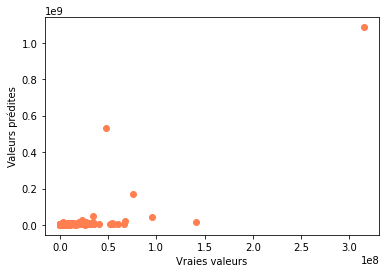

In [43]:
model1 = linear_model.LinearRegression(normalize=0)

param_grid1 = {}

cv=5

modelisation(model1, param_grid1, cv, 
             X1_train, y1_train, X1_test, y1_test, 
             'Linéaire classique (Test)', 'Linéaire classique (Entrainement)')

In [44]:
df_lin_cl = df_model
df_lin_cl

,Variable Stat,Linéaire classique (Test),Linéaire classique (Entrainement)
0,MedAE,1.535995e+06,1.585428e+06
1,MeanAE,7.225819e+06,6.248272e+06
2,MSE,1.909111e+15,6.259640e+14
3,RMSE,4.369337e+07,2.501927e+07
4,R2,-4.286519e+00,-7.319908e-01
5,Temps (en s),3.831280e-04,3.616341e-02


### Modèle linéaire ridge

Les paramètres optimaux sont {'alpha': 0.09658832241158703}
Temps Entrainement 0.10s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 340519416287588.56
MedAE : 1503718.35
MeanAE : 5210102.70
RMSE : 18453168.19
R2 : 0.06
******************************************************
Statistiques du Train Set
MSE : 305319825050702.9
MedAE : 1564392.24
MeanAE : 5640752.02
RMSE : 17473403.36
R2 : 0.16
  Variable Stat  Ridge linéaire (Test)  Ridge linéaire (Entrainement)
0         MedAE           1.503718e+06                   1.564392e+06
1        MeanAE           5.210103e+06                   5.640752e+06
2           MSE           3.405194e+14                   3.053198e+14
3          RMSE           1.845317e+07                   1.747340e+07
4            R2           5.706754e-02                   1.552052e-01
5  Temps (en s)           4.205160e-04                   9.740010e-02
<class 'pandas.core.frame.DataFrame'>


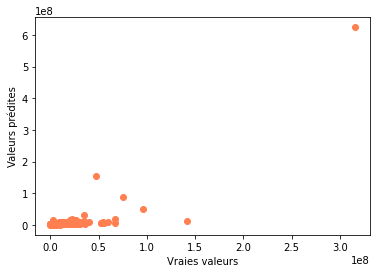

In [47]:
model2 =  linear_model.Ridge(normalize=True, random_state=0, max_iter=500) 
                    
param_grid2 = {'alpha': np.logspace(-2, 0, 200)}

cv=5

modelisation(model2, param_grid2, cv, 
                  X1_train, y1_train, X1_test, y1_test, 
                  'Ridge linéaire (Test)', 'Ridge linéaire (Entrainement)')

In [48]:
df_lin_rid = df_model
df_lin_rid

,Variable Stat,Ridge linéaire (Test),Ridge linéaire (Entrainement)
0,MedAE,1.503718e+06,1.564392e+06
1,MeanAE,5.210103e+06,5.640752e+06
2,MSE,3.405194e+14,3.053198e+14
3,RMSE,1.845317e+07,1.747340e+07
4,R2,5.706754e-02,1.552052e-01
5,Temps (en s),4.205160e-04,9.740010e-02


### Modèle linéaire lasso 

Les paramètres optimaux sont {'alpha': 0.0014992684327860455}
Temps Entrainement 0.13s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 168794542631159.62
MedAE : 1454519.28
MeanAE : 4864990.47
RMSE : 12992095.39
R2 : 0.53
******************************************************
Statistiques du Train Set
MSE : 276353142662673.28
MedAE : 1553189.13
MeanAE : 5522573.94
RMSE : 16623872.67
R2 : 0.24
  Variable Stat  Lasso-Lars (Test)  Lasso-Lars (Entrainement)
0         MedAE       1.454519e+06               1.553189e+06
1        MeanAE       4.864990e+06               5.522574e+06
2           MSE       1.687945e+14               2.763531e+14
3          RMSE       1.299210e+07               1.662387e+07
4            R2       5.325910e-01               2.353536e-01
5  Temps (en s)       4.229270e-04               1.295094e-01
<class 'pandas.core.frame.DataFrame'>


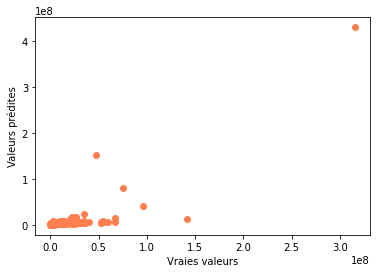

In [66]:
model3 = linear_model.LassoLars(normalize=True, max_iter=500) 

param_grid3 = {'alpha': np.logspace(-3, 4, 200)}

cv=5

modelisation(model3, param_grid3, cv, 
                  X1_train, y1_train, X1_test, y1_test, 
                  'Lasso-Lars (Test)', 'Lasso-Lars (Entrainement)')

In [67]:
df_lin_las = df_model
df_lin_las

,Variable Stat,Lasso-Lars (Test),Lasso-Lars (Entrainement)
0,MedAE,1.454519e+06,1.553189e+06
1,MeanAE,4.864990e+06,5.522574e+06
2,MSE,1.687945e+14,2.763531e+14
3,RMSE,1.299210e+07,1.662387e+07
4,R2,5.325910e-01,2.353536e-01
5,Temps (en s),4.229270e-04,1.295094e-01


### Modèle linéaire elasticnet

Les paramètres optimaux sont {'l1_ratio': 0.7001671886887706, 'alpha': 0.00047686116977144693}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 140572494333136.11
MedAE : 1495065.55
MeanAE : 4692433.16
RMSE : 11856327.19
R2 : 0.61
******************************************************
Statistiques du Train Set
MSE : 296703447312121.5
MedAE : 1557336.81
MeanAE : 5635154.51
RMSE : 17225081.92
R2 : 0.18
  Variable Stat  ElasticNet (Test)  ElasticNet (Entrainement)
0         MedAE       1.495066e+06               1.557337e+06
1        MeanAE       4.692433e+06               5.635155e+06
2           MSE       1.405725e+14               2.967034e+14
3          RMSE       1.185633e+07               1.722508e+07
4            R2       6.107406e-01               1.790460e-01
5  Temps (en s)       1.119630e-04               9.410575e-02
<class 'pandas.core.frame.DataFrame'>


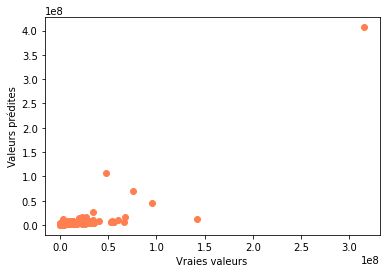

In [78]:
model4 = linear_model.ElasticNet(normalize=True, random_state=0, max_iter=500) 

param_grid4 = {'alpha': np.logspace(-4, 1, 200), 
               'l1_ratio':  np.random.random(100)}

cv=5

modelisation(model4, param_grid4, cv, 
                  X1_train, y1_train, X1_test, y1_test, 
                  'ElasticNet (Test)', 'ElasticNet (Entrainement)')

In [79]:
df_lin_elnet = df_model
df_lin_elnet

,Variable Stat,ElasticNet (Test),ElasticNet (Entrainement)
0,MedAE,1.495066e+06,1.557337e+06
1,MeanAE,4.692433e+06,5.635155e+06
2,MSE,1.405725e+14,2.967034e+14
3,RMSE,1.185633e+07,1.722508e+07
4,R2,6.107406e-01,1.790460e-01
5,Temps (en s),1.119630e-04,9.410575e-02


## Modèles non-linéaires

### Modèle non-linéaire - Ridge avec Kernel rbf 

Les paramètres optimaux sont {'gamma': 0.0011097524964120721, 'alpha': 0.1956398343517063}
Temps Entrainement 1.12s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 287594423054119.94
MedAE : 1359533.74
MeanAE : 4803063.59
RMSE : 16958609.11
R2 : 0.20
******************************************************
Statistiques du Train Set
MSE : 251191035786594.06
MedAE : 1428702.26
MeanAE : 5030541.40
RMSE : 15849007.41
R2 : 0.30
  Variable Stat  Ridge avec Kernel rbf (Test)  \
0         MedAE                  1.359534e+06   
1        MeanAE                  4.803064e+06   
2           MSE                  2.875944e+14   
3          RMSE                  1.695861e+07   
4            R2                  2.036222e-01   
5  Temps (en s)                  6.356001e-03   

   Ridge avec Kernel rbf (Entrainement)  
0                          1.428702e+06  
1                          5.030541e+06  
2                          2.511910e+14  
3      

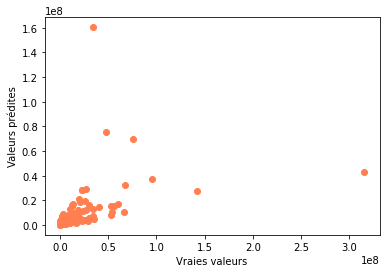

In [99]:
model5 = KernelRidge(kernel='rbf') # noyau Gaussien

param_grid5 = {'alpha': np.logspace(-3, 0, 200), 
               'gamma': np.logspace(-3, 0, 200)}

cv=5

modelisation(model5, param_grid5, cv, 
                  X1_train, y1_train, X1_test, y1_test, 
                  'Ridge avec Kernel rbf (Test)', 'Ridge avec Kernel rbf (Entrainement)')

In [100]:
df_kr_rbf = df_model
df_kr_rbf

,Variable Stat,Ridge avec Kernel rbf (Test),Ridge avec Kernel rbf (Entrainement)
0,MedAE,1.359534e+06,1.428702e+06
1,MeanAE,4.803064e+06,5.030541e+06
2,MSE,2.875944e+14,2.511910e+14
3,RMSE,1.695861e+07,1.584901e+07
4,R2,2.036222e-01,3.049751e-01
5,Temps (en s),6.356001e-03,1.121695e+00


### Modèle non-linéaire - Random Forest Regression

Les paramètres optimaux sont {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 5}
Temps Entrainement 14.58s
Temps Test 0.11s
*******************************************************
Statistiques du Test Set
MSE : 313879546997211.56
MedAE : 1093475.57
MeanAE : 4621621.58
RMSE : 17716646.04
R2 : 0.13
******************************************************
Statistiques du Train Set
MSE : 295798963730635.0
MedAE : 984478.53
MeanAE : 4717347.45
RMSE : 17198807.04
R2 : 0.18
  Variable Stat  Random Forest Regression (Test)  \
0         MedAE                     1.093476e+06   
1        MeanAE                     4.621622e+06   
2           MSE                     3.138795e+14   
3          RMSE                     1.771665e+07   
4            R2                     1.308360e-01   
5  Temps (en s)                     1.088805e-01   

   Random Forest Regression (Entrainement)  
0                             9.844785e+05  
1                             4.717347e+06  
2                   

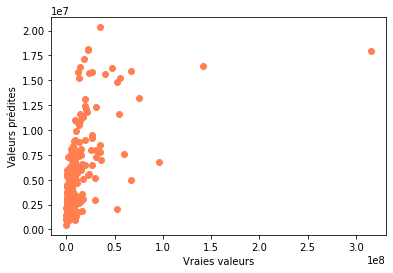

In [101]:
model6 = RandomForestRegressor(random_state=0, #à fixer pour avoir la même série de nb aléatoire 
                               n_jobs=-1, oob_score = True)

param_grid6 = {'n_estimators': [50, 200], # nb arbre # dpd du jeu de données # pas dans la GSCV #perte mémmoire et temps cal
               'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth': [2, 3, 4, 5], # pas 1 pour prof arbre
              }

cv=5

modelisation(model6, param_grid6, cv, 
                  X1_train, y1_train, X1_test, y1_test, 
                  'Random Forest Regression (Test)', 'Random Forest Regression (Entrainement)')

In [102]:
df_rf_reg = df_model
df_rf_reg

,Variable Stat,Random Forest Regression (Test),Random Forest Regression (Entrainement)
0,MedAE,1.093476e+06,9.844785e+05
1,MeanAE,4.621622e+06,4.717347e+06
2,MSE,3.138795e+14,2.957990e+14
3,RMSE,1.771665e+07,1.719881e+07
4,R2,1.308360e-01,1.815486e-01
5,Temps (en s),1.088805e-01,1.458127e+01


### Modèle non-linéaire - Support Vector Regression avec Kernel rbf

Les paramètres optimaux sont {'gamma': 0.011895340673703195, 'C': 11.357333583431052}
Temps Entrainement 2.79s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 102136600241629.0
MedAE : 1121157.45
MeanAE : 3790580.61
RMSE : 10106265.40
R2 : 0.72
******************************************************
Statistiques du Train Set
MSE : 141668830409529.8
MedAE : 1077504.59
MeanAE : 3674767.67
RMSE : 11902471.61
R2 : 0.61
  Variable Stat  Support Vector Regression (Test)  \
0         MedAE                      1.121157e+06   
1        MeanAE                      3.790581e+06   
2           MSE                      1.021366e+14   
3          RMSE                      1.010627e+07   
4            R2                      7.171735e-01   
5  Temps (en s)                      1.053220e-02   

   Support Vector Regression (Entrainement)  
0                              1.077505e+06  
1                              3.674768e+06  
2               

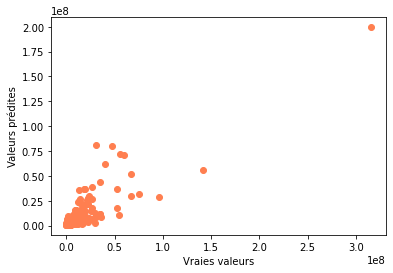

In [104]:
model7 = SVR(kernel='rbf', epsilon=.1)

param_grid7 = {'C': np.logspace(-2, 2, 200), 
               'gamma': np.logspace(-2, 3, 200)}

cv=5

modelisation(model7, param_grid7, cv, 
                  X1_train, y1_train, X1_test, y1_test, 
                  'Support Vector Regression (Test)', 'Support Vector Regression (Entrainement)')

In [105]:
df_svr_rbf = df_model
df_svr_rbf

,Variable Stat,Support Vector Regression (Test),Support Vector Regression (Entrainement)
0,MedAE,1.121157e+06,1.077505e+06
1,MeanAE,3.790581e+06,3.674768e+06
2,MSE,1.021366e+14,1.416688e+14
3,RMSE,1.010627e+07,1.190247e+07
4,R2,7.171735e-01,6.080140e-01
5,Temps (en s),1.053220e-02,2.790795e+00


### Modèle non-linéaire - Support Vector Regression avec Kernel polynomial 

NB: pas supporté par mon ordinateur

### Modèle non-linéaire - KNN

Les paramètres optimaux sont {'n_neighbors': 4, 'metric': 'manhattan'}
Temps Entrainement 0.28s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 313646722052483.8
MedAE : 1374214.72
MeanAE : 4582206.47
RMSE : 17710074.03
R2 : 0.13
******************************************************
Statistiques du Train Set
MSE : 183663056145937.38
MedAE : 1043580.66
MeanAE : 3924885.37
RMSE : 13552234.36
R2 : 0.49
  Variable Stat  K Nearest Neighbors (Test)  \
0         MedAE                1.374215e+06   
1        MeanAE                4.582206e+06   
2           MSE                3.136467e+14   
3          RMSE                1.771007e+07   
4            R2                1.314807e-01   
5  Temps (en s)                8.978398e-03   

   K Nearest Neighbors (Entrainement)  
0                        1.043581e+06  
1                        3.924885e+06  
2                        1.836631e+14  
3                        1.355223e+07  
4         

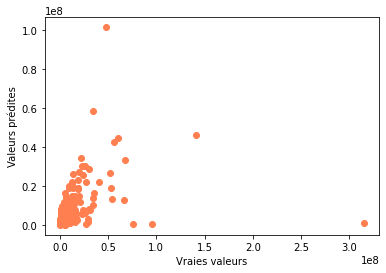

In [106]:
model8 = KNeighborsRegressor()

param_grid8 = {'n_neighbors': np.arange(1, 25),
               'metric': ['euclidean', 'manhattan', 'minkowski']} 

cv=5

modelisation(model8, param_grid8, cv, 
                  X1_train, y1_train, X1_test, y1_test, 
                  'K Nearest Neighbors (Test)', 'K Nearest Neighbors (Entrainement)')

In [107]:
df_knn = df_model
df_knn

,Variable Stat,K Nearest Neighbors (Test),K Nearest Neighbors (Entrainement)
0,MedAE,1.374215e+06,1.043581e+06
1,MeanAE,4.582206e+06,3.924885e+06
2,MSE,3.136467e+14,1.836631e+14
3,RMSE,1.771007e+07,1.355223e+07
4,R2,1.314807e-01,4.918194e-01
5,Temps (en s),8.978398e-03,2.770334e-01


## Comparaison des modèles entre eux

<Figure size 432x288 with 0 Axes>

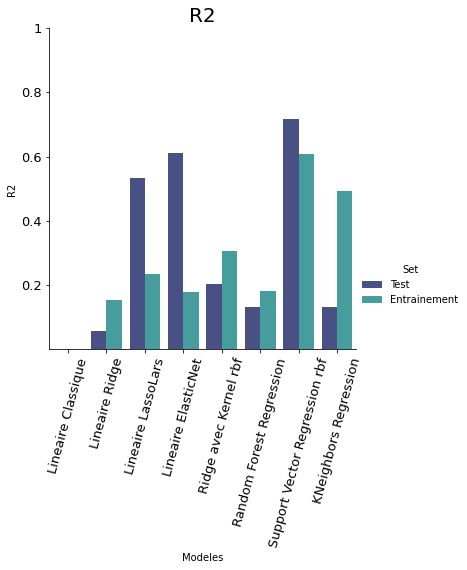

<Figure size 432x288 with 0 Axes>

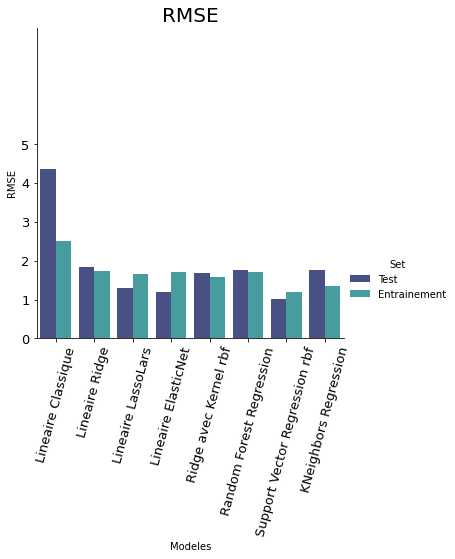

<Figure size 432x288 with 0 Axes>

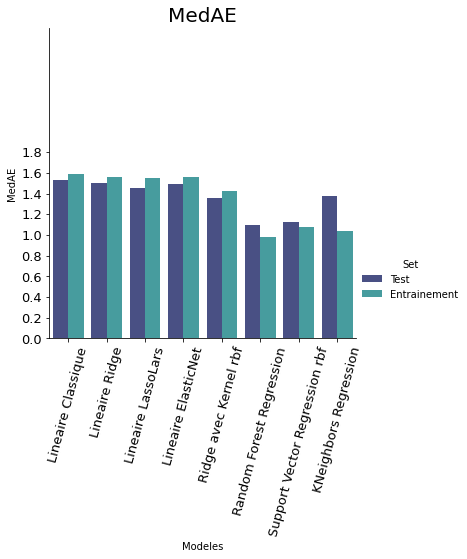

<Figure size 432x288 with 0 Axes>

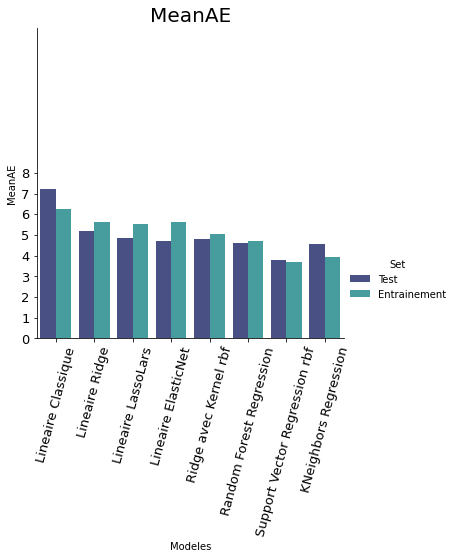

In [108]:
comparaison(df_lin_cl, df_lin_rid, df_lin_las, df_lin_elnet, df_kr_rbf, df_rf_reg, df_svr_rbf, df_knn, [0, 8*10**7], [0, 3*10**6], [0, 1.5*10**7])

In [109]:
df_mod_Energy = df_mod_T
df_mod_Energy

,MedAE,MeanAE,MSE,RMSE,R2,Temps (en s),Modeles,Set
Linéaire classique (Test),1.535995e+06,7.225819e+06,1.909111e+15,4.369337e+07,-4.286519,0.000383,Lineaire Classique,Test
Linéaire classique (Entrainement),1.585428e+06,6.248272e+06,6.259640e+14,2.501927e+07,-0.731991,0.036163,Lineaire Classique,Entrainement
Ridge linéaire (Test),1.503718e+06,5.210103e+06,3.405194e+14,1.845317e+07,0.057068,0.000421,Lineaire Ridge,Test
Ridge linéaire (Entrainement),1.564392e+06,5.640752e+06,3.053198e+14,1.747340e+07,0.155205,0.097400,Lineaire Ridge,Entrainement
Lasso-Lars (Test),1.454519e+06,4.864990e+06,1.687945e+14,1.299210e+07,0.532591,0.000423,Lineaire LassoLars,Test
Lasso-Lars (Entrainement),1.553189e+06,5.522574e+06,2.763531e+14,1.662387e+07,0.235354,0.129509,Lineaire LassoLars,Entrainement
ElasticNet (Test),1.495066e+06,4.692433e+06,1.405725e+14,1.185633e+07,0.610741,0.000112,Lineaire ElasticNet,Test
ElasticNet (Entrainement),1.557337e+06,5.635155e+06,2.967034e+14,1.722508e+07,0.179046,0.094106,Lineaire ElasticNet,Entrainement
Ridge avec Kernel rbf (Test),1.359534e+06,4.803064e+06,2.875944e+14,1.695861e+07,0.203622,0.006356,Ridge avec Kernel rbf,Test
Ridge avec Kernel rbf (Entrainement),1.428702e+06,5.030541e+06,2.511910e+14,1.584901e+07,0.304975,1.121695,Ridge avec Kernel rbf,Entrainement


# Modèles de Prédictions d'émissions de CO2

## Modèles naïfs

### Modèle naïf aléatoire

In [110]:
mod_naif_aleatoire(y2, y2_test)

Temps Test 0.00s
*******************************************************
MSE : 691848768750.58
MedAE : 58390.24
MeanAE : 368361.89
RMSE : 831774.47
R2 : -5.50
  Variable Stat  Naïf Aléatoire (Test)
0         MedAE           5.839024e+04
1        MeanAE           3.683619e+05
2           MSE           6.918488e+11
3          RMSE           8.317745e+05
4            R2          -5.502622e+00
5  Temps (en s)           3.221970e-04
<class 'pandas.core.frame.DataFrame'>


In [111]:
df_naif_al

,Variable Stat,Naïf Aléatoire (Test)
0,MedAE,5.839024e+04
1,MeanAE,3.683619e+05
2,MSE,6.918488e+11
3,RMSE,8.317745e+05
4,R2,-5.502622e+00
5,Temps (en s),3.221970e-04


### Modèle naïf des moyennes

In [112]:
mod_naif_moyennes(X2_train, y2_train, X2_test, y2_test)

Temps Entrainement 0.00s
Temps Test 0.00s
*******************************************************
MSE : 114481066899.42
MedAE : 27657.73
MeanAE : 109387.63
RMSE : 338350.51
R2 : -0.08
*******************************************************
Statistiques du Train Set
MSE : 340595684412.7235
MedAE : 26772.85
MeanAE : 122704.18
RMSE : 583605.76
R2 : -0.03
  Variable Stat  Naïf Moyennes (Test)  Naïf Moyennes (Entrainement)
0         MedAE          2.765773e+04                  2.677285e+04
1        MeanAE          1.093876e+05                  1.227042e+05
2           MSE          1.144811e+11                  3.405957e+11
3          RMSE          3.383505e+05                  5.836058e+05
4            R2         -7.599681e-02                 -3.334803e-02
5  Temps (en s)          4.698100e-05                  4.392110e-04
<class 'pandas.core.frame.DataFrame'>


In [113]:
df_naif_moy

,Variable Stat,Naïf Moyennes (Test),Naïf Moyennes (Entrainement)
0,MedAE,2.765773e+04,2.677285e+04
1,MeanAE,1.093876e+05,1.227042e+05
2,MSE,1.144811e+11,3.405957e+11
3,RMSE,3.383505e+05,5.836058e+05
4,R2,-7.599681e-02,-3.334803e-02
5,Temps (en s),4.698100e-05,4.392110e-04


## Modèles linéaires 

### Modèle linéaire classique

Les paramètres optimaux sont {}
Temps Entrainement 0.01s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 311369408219966.9
MedAE : 23322.79
MeanAE : 1105816.66
RMSE : 17645662.59
R2 : -2925.53
******************************************************
Statistiques du Train Set
MSE : 33641544302866.863
MedAE : 21300.50
MeanAE : 340723.88
RMSE : 5800133.13
R2 : -101.07
  Variable Stat  Linéaire classique (Test)  Linéaire classique (Entrainement)
0         MedAE               2.332279e+04                       2.130050e+04
1        MeanAE               1.105817e+06                       3.407239e+05
2           MSE               3.113694e+14                       3.364154e+13
3          RMSE               1.764566e+07                       5.800133e+06
4            R2              -2.925532e+03                      -1.010665e+02
5  Temps (en s)               3.640790e-04                       1.244928e-02
<class 'pandas.core.frame.DataFr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


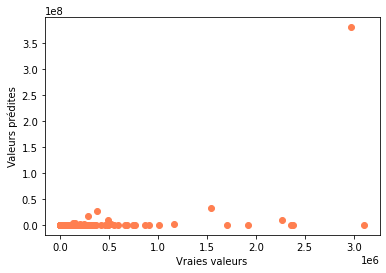

In [114]:
model1 = linear_model.LinearRegression(normalize=0)

param_grid1 = {}

cv=5

modelisation(model1, param_grid1, cv, 
                  X2_train, y2_train, X2_test, y2_test, 
                  'Linéaire classique (Test)', 'Linéaire classique (Entrainement)')

In [115]:
df_lin_cl = df_model
df_lin_cl

,Variable Stat,Linéaire classique (Test),Linéaire classique (Entrainement)
0,MedAE,2.332279e+04,2.130050e+04
1,MeanAE,1.105817e+06,3.407239e+05
2,MSE,3.113694e+14,3.364154e+13
3,RMSE,1.764566e+07,5.800133e+06
4,R2,-2.925532e+03,-1.010665e+02
5,Temps (en s),3.640790e-04,1.244928e-02


### Modèles Linéaire Ridge

Les paramètres optimaux sont {'alpha': 3.072112998861753}
Temps Entrainement 0.08s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 87730174804.29213
MedAE : 18695.68
MeanAE : 95714.62
RMSE : 296192.80
R2 : 0.18
******************************************************
Statistiques du Train Set
MSE : 304205177461.79285
MedAE : 18225.70
MeanAE : 114545.00
RMSE : 551547.98
R2 : 0.08
  Variable Stat  Ridge linéaire (Test)  Ridge linéaire (Entrainement)
0         MedAE           1.869568e+04                   1.822570e+04
1        MeanAE           9.571462e+04                   1.145450e+05
2           MSE           8.773017e+10                   3.042052e+11
3          RMSE           2.961928e+05                   5.515480e+05
4            R2           1.754323e-01                   7.705871e-02
5  Temps (en s)           1.427245e-03                   8.358522e-02
<class 'pandas.core.frame.DataFrame'>


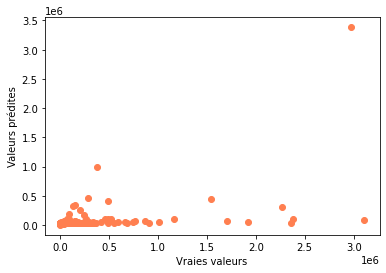

In [128]:
model2 =  linear_model.Ridge(normalize=True, random_state=0, max_iter=500) 
                    
param_grid2 = {'alpha': np.logspace(-5, 1, 200)}

cv=5

modelisation(model2, param_grid2, cv, 
                  X2_train, y2_train, X2_test, y2_test, 
                  'Ridge linéaire (Test)', 'Ridge linéaire (Entrainement)')

In [129]:
df_lin_rid = df_model
df_lin_rid

,Variable Stat,Ridge linéaire (Test),Ridge linéaire (Entrainement)
0,MedAE,1.869568e+04,1.822570e+04
1,MeanAE,9.571462e+04,1.145450e+05
2,MSE,8.773017e+10,3.042052e+11
3,RMSE,2.961928e+05,5.515480e+05
4,R2,1.754323e-01,7.705871e-02
5,Temps (en s),1.427245e-03,8.358522e-02


### Modèle linéaire lasso 

Les paramètres optimaux sont {'alpha': 0.011226677735108135}
Temps Entrainement 0.10s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 84804283893.57718
MedAE : 21567.53
MeanAE : 92780.04
RMSE : 291211.75
R2 : 0.20
******************************************************
Statistiques du Train Set
MSE : 267343974440.5177
MedAE : 20218.48
MeanAE : 109473.58
RMSE : 517053.16
R2 : 0.19
  Variable Stat  Lasso-Lars (Test)  Lasso-Lars (Entrainement)
0         MedAE       2.156753e+04               2.021848e+04
1        MeanAE       9.278004e+04               1.094736e+05
2           MSE       8.480428e+10               2.673440e+11
3          RMSE       2.912118e+05               5.170532e+05
4            R2       2.029325e-01               1.888935e-01
5  Temps (en s)       3.039870e-04               1.008155e-01
<class 'pandas.core.frame.DataFrame'>


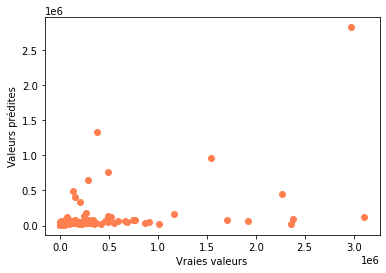

In [137]:
model3 = linear_model.LassoLars(normalize=True, max_iter=500) 

param_grid3 = {'alpha': np.logspace(-2, 0, 200)}

cv=5

modelisation(model3, param_grid3, cv, 
                  X2_train, y2_train, X2_test, y2_test, 
                  'Lasso-Lars (Test)', 'Lasso-Lars (Entrainement)')

In [138]:
df_lin_las = df_model
df_lin_las

,Variable Stat,Lasso-Lars (Test),Lasso-Lars (Entrainement)
0,MedAE,2.156753e+04,2.021848e+04
1,MeanAE,9.278004e+04,1.094736e+05
2,MSE,8.480428e+10,2.673440e+11
3,RMSE,2.912118e+05,5.170532e+05
4,R2,2.029325e-01,1.888935e-01
5,Temps (en s),3.039870e-04,1.008155e-01


### Modèle linéaire elasticnet

Les paramètres optimaux sont {'l1_ratio': 0.6471617098352916, 'alpha': 0.004768611697714469}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 88034858273.78732
MedAE : 19451.97
MeanAE : 96310.89
RMSE : 296706.69
R2 : 0.17
******************************************************
Statistiques du Train Set
MSE : 286045621926.51526
MedAE : 17939.56
MeanAE : 112712.95
RMSE : 534832.33
R2 : 0.13
  Variable Stat  ElasticNet (Test)  ElasticNet (Entrainement)
0         MedAE       1.945197e+04               1.793956e+04
1        MeanAE       9.631089e+04               1.127129e+05
2           MSE       8.803486e+10               2.860456e+11
3          RMSE       2.967067e+05               5.348323e+05
4            R2       1.725686e-01               1.321538e-01
5  Temps (en s)       1.157040e-04               9.179243e-02
<class 'pandas.core.frame.DataFrame'>


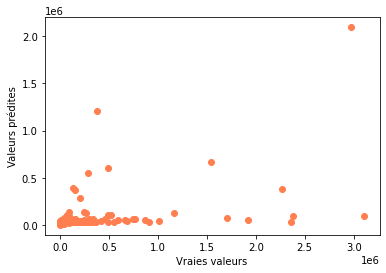

In [147]:
model4 = linear_model.ElasticNet(normalize=True, random_state=0, max_iter=500) 

param_grid4 = {'alpha': np.logspace(-3, 2, 200), 
               'l1_ratio':  np.random.random(100)}

cv=5

modelisation(model4, param_grid4, cv, 
                  X2_train, y2_train, X2_test, y2_test, 
                  'ElasticNet (Test)', 'ElasticNet (Entrainement)')

In [148]:
df_lin_elnet = df_model
df_lin_elnet

,Variable Stat,ElasticNet (Test),ElasticNet (Entrainement)
0,MedAE,1.945197e+04,1.793956e+04
1,MeanAE,9.631089e+04,1.127129e+05
2,MSE,8.803486e+10,2.860456e+11
3,RMSE,2.967067e+05,5.348323e+05
4,R2,1.725686e-01,1.321538e-01
5,Temps (en s),1.157040e-04,9.179243e-02


## Modèles non-linéaires

### Modèle non-linéaire Ridge avec Kernel rbf

Les paramètres optimaux sont {'gamma': 0.0017225859653987874, 'alpha': 1.3667163564620073}
Temps Entrainement 1.08s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 85723051540.66618
MedAE : 20432.09
MeanAE : 90284.88
RMSE : 292784.99
R2 : 0.19
******************************************************
Statistiques du Train Set
MSE : 261837135193.70212
MedAE : 18217.90
MeanAE : 102399.10
RMSE : 511700.24
R2 : 0.21
  Variable Stat  Ridge avec Kernel rbf (Test)  \
0         MedAE                  2.043209e+04   
1        MeanAE                  9.028488e+04   
2           MSE                  8.572305e+10   
3          RMSE                  2.927850e+05   
4            R2                  1.942971e-01   
5  Temps (en s)                  6.553100e-03   

   Ridge avec Kernel rbf (Entrainement)  
0                          1.821790e+04  
1                          1.023991e+05  
2                          2.618371e+11  
3                  

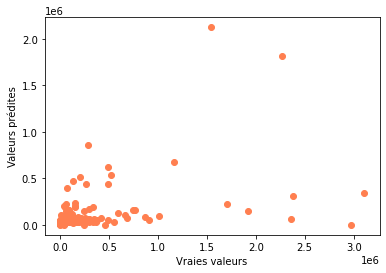

In [170]:
model5 = KernelRidge(kernel='rbf') # noyau Gaussien

param_grid5 = {'alpha': np.logspace(-2, 3, 200), 
               'gamma': np.logspace(-5, 0, 200)}

cv=5

modelisation(model5, param_grid5, cv, 
                  X2_train, y2_train, X2_test, y2_test, 
                  'Ridge avec Kernel rbf (Test)', 'Ridge avec Kernel rbf (Entrainement)')

In [171]:
df_kr_rbf = df_model
df_kr_rbf

,Variable Stat,Ridge avec Kernel rbf (Test),Ridge avec Kernel rbf (Entrainement)
0,MedAE,2.043209e+04,1.821790e+04
1,MeanAE,9.028488e+04,1.023991e+05
2,MSE,8.572305e+10,2.618371e+11
3,RMSE,2.927850e+05,5.117002e+05
4,R2,1.942971e-01,2.056009e-01
5,Temps (en s),6.553100e-03,1.080267e+00


### Modèle non-linéaire - Random Forest Regressor

Les paramètres optimaux sont {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 4}
Temps Entrainement 14.32s
Temps Test 0.11s
*******************************************************
Statistiques du Test Set
MSE : 63124042579.391556
MedAE : 21586.00
MeanAE : 85567.32
RMSE : 251244.99
R2 : 0.41
******************************************************
Statistiques du Train Set
MSE : 188914435596.11722
MedAE : 18910.54
MeanAE : 91024.53
RMSE : 434642.88
R2 : 0.43
  Variable Stat  Random Forest Regression (Test)  \
0         MedAE                     2.158600e+04   
1        MeanAE                     8.556732e+04   
2           MSE                     6.312404e+10   
3          RMSE                     2.512450e+05   
4            R2                     4.067030e-01   
5  Temps (en s)                     1.088882e-01   

   Random Forest Regression (Entrainement)  
0                             1.891054e+04  
1                             9.102453e+04  
2                             

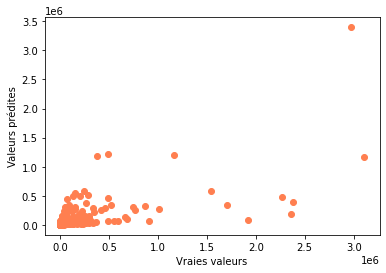

In [172]:
model6 = RandomForestRegressor(random_state=0, #à fixer pour avoir la même série de nb aléatoire 
                               n_jobs=-1, oob_score = True)

param_grid6 = {'n_estimators': [50, 200], # nb arbre # dpd du jeu de données # pas dans la GSCV #perte mémmoire et temps cal
               'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth': [2, 3, 4, 5], # pas 1 pour prof arbre
              }

cv=5

modelisation(model6, param_grid6, cv, 
                  X2_train, y2_train, X2_test, y2_test, 
                  'Random Forest Regression (Test)', 'Random Forest Regression (Entrainement)')

In [173]:
df_rf_reg = df_model
df_rf_reg

,Variable Stat,Random Forest Regression (Test),Random Forest Regression (Entrainement)
0,MedAE,2.158600e+04,1.891054e+04
1,MeanAE,8.556732e+04,9.102453e+04
2,MSE,6.312404e+10,1.889144e+11
3,RMSE,2.512450e+05,4.346429e+05
4,R2,4.067030e-01,4.268443e-01
5,Temps (en s),1.088882e-01,1.431914e+01


### Modèle non-linéaire - Support Vector Regression avec Kernel rbf

Les paramètres optimaux sont {'gamma': 0.12315506032928256, 'C': 3.370064329271928}
Temps Entrainement 2.00s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 72853449900.77399
MedAE : 18832.99
MeanAE : 80449.64
RMSE : 269913.78
R2 : 0.32
******************************************************
Statistiques du Train Set
MSE : 107784897405.29327
MedAE : 15407.61
MeanAE : 66929.13
RMSE : 328306.10
R2 : 0.67
  Variable Stat  Support Vector Regression (Test)  \
0         MedAE                      1.883299e+04   
1        MeanAE                      8.044964e+04   
2           MSE                      7.285345e+10   
3          RMSE                      2.699138e+05   
4            R2                      3.152573e-01   
5  Temps (en s)                      1.200924e-02   

   Support Vector Regression (Entrainement)  
0                              1.540761e+04  
1                              6.692913e+04  
2                            

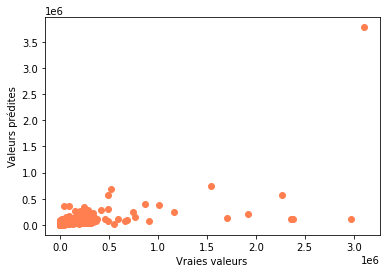

In [207]:
model7 = SVR(kernel='rbf', epsilon=.1)

param_grid7 = {'C': np.logspace(-1, 1, 200), 
               'gamma': np.logspace(-1, 5, 200)}

cv=5

modelisation(model7, param_grid7, cv, 
                  X2_train, y2_train, X2_test, y2_test,
                  'Support Vector Regression (Test)', 'Support Vector Regression (Entrainement)')

In [208]:
df_svr_rbf = df_model
df_svr_rbf

,Variable Stat,Support Vector Regression (Test),Support Vector Regression (Entrainement)
0,MedAE,1.883299e+04,1.540761e+04
1,MeanAE,8.044964e+04,6.692913e+04
2,MSE,7.285345e+10,1.077849e+11
3,RMSE,2.699138e+05,3.283061e+05
4,R2,3.152573e-01,6.729867e-01
5,Temps (en s),1.200924e-02,1.998744e+00


### Modèle non-linéaire - Support Vector Regression avec Kernel polynomial

### Modèle non-linéaire - KNN

Les paramètres optimaux sont {'n_neighbors': 11, 'metric': 'manhattan'}
Temps Entrainement 0.27s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 84968509688.93259
MedAE : 20896.94
MeanAE : 88558.72
RMSE : 291493.58
R2 : 0.20
******************************************************
Statistiques du Train Set
MSE : 276651705936.28564
MedAE : 18968.67
MeanAE : 99088.59
RMSE : 525976.91
R2 : 0.16
  Variable Stat  K Nearest Neighbors (Test)  \
0         MedAE                2.089694e+04   
1        MeanAE                8.855872e+04   
2           MSE                8.496851e+10   
3          RMSE                2.914936e+05   
4            R2                2.013889e-01   
5  Temps (en s)                9.748363e-03   

   K Nearest Neighbors (Entrainement)  
0                        1.896867e+04  
1                        9.908859e+04  
2                        2.766517e+11  
3                        5.259769e+05  
4                    

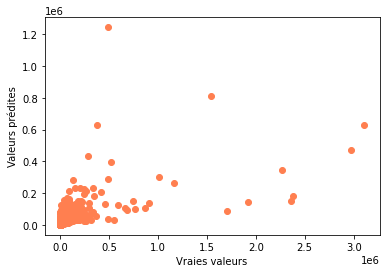

In [209]:
model8 = KNeighborsRegressor()

param_grid8 = {'n_neighbors': np.arange(1, 25),
               'metric': ['euclidean', 'manhattan', 'minkowski']} 

cv=5

modelisation(model8, param_grid8, cv, 
                  X2_train, y2_train, X2_test, y2_test, 
                  'K Nearest Neighbors (Test)', 'K Nearest Neighbors (Entrainement)')

In [210]:
df_knn = df_model
df_knn

,Variable Stat,K Nearest Neighbors (Test),K Nearest Neighbors (Entrainement)
0,MedAE,2.089694e+04,1.896867e+04
1,MeanAE,8.855872e+04,9.908859e+04
2,MSE,8.496851e+10,2.766517e+11
3,RMSE,2.914936e+05,5.259769e+05
4,R2,2.013889e-01,1.606544e-01
5,Temps (en s),9.748363e-03,2.737236e-01


# Comparaison des modèles entre eux

<Figure size 432x288 with 0 Axes>

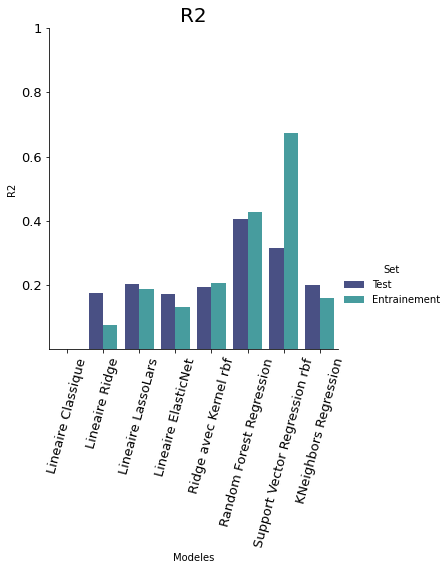

<Figure size 432x288 with 0 Axes>

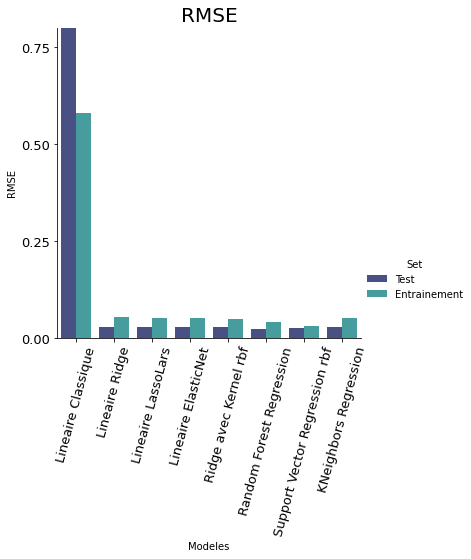

<Figure size 432x288 with 0 Axes>

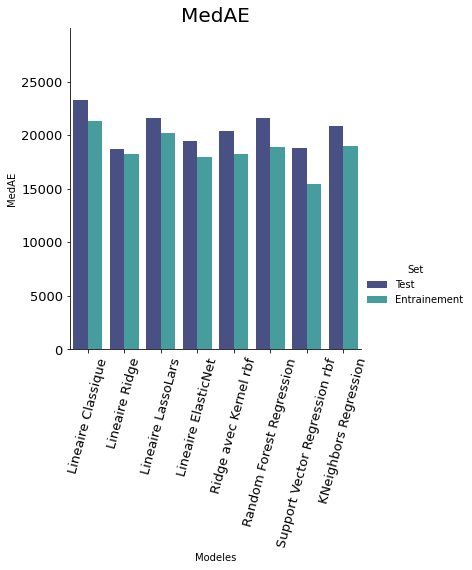

<Figure size 432x288 with 0 Axes>

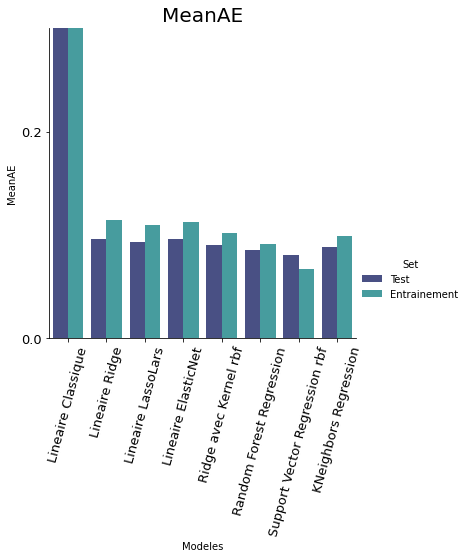

In [211]:
comparaison(df_lin_cl, df_lin_rid, df_lin_las, df_lin_elnet, df_kr_rbf, df_rf_reg, df_svr_rbf, df_knn, [0, 8*10**6], [0, 3*10**4], [0, 3*10**5])

In [212]:
df_mod_CO2 = df_mod_T
df_mod_CO2

,MedAE,MeanAE,MSE,RMSE,R2,Temps (en s),Modeles,Set
Linéaire classique (Test),23322.789968,1.105817e+06,3.113694e+14,1.764566e+07,-2925.531873,0.000364,Lineaire Classique,Test
Linéaire classique (Entrainement),21300.500552,3.407239e+05,3.364154e+13,5.800133e+06,-101.066542,0.012449,Lineaire Classique,Entrainement
Ridge linéaire (Test),18695.680215,9.571462e+04,8.773017e+10,2.961928e+05,0.175432,0.001427,Lineaire Ridge,Test
Ridge linéaire (Entrainement),18225.695515,1.145450e+05,3.042052e+11,5.515480e+05,0.077059,0.083585,Lineaire Ridge,Entrainement
Lasso-Lars (Test),21567.526576,9.278004e+04,8.480428e+10,2.912118e+05,0.202932,0.000304,Lineaire LassoLars,Test
Lasso-Lars (Entrainement),20218.482659,1.094736e+05,2.673440e+11,5.170532e+05,0.188894,0.100815,Lineaire LassoLars,Entrainement
ElasticNet (Test),19451.970377,9.631089e+04,8.803486e+10,2.967067e+05,0.172569,0.000116,Lineaire ElasticNet,Test
ElasticNet (Entrainement),17939.556586,1.127129e+05,2.860456e+11,5.348323e+05,0.132154,0.091792,Lineaire ElasticNet,Entrainement
Ridge avec Kernel rbf (Test),20432.090373,9.028488e+04,8.572305e+10,2.927850e+05,0.194297,0.006553,Ridge avec Kernel rbf,Test
Ridge avec Kernel rbf (Entrainement),18217.902089,1.023991e+05,2.618371e+11,5.117002e+05,0.205601,1.080267,Ridge avec Kernel rbf,Entrainement


# ENERGYSTARScore

In [213]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt 
#import seaborn as sns 

# Lire fichier 
dfbis = pd.read_csv('df_build_STARSCORE.csv')

In [214]:
df_build_STARSCORE = dfbis.copy()

In [215]:
df_build_STARSCORE.sample(5)

,Unnamed: 0,OSEBuildingID,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age
240,342,491,86.0,25.06,0.11,51.4,56.9,66762,69940.0,NonResidential,Office,5.0,1.0,47.622376,-122.358404,1,0,0,0,45
156,227,357,82.0,452.16,0.15,53.6,54.6,1035787,1187924.0,Nonresidential COS,Office,63.0,1.0,47.604911,-122.328916,1,0,1,0,25
611,877,21321,55.0,9.87,0.15,60.9,60.9,25920,23230.0,NonResidential,Bank Branch,2.0,1.0,47.609763,-122.334844,1,0,0,0,74
108,165,274,91.0,8.66,0.09,7.7,8.2,67236,67236.0,NonResidential,Non-Refrigerated Warehouse,3.0,1.0,47.650944,-122.342238,1,0,1,0,24
546,789,20659,90.0,28.60,1.24,29.8,38.6,22612,22612.0,NonResidential,Worship Facility,2.0,1.0,47.639133,-122.403360,1,0,1,0,68


In [216]:
# Supprimer colonnes 'Unnamed: 0' 
df_build_STARSCORE.drop(['Unnamed: 0'], axis=1, inplace=True)

## Encoder les variables qualitatives/catégorielles

In [217]:
# Créer une liste avec les variables catégorielles
col_qual = ['BuildingType', 'LargestPropertyUseType', 
            'Electricity', 'NaturalGas', 
            'Steam', 'OtherFuel']

In [218]:
for col in col_qual:
    print(df_build_STARSCORE[col].unique())

['NonResidential' 'SPS-District K-12' 'Nonresidential COS' 'Campus']
['Hotel' 'Courthouse' 'K-12 School' 'Self-Storage Facility' 'Office'
 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital (General Medical & Surgical)' 'Residence Hall/Dormitory'
 'Financial Office' 'Non-Refrigerated Warehouse' 'Worship Facility'
 'Supermarket/Grocery Store' 'Parking' 'Distribution Center'
 'Wholesale Club/Supercenter' 'Refrigerated Warehouse' 'Data Center'
 'Other - Public Services' 'Bank Branch' 'Laboratory'
 'Manufacturing/Industrial Plant' 'Multifamily Housing'
 'Other - Restaurant/Bar' 'Other']
[1]
[1 0]
[1 0]
[0 1]


In [219]:
from sklearn.preprocessing import OneHotEncoder

# Encoder les variables de la liste
for col in col_qual:
    # Définir l'encodeur
    encoder = OneHotEncoder(sparse=False)
    # Afficher
    print(encoder.fit_transform(df_build_STARSCORE[col].values.reshape(-1,1)))
    # Encoder
    df_build_STARSCORE[col] = encoder.fit_transform(df_build_STARSCORE[col].values.reshape(-1,1))

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [220]:
for col in col_qual:
    print(df_build_STARSCORE[col].unique())

[0. 1.]
[0. 1.]
[1.]
[0. 1.]
[0. 1.]
[1. 0.]


In [221]:
df_build.sample(5)

,OSEBuildingID,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,...,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age,TotalEnergyConsumption,TotalEmissionsCO2
659,19927,62.0,68.64,1.40,49.4,50.7,44416,52668.0,0.0,0.0,...,1.0,47.618263,-122.341335,0.0,1.0,0.0,1.0,48,2251891.2,62182.40
74,119,43.0,63.95,0.86,34.0,35.2,67743,67743.0,0.0,0.0,...,1.0,47.626235,-122.308199,0.0,1.0,0.0,1.0,92,2384553.6,58258.98
658,19926,NaN,27.68,1.06,43.1,41.2,23752,14317.0,0.0,0.0,...,1.0,47.618079,-122.341647,0.0,1.0,0.0,1.0,50,978582.4,25177.12
253,404,34.0,39.60,0.19,86.8,84.7,79957,35694.0,0.0,0.0,...,1.0,47.611444,-122.336226,0.0,1.0,1.0,1.0,101,6772357.9,15191.83
1176,24538,73.0,55.20,1.03,46.9,52.7,48020,47800.0,0.0,0.0,...,1.0,47.525932,-122.330840,0.0,1.0,0.0,1.0,36,2530654.0,49460.60


## Définir les sous échantillons

### Définir target et features pour la prédiction de la consommation totale d’énergie

In [222]:
df_build_STARSCORE['TotalEnergyConsumption'] = df_build_STARSCORE['SiteEUIWN(kBtu/sf)'] * df_build_STARSCORE['PropertyGFABuilding(s)']

In [223]:
sous_echantillon3 = df_build_STARSCORE.drop(['OSEBuildingID', 
                                             'GHGEmissions(MetricTonsCO2e)', 
                                             'GHGEmissionsIntensity(kgCO2e/ft2)', 
                                             'SiteEUI(kBtu/sf)', 
                                             'SiteEUIWN(kBtu/sf)'], axis=1)

X3 = df_build_STARSCORE.drop(['OSEBuildingID', 
                              'GHGEmissions(MetricTonsCO2e)', 
                              'GHGEmissionsIntensity(kgCO2e/ft2)', 
                              'SiteEUI(kBtu/sf)', 
                              'SiteEUIWN(kBtu/sf)', 
                              'TotalEnergyConsumption'], axis=1)

# Consommation d'Energie multipliée par la surface
y3 = df_build_STARSCORE['TotalEnergyConsumption']

sous_echantillon3.sample(5)

,ENERGYSTARScore,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age,TotalEnergyConsumption
129,36.0,212210,175915.0,0.0,0.0,12.0,1.0,47.615919,-122.345715,1.0,1.0,0.0,1.0,37,19311110.0
57,94.0,59955,59955.0,0.0,0.0,3.0,1.0,47.554465,-122.276400,1.0,1.0,0.0,1.0,26,1714713.0
183,94.0,1115000,1021940.0,0.0,0.0,55.0,1.0,47.607223,-122.336153,1.0,0.0,0.0,1.0,27,52962500.0
554,61.0,82234,77796.0,0.0,0.0,5.0,1.0,47.646359,-122.325735,1.0,1.0,1.0,1.0,30,5156071.8
120,63.0,64414,64714.0,0.0,0.0,2.0,1.0,47.591014,-122.298128,1.0,1.0,1.0,1.0,24,2789126.2


In [224]:
# Tester la normalité

data = sous_echantillon3
pg.normality(data, method = 'normaltest')

,W,pval,normal
ENERGYSTARScore,105.702729,1.114151e-23,False
PropertyGFABuilding(s),1019.227709,4.758992e-222,False
LargestPropertyUseTypeGFA,1043.920140,2.068340e-227,False
BuildingType,2133.575274,0.000000e+00,False
LargestPropertyUseType,2133.575274,0.000000e+00,False
NumberofFloors,1124.524600,6.495097e-245,False
NumberofBuildings,2891.745063,0.000000e+00,False
Latitude,11.694060,2.888466e-03,False
Longitude,13.248901,1.327509e-03,False
Electricity,2824.577851,0.000000e+00,False


### Définir target et features pour la prédiction d'émissions de CO2

In [225]:
df_build_STARSCORE['TotalEmissionsCO2'] = df_build_STARSCORE['GHGEmissionsIntensity(kgCO2e/ft2)'] * df_build_STARSCORE['PropertyGFABuilding(s)']

In [226]:
sous_echantillon4 = df_build_STARSCORE.drop(['OSEBuildingID', 
                                             'GHGEmissions(MetricTonsCO2e)', 
                                             'GHGEmissionsIntensity(kgCO2e/ft2)', 
                                             'SiteEUI(kBtu/sf)', 
                                             'SiteEUIWN(kBtu/sf)', 
                                             'TotalEnergyConsumption'], axis=1)

X4 = df_build_STARSCORE.drop(['OSEBuildingID',
                              'GHGEmissions(MetricTonsCO2e)', 
                              'GHGEmissionsIntensity(kgCO2e/ft2)', 
                              'SiteEUI(kBtu/sf)', 
                              'SiteEUIWN(kBtu/sf)', 
                              'TotalEmissionsCO2', 
                              'TotalEnergyConsumption'], axis=1)

# Emissions de C02 multipliée par la surface
y4 = df_build_STARSCORE['TotalEmissionsCO2']

sous_echantillon4.sample(5)

,ENERGYSTARScore,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age,TotalEmissionsCO2
435,84.0,215946,153044.0,0.0,0.0,4.0,1.0,47.619063,-122.358646,1.0,1.0,0.0,1.0,87,345513.60
167,66.0,272410,283267.0,0.0,0.0,6.0,1.0,47.618360,-122.352637,1.0,1.0,1.0,1.0,33,38137.40
924,78.0,22452,22452.0,0.0,0.0,3.0,1.0,47.547734,-122.320787,1.0,1.0,0.0,1.0,23,42209.76
916,52.0,22324,21000.0,0.0,0.0,2.0,1.0,47.566969,-122.333606,1.0,1.0,0.0,1.0,74,18305.68
124,7.0,151000,146741.0,0.0,0.0,5.0,1.0,47.619948,-122.360664,1.0,1.0,0.0,1.0,88,244620.00


In [227]:
# Tester la normalité

data = sous_echantillon4
pg.normality(data, method = 'normaltest')

,W,pval,normal
ENERGYSTARScore,105.702729,1.114151e-23,False
PropertyGFABuilding(s),1019.227709,4.758992e-222,False
LargestPropertyUseTypeGFA,1043.920140,2.068340e-227,False
BuildingType,2133.575274,0.000000e+00,False
LargestPropertyUseType,2133.575274,0.000000e+00,False
NumberofFloors,1124.524600,6.495097e-245,False
NumberofBuildings,2891.745063,0.000000e+00,False
Latitude,11.694060,2.888466e-03,False
Longitude,13.248901,1.327509e-03,False
Electricity,2824.577851,0.000000e+00,False


### Transformation au log des targets

In [228]:
y3.shape

(1048,)

In [229]:
y4.shape

(1048,)

In [230]:
y3 = trans_log(y3)
y3.shape

(1048,)

In [231]:
y4 = trans_log(y4)
y4.shape

(1048,)

## DF comparaisons 

### Echantillon de même taille sans ENERGYSTARScore

In [232]:
sous_echantillon5 = sous_echantillon3.drop(['ENERGYSTARScore'], axis=1)

sous_echantillon5.sample(5)

,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age,TotalEnergyConsumption
915,33120,41704.0,0.0,0.0,4.0,1.0,47.728997,-122.344440,1.0,1.0,0.0,1.0,25,1543392.0
772,23923,23923.0,0.0,0.0,2.0,1.0,47.690773,-122.318762,1.0,1.0,0.0,1.0,84,1083711.9
722,591981,520187.0,0.0,0.0,3.0,1.0,47.619977,-122.312124,1.0,1.0,0.0,1.0,51,102649505.4
146,293925,236827.0,0.0,0.0,17.0,1.0,47.603904,-122.334249,1.0,0.0,1.0,1.0,57,30715162.5
396,132998,84731.0,0.0,0.0,10.0,1.0,47.610457,-122.340438,1.0,0.0,1.0,1.0,107,5506117.2


In [233]:
X5 = sous_echantillon5.drop(['TotalEnergyConsumption'], axis=1)

y5 = sous_echantillon5['TotalEnergyConsumption']

In [234]:
# Tester la normalité

data = sous_echantillon5
pg.normality(data, method = 'normaltest')

,W,pval,normal
PropertyGFABuilding(s),1019.227709,4.758992e-222,False
LargestPropertyUseTypeGFA,1043.920140,2.068340e-227,False
BuildingType,2133.575274,0.000000e+00,False
LargestPropertyUseType,2133.575274,0.000000e+00,False
NumberofFloors,1124.524600,6.495097e-245,False
NumberofBuildings,2891.745063,0.000000e+00,False
Latitude,11.694060,2.888466e-03,False
Longitude,13.248901,1.327509e-03,False
Electricity,2824.577851,0.000000e+00,False
Steam,756.059575,6.664219e-165,False


### Echantillon  de même taille sans ENERGYSTARScore

In [235]:
sous_echantillon6 = sous_echantillon4.drop(['ENERGYSTARScore'], axis=1)

sous_echantillon6.sample(5)

,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingType,LargestPropertyUseType,NumberofFloors,NumberofBuildings,Latitude,Longitude,Electricity,Steam,NaturalGas,OtherFuel,Age,TotalEmissionsCO2
744,32297,50333.0,0.0,0.0,4.0,1.0,47.641607,-122.325523,1.0,1.0,1.0,1.0,56,2583.76
760,28304,20106.0,0.0,0.0,3.0,1.0,47.572906,-122.386413,1.0,1.0,1.0,1.0,31,3679.52
721,21603,21603.0,0.0,0.0,1.0,1.0,47.578982,-122.312911,1.0,1.0,0.0,1.0,50,101966.16
208,162000,162000.0,0.0,0.0,3.0,1.0,47.610443,-122.328416,1.0,0.0,0.0,1.0,70,108540.00
709,33062,24052.0,0.0,0.0,3.0,1.0,47.685903,-122.337298,1.0,1.0,1.0,1.0,19,4628.68


In [236]:
X6 = sous_echantillon6.drop(['TotalEmissionsCO2'], axis=1)

y6 = sous_echantillon6['TotalEmissionsCO2']

In [237]:
# Tester la normalité

data = sous_echantillon6
pg.normality(data, method = 'normaltest')

,W,pval,normal
PropertyGFABuilding(s),1019.227709,4.758992e-222,False
LargestPropertyUseTypeGFA,1043.920140,2.068340e-227,False
BuildingType,2133.575274,0.000000e+00,False
LargestPropertyUseType,2133.575274,0.000000e+00,False
NumberofFloors,1124.524600,6.495097e-245,False
NumberofBuildings,2891.745063,0.000000e+00,False
Latitude,11.694060,2.888466e-03,False
Longitude,13.248901,1.327509e-03,False
Electricity,2824.577851,0.000000e+00,False
Steam,756.059575,6.664219e-165,False


### Transformation au log des targets

In [238]:
y5.shape

(1048,)

In [239]:
y6.shape

(1048,)

In [240]:
y5 = trans_log(y5)
y5.shape

(1048,)

In [241]:
y6 = trans_log(y6)
y6.shape

(1048,)

## Créer les jeux d'entrainement et de test

### Consommation totale d’énergie

In [242]:
# Séparer les données

from sklearn import model_selection 

X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X3.values, y3.values, test_size=0.3 ) # 30% des données dans le jeu de test

X5_train, X5_test, y5_train, y5_test = model_selection.train_test_split(X5.values, y5.values, test_size=0.3 ) # 30% des données dans le jeu de test


### Prédiction des émissions de CO2

In [243]:
# Séparer les données

#from sklearn import model_selection 

X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X4.values, y4.values, test_size=0.3 ) # 30% des données dans le jeu de test

X6_train, X6_test, y6_train, y6_test = model_selection.train_test_split(X6.values, y6.values, test_size=0.3 ) # 30% des données dans le jeu de test

## Sélection des features

### Consommation totale d’énergie

On utilise les features sélectionnées sur le plus grand data set en ajoutant ou non l'ENERGYSTARScore.

In [244]:
X3 = X3[['BuildingType', 'LargestPropertyUseType', 
         'NumberofBuildings', 'Latitude', 
         'Longitude', 'ENERGYSTARScore']]
X3.sample(5)

,BuildingType,LargestPropertyUseType,NumberofBuildings,Latitude,Longitude,ENERGYSTARScore
183,0.0,0.0,1.0,47.607223,-122.336153,94.0
814,0.0,0.0,1.0,47.613220,-122.317230,61.0
765,0.0,0.0,1.0,47.596893,-122.311264,73.0
833,0.0,0.0,1.0,47.690642,-122.290191,63.0
106,0.0,0.0,1.0,47.607107,-122.310783,45.0


In [245]:
X5 = X5[['BuildingType', 'LargestPropertyUseType', 
         'NumberofBuildings', 'Latitude', 
         'Longitude']]
X5.sample(5)

,BuildingType,LargestPropertyUseType,NumberofBuildings,Latitude,Longitude
123,0.0,0.0,1.0,47.551569,-122.313804
731,0.0,0.0,1.0,47.606522,-122.325287
62,0.0,0.0,1.0,47.725277,-122.341097
177,0.0,0.0,1.0,47.527262,-122.293929
400,0.0,0.0,1.0,47.608316,-122.335449


### Emissions de CO2

In [246]:
X4 = X4[['BuildingType', 'LargestPropertyUseType', 
         'NumberofBuildings', 'Steam',
         'OtherFuel', 'ENERGYSTARScore']]
X4.sample(5)

,BuildingType,LargestPropertyUseType,NumberofBuildings,Steam,OtherFuel,ENERGYSTARScore
202,0.0,0.0,1.0,1.0,1.0,74.0
366,0.0,0.0,1.0,1.0,1.0,78.0
384,0.0,0.0,1.0,1.0,1.0,48.0
730,0.0,0.0,1.0,0.0,1.0,31.0
272,0.0,0.0,1.0,1.0,1.0,88.0


In [247]:
X6 = X6[['BuildingType', 'LargestPropertyUseType', 
         'NumberofBuildings', 'Steam',
         'OtherFuel']]
X6.sample(5)

,BuildingType,LargestPropertyUseType,NumberofBuildings,Steam,OtherFuel
603,0.0,0.0,1.0,1.0,1.0
130,0.0,0.0,1.0,1.0,1.0
945,0.0,0.0,1.0,1.0,1.0
441,0.0,0.0,1.0,1.0,1.0
423,0.0,0.0,1.0,1.0,1.0


## Standardiser les données

In [248]:
standardiser(X3_train, X3_test)
X3_train, X3_test = X_train_std, X_test_std

[[-1.88761906 -0.43347621 -0.47591464 ...  1.55219275  0.05230658
  -1.09737636]
 [-0.27614601 -0.45245385 -0.44641865 ... -0.64424989  0.05230658
  -0.88042953]
 [-1.08188254  0.10551228  0.15380679 ... -0.64424989  0.05230658
   0.08033502]
 ...
 [-0.34621006 -0.47110928 -0.48202642 ...  1.55219275  0.05230658
   0.70018311]
 [-1.22201063 -0.50289977 -0.50068526 ... -0.64424989  0.05230658
   1.16506919]
 [ 1.19519895 -0.41225928 -0.44678259 ... -0.64424989  0.05230658
   1.81590969]] [[-0.48633815 -0.51458493 -0.56965365 ...  1.55219275  0.05230658
  -0.0126422 ]
 [-1.74749097 -0.50083769 -0.4716803  ... -0.64424989  0.05230658
  -0.78745231]
 [ 0.14423826 -0.35193789 -0.33828981 ...  1.55219275  0.05230658
  -0.26058143]
 ...
 [ 0.24933433  0.31970611  0.38422326 ... -0.64424989  0.05230658
   0.35926666]
 [-0.80162636 -0.47006213 -0.46536056 ... -0.64424989  0.05230658
  -1.06638396]
 [ 0.6697186  -0.21689273 -0.2472543  ...  1.55219275  0.05230658
   1.75392488]]


In [249]:
standardiser(X5_train, X5_test)
X5_train, X5_test = X_train_std, X_test_std

[[-0.38368885 -0.28859251 -0.05230658 ... -0.64424989  0.06410608
  -1.25867096]
 [-0.3436266  -0.46377906 -0.05230658 ... -0.64424989  0.06410608
   1.69115715]
 [ 0.20784104  0.16578258 -0.05230658 ...  1.55219275  0.06410608
   1.06353415]
 ...
 [-0.08675226 -0.05463173 -0.05230658 ... -0.64424989  0.06410608
  -0.47414221]
 [ 1.35449117  0.58294544 -0.05230658 ... -0.64424989  0.06410608
  -1.60386361]
 [-0.44047224 -0.42419463 -0.05230658 ... -0.64424989  0.06410608
  -1.16452751]] [[-0.2589685  -0.2303489  -0.05230658 ... -0.64424989  0.06410608
  -1.16452751]
 [-0.49953774 -0.47580859 -0.05230658 ... -0.64424989  0.06410608
  -0.06618726]
 [-0.1746102  -0.1442757  -0.05230658 ... -0.64424989  0.06410608
  -0.75657256]
 ...
 [-0.37602269 -0.34978264 -0.05230658 ...  1.55219275  0.06410608
   1.7853006 ]
 [-0.47428776 -0.45004531 -0.05230658 ... -0.64424989  0.06410608
  -0.59966681]
 [-0.34151581 -0.46698153 -0.05230658 ... -0.64424989  0.06410608
  -0.85071601]]


In [250]:
standardiser(X4_train, X4_test)
X4_train, X4_test = X_train_std, X_test_std

[[ 0.11597754  0.08007729  1.41192664 ... -0.65486632  0.06410608
  -0.14451378]
 [-0.53186651 -0.36195347 -0.34808774 ... -0.65486632  0.06410608
   0.01153896]
 [ 1.19571762 -0.37981071 -0.51394249 ... -0.65486632  0.06410608
  -0.64388254]
 ...
 [-0.4238925  -0.4897056  -0.4838546  ...  1.5270292   0.06410608
   0.29243389]
 [ 0.40390823  0.1568454   0.19567588 ... -0.65486632  0.06410608
  -1.0808302 ]
 [ 1.23170896 -0.46781397 -0.46058956 ...  1.5270292   0.06410608
   0.63574991]] [[-1.21570189 -0.36842269 -0.35493381 ... -0.65486632  0.06410608
   1.88417181]
 [ 0.58386491 -0.38653651 -0.37421304 ... -0.65486632  0.06410608
  -0.01967159]
 [ 0.9797696  -0.3052809  -0.34815156 ...  1.5270292   0.06410608
   1.19753977]
 ...
 [ 0.25994288  0.33636222  0.39403786 ... -0.65486632  0.06410608
   0.38606553]
 [ 0.83580426 -0.05170922  0.17551478 ... -0.65486632  0.06410608
  -1.1432513 ]
 [ 0.87179559  0.20913964  0.08311024 ... -0.65486632  0.06410608
   0.41727608]]


In [251]:
standardiser(X6_train, X6_test)
X6_train, X6_test = X_train_std, X_test_std

[[ 1.58762566  1.68670663 -0.06410608 ... -0.66551738  0.06410608
  -0.79375958]
 [ 0.96855379  1.14231551 -0.06410608 ...  1.50259036  0.06410608
  -1.17327304]
 [-0.24332233 -0.21819733 -0.06410608 ... -0.66551738  0.06410608
   0.40803307]
 ...
 [-0.07326284 -0.03471986 -0.06410608 ... -0.66551738  0.06410608
  -1.14164692]
 [-0.49506361 -0.52322766 -0.06410608 ...  1.50259036  0.06410608
   0.18665021]
 [-0.36537888 -0.34988435 -0.06410608 ... -0.66551738  0.06410608
   1.7363302 ]] [[-0.29245102 -0.26553431 -0.06410608 ... -0.66551738  0.06410608
  -0.88863794]
 [-0.24176855 -0.19641713 -0.06410608 ...  1.50259036  0.06410608
  -0.22448938]
 [ 2.34628539  1.44775703 -0.06410608 ... -0.66551738  0.06410608
  -1.45790814]
 ...
 [-0.42368365 -0.45559075 -0.06410608 ... -0.66551738  0.06410608
   1.07218163]
 [-0.00907131 -0.06688092 -0.06410608 ...  1.50259036  0.06410608
  -1.17327304]
 [-0.50349505 -0.49889811 -0.06410608 ...  1.50259036  0.06410608
   1.07218163]]


# Modèles de Prédictions de la consommation totale d'énergie

# Avec ENERGYSTARScore

## Modèles Naïfs

### Modèle naïf aléatoire

1 - Avec ENERGYSTARScore

In [252]:
mod_naif_aleatoire(y3, y3_test)

Temps Test 0.00s
*******************************************************
MSE : 430172373503369.75
MedAE : 2941720.37
MeanAE : 8336945.28
RMSE : 20740597.23
R2 : -0.53
  Variable Stat  Naïf Aléatoire (Test)
0         MedAE           2.941720e+06
1        MeanAE           8.336945e+06
2           MSE           4.301724e+14
3          RMSE           2.074060e+07
4            R2          -5.264005e-01
5  Temps (en s)           3.189230e-04
<class 'pandas.core.frame.DataFrame'>


In [253]:
df_naif_al_ST = df_naif_al
df_naif_al_ST

,Variable Stat,Naïf Aléatoire (Test)
0,MedAE,2.941720e+06
1,MeanAE,8.336945e+06
2,MSE,4.301724e+14
3,RMSE,2.074060e+07
4,R2,-5.264005e-01
5,Temps (en s),3.189230e-04


2 - Sans ENERGYSTARScore

In [254]:
mod_naif_aleatoire(y5, y5_test)

Temps Test 0.00s
*******************************************************
MSE : 838863393563945.50
MedAE : 3107504.91
MeanAE : 11639412.04
RMSE : 28963138.53
R2 : -0.23
  Variable Stat  Naïf Aléatoire (Test)
0         MedAE           3.107505e+06
1        MeanAE           1.163941e+07
2           MSE           8.388634e+14
3          RMSE           2.896314e+07
4            R2          -2.285756e-01
5  Temps (en s)           3.286320e-04
<class 'pandas.core.frame.DataFrame'>


In [255]:
df_naif_al_sans = df_naif_al
df_naif_al_sans

,Variable Stat,Naïf Aléatoire (Test)
0,MedAE,3.107505e+06
1,MeanAE,1.163941e+07
2,MSE,8.388634e+14
3,RMSE,2.896314e+07
4,R2,-2.285756e-01
5,Temps (en s),3.286320e-04


### Modèle naïf des moyennes

1 - Avec ENERGYSTARScore

In [256]:
mod_naif_moyennes(X3_train, y3_train, X3_test, y3_test)

Temps Entrainement 0.00s
Temps Test 0.00s
*******************************************************
MSE : 295294290271684.81
MedAE : 1772620.76
MeanAE : 5084355.11
RMSE : 17184129.02
R2 : -0.05
*******************************************************
Statistiques du Train Set
MSE : 514957354267922.75
MedAE : 2000593.76
MeanAE : 6990175.20
RMSE : 22692671.82
R2 : -0.06
  Variable Stat  Naïf Moyennes (Test)  Naïf Moyennes (Entrainement)
0         MedAE          1.772621e+06                  2.000594e+06
1        MeanAE          5.084355e+06                  6.990175e+06
2           MSE          2.952943e+14                  5.149574e+14
3          RMSE          1.718413e+07                  2.269267e+07
4            R2         -4.780635e-02                 -6.445728e-02
5  Temps (en s)          4.437800e-05                  2.250010e-04
<class 'pandas.core.frame.DataFrame'>


In [257]:
df_naif_moy_ST = df_naif_moy
df_naif_moy_ST

,Variable Stat,Naïf Moyennes (Test),Naïf Moyennes (Entrainement)
0,MedAE,1.772621e+06,2.000594e+06
1,MeanAE,5.084355e+06,6.990175e+06
2,MSE,2.952943e+14,5.149574e+14
3,RMSE,1.718413e+07,2.269267e+07
4,R2,-4.780635e-02,-6.445728e-02
5,Temps (en s),4.437800e-05,2.250010e-04


2 - Sans ENERGYSTARScore

In [258]:
mod_naif_moyennes(X5_train, y5_train, X5_test, y5_test)

Temps Entrainement 0.00s
Temps Test 0.00s
*******************************************************
MSE : 722292846336982.62
MedAE : 1907939.65
MeanAE : 7679855.41
RMSE : 26875506.44
R2 : -0.06
*******************************************************
Statistiques du Train Set
MSE : 331785802235783.2
MedAE : 1916620.05
MeanAE : 5874389.81
RMSE : 18214988.40
R2 : -0.06
  Variable Stat  Naïf Moyennes (Test)  Naïf Moyennes (Entrainement)
0         MedAE          1.907940e+06                  1.916620e+06
1        MeanAE          7.679855e+06                  5.874390e+06
2           MSE          7.222928e+14                  3.317858e+14
3          RMSE          2.687551e+07                  1.821499e+07
4            R2         -5.784971e-02                 -6.479334e-02
5  Temps (en s)          1.934270e-04                  2.931550e-04
<class 'pandas.core.frame.DataFrame'>


In [259]:
df_naif_moy_sans = df_naif_moy
df_naif_moy_sans

,Variable Stat,Naïf Moyennes (Test),Naïf Moyennes (Entrainement)
0,MedAE,1.907940e+06,1.916620e+06
1,MeanAE,7.679855e+06,5.874390e+06
2,MSE,7.222928e+14,3.317858e+14
3,RMSE,2.687551e+07,1.821499e+07
4,R2,-5.784971e-02,-6.479334e-02
5,Temps (en s),1.934270e-04,2.931550e-04


## Modèles Linéaires

### Modèle linéaire Classique

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {}
Temps Entrainement 0.01s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 669894933209350.9
MedAE : 1439133.23
MeanAE : 5766929.32
RMSE : 25882328.59
R2 : -1.38
******************************************************
Statistiques du Train Set
MSE : 4875108510587925.0
MedAE : 1595315.48
MeanAE : 9205579.38
RMSE : 69821977.27
R2 : -9.08
  Variable Stat  Linéaire classique (Test)  Linéaire classique (Entrainement)
0         MedAE               1.439133e+06                       1.595315e+06
1        MeanAE               5.766929e+06                       9.205579e+06
2           MSE               6.698949e+14                       4.875109e+15
3          RMSE               2.588233e+07                       6.982198e+07
4            R2              -1.377019e+00                      -9.077232e+00
5  Temps (en s)               3.667680e-04                       1.342177e-02
<class 'pandas.core.frame.DataF

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


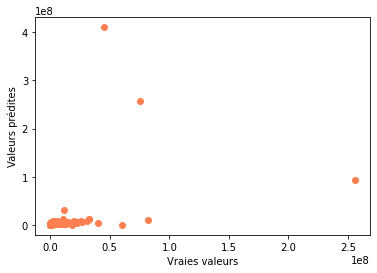

In [260]:
model1 = linear_model.LinearRegression(normalize=0)

param_grid1 = {}

cv=5

modelisation(model1, param_grid1, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'Linéaire classique (Test)', 'Linéaire classique (Entrainement)')

In [261]:
df_lin_cl_ST = df_model
df_lin_cl_ST

,Variable Stat,Linéaire classique (Test),Linéaire classique (Entrainement)
0,MedAE,1.439133e+06,1.595315e+06
1,MeanAE,5.766929e+06,9.205579e+06
2,MSE,6.698949e+14,4.875109e+15
3,RMSE,2.588233e+07,6.982198e+07
4,R2,-1.377019e+00,-9.077232e+00
5,Temps (en s),3.667680e-04,1.342177e-02


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {}
Temps Entrainement 0.01s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 322345297587806.1
MedAE : 1490609.39
MeanAE : 5751175.16
RMSE : 17953977.21
R2 : 0.53
******************************************************
Statistiques du Train Set
MSE : 665227896191362.0
MedAE : 1487884.62
MeanAE : 5758885.09
RMSE : 25792012.26
R2 : -1.13
  Variable Stat  Linéaire classique (Test)  Linéaire classique (Entrainement)
0         MedAE               1.490609e+06                       1.487885e+06
1        MeanAE               5.751175e+06                       5.758885e+06
2           MSE               3.223453e+14                       6.652279e+14
3          RMSE               1.795398e+07                       2.579201e+07
4            R2               5.279022e-01                      -1.134902e+00
5  Temps (en s)               2.186800e-04                       1.197300e-02
<class 'pandas.core.frame.DataFra

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


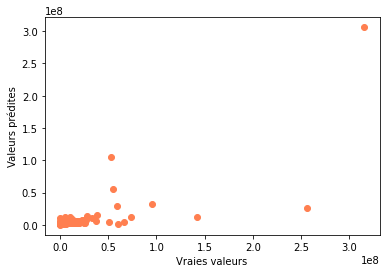

In [795]:
model1 = linear_model.LinearRegression(normalize=0)

param_grid1 = {}

cv=5

modelisation(model1, param_grid1, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'Linéaire classique (Test)', 'Linéaire classique (Entrainement)')  

In [263]:
df_lin_cl_sans = df_model
df_lin_cl_sans

,Variable Stat,Linéaire classique (Test),Linéaire classique (Entrainement)
0,MedAE,1.490609e+06,1.487885e+06
1,MeanAE,5.751175e+06,5.758885e+06
2,MSE,3.223453e+14,6.652279e+14
3,RMSE,1.795398e+07,2.579201e+07
4,R2,5.279022e-01,-1.134902e+00
5,Temps (en s),3.689880e-04,1.161154e-02


### Modèle linéaire Ridge

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 0.17027691722258978}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 230888025539570.2
MedAE : 1318553.40
MeanAE : 4469946.96
RMSE : 15195000.02
R2 : 0.18
******************************************************
Statistiques du Train Set
MSE : 393892413238275.4
MedAE : 1605243.92
MeanAE : 5676567.77
RMSE : 19846722.98
R2 : 0.19
  Variable Stat  Ridge linéaire (Test)  Ridge linéaire (Entrainement)
0         MedAE           1.318553e+06                   1.605244e+06
1        MeanAE           4.469947e+06                   5.676568e+06
2           MSE           2.308880e+14                   3.938924e+14
3          RMSE           1.519500e+07                   1.984672e+07
4            R2           1.807294e-01                   1.857935e-01
5  Temps (en s)           1.323690e-04                   8.841695e-02
<class 'pandas.core.frame.DataFrame'>


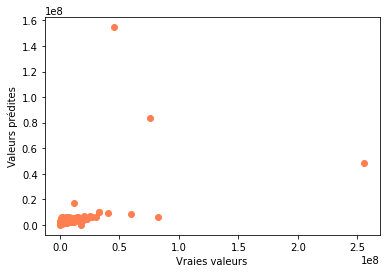

In [275]:
model2 =  linear_model.Ridge(normalize=True, random_state=0, max_iter=500) 
                    
param_grid2 = {'alpha': np.logspace(-9, 0, 200)}

cv=5

modelisation(model2, param_grid2, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'Ridge linéaire (Test)', 'Ridge linéaire (Entrainement)')

In [276]:
df_lin_rid_ST = df_model
df_lin_rid_ST

,Variable Stat,Ridge linéaire (Test),Ridge linéaire (Entrainement)
0,MedAE,1.318553e+06,1.605244e+06
1,MeanAE,4.469947e+06,5.676568e+06
2,MSE,2.308880e+14,3.938924e+14
3,RMSE,1.519500e+07,1.984672e+07
4,R2,1.807294e-01,1.857935e-01
5,Temps (en s),1.323690e-04,8.841695e-02


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 0.8214343584919426}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 532940106791318.75
MedAE : 1527991.09
MeanAE : 6660434.03
RMSE : 23085495.59
R2 : 0.22
******************************************************
Statistiques du Train Set
MSE : 272575682201949.7
MedAE : 1553575.56
MeanAE : 5157241.15
RMSE : 16509866.21
R2 : 0.13
  Variable Stat  Ridge linéaire (Test)  Ridge linéaire (Entrainement)
0         MedAE           1.527991e+06                   1.553576e+06
1        MeanAE           6.660434e+06                   5.157241e+06
2           MSE           5.329401e+14                   2.725757e+14
3          RMSE           2.308550e+07                   1.650987e+07
4            R2           2.194710e-01                   1.252285e-01
5  Temps (en s)           3.870700e-04                   9.448725e-02
<class 'pandas.core.frame.DataFrame'>


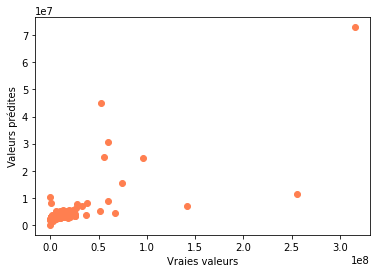

In [298]:
model2 =  linear_model.Ridge(normalize=True, random_state=0, max_iter=500) 
                    
param_grid2 = {'alpha': np.logspace(-1, 0, 200)}

cv=5

modelisation(model2, param_grid2, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'Ridge linéaire (Test)', 'Ridge linéaire (Entrainement)')

In [299]:
df_lin_rid_sans = df_model
df_lin_rid_sans

,Variable Stat,Ridge linéaire (Test),Ridge linéaire (Entrainement)
0,MedAE,1.527991e+06,1.553576e+06
1,MeanAE,6.660434e+06,5.157241e+06
2,MSE,5.329401e+14,2.725757e+14
3,RMSE,2.308550e+07,1.650987e+07
4,R2,2.194710e-01,1.252285e-01
5,Temps (en s),3.870700e-04,9.448725e-02


### Modèle linéaire Lasso

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 0.004008806328898464}
Temps Entrainement 0.16s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 195701521277481.5
MedAE : 1258879.93
MeanAE : 4406631.74
RMSE : 13989335.98
R2 : 0.31
******************************************************
Statistiques du Train Set
MSE : 302643156040246.94
MedAE : 1565641.21
MeanAE : 5572057.62
RMSE : 17396642.09
R2 : 0.37
  Variable Stat  Lasso-Lars (Test)  Lasso-Lars (Entrainement)
0         MedAE       1.258880e+06               1.565641e+06
1        MeanAE       4.406632e+06               5.572058e+06
2           MSE       1.957015e+14               3.026432e+14
3          RMSE       1.398934e+07               1.739664e+07
4            R2       3.055833e-01               3.744128e-01
5  Temps (en s)       2.936400e-04               1.556118e-01
<class 'pandas.core.frame.DataFrame'>


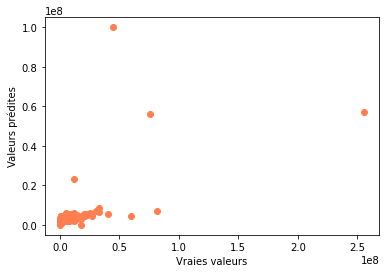

In [322]:
model3 = linear_model.LassoLars(normalize=True, max_iter=500) 

param_grid3 = {'alpha': np.logspace(-9, 0, 200)}

cv=5

modelisation(model3, param_grid3, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'Lasso-Lars (Test)', 'Lasso-Lars (Entrainement)')

In [323]:
df_lin_las_ST = df_model
df_lin_las_ST

,Variable Stat,Lasso-Lars (Test),Lasso-Lars (Entrainement)
0,MedAE,1.258880e+06,1.565641e+06
1,MeanAE,4.406632e+06,5.572058e+06
2,MSE,1.957015e+14,3.026432e+14
3,RMSE,1.398934e+07,1.739664e+07
4,R2,3.055833e-01,3.744128e-01
5,Temps (en s),2.936400e-04,1.556118e-01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 1335.4515629298974}
Temps Entrainement 0.10s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 722292846336982.6
MedAE : 1907939.65
MeanAE : 7679855.41
RMSE : 26875506.44
R2 : -0.06
******************************************************
Statistiques du Train Set
MSE : 331785802235783.2
MedAE : 1916620.05
MeanAE : 5874389.81
RMSE : 18214988.40
R2 : -0.06
  Variable Stat  Lasso-Lars (Test)  Lasso-Lars (Entrainement)
0         MedAE       1.907940e+06               1.916620e+06
1        MeanAE       7.679855e+06               5.874390e+06
2           MSE       7.222928e+14               3.317858e+14
3          RMSE       2.687551e+07               1.821499e+07
4            R2      -5.784971e-02              -6.479334e-02
5  Temps (en s)       4.633430e-04               9.574177e-02
<class 'pandas.core.frame.DataFrame'>


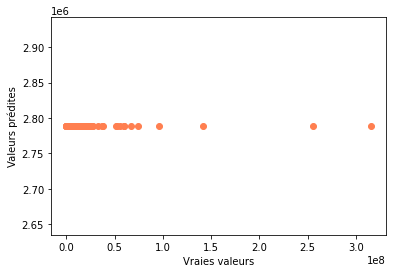

In [353]:
model3 = linear_model.LassoLars(normalize=True, max_iter=500) 

param_grid3 = {'alpha': np.logspace(-2, 4, 200)}

cv=5

modelisation(model3, param_grid3, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'Lasso-Lars (Test)', 'Lasso-Lars (Entrainement)')

In [354]:
df_lin_las_sans = df_model
df_lin_las_sans 

,Variable Stat,Lasso-Lars (Test),Lasso-Lars (Entrainement)
0,MedAE,1.907940e+06,1.916620e+06
1,MeanAE,7.679855e+06,5.874390e+06
2,MSE,7.222928e+14,3.317858e+14
3,RMSE,2.687551e+07,1.821499e+07
4,R2,-5.784971e-02,-6.479334e-02
5,Temps (en s),4.633430e-04,9.574177e-02


### Modèle linéaire elasticnet

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'l1_ratio': 0.9311306566781066, 'alpha': 0.0018679135990207828}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 205553479583128.78
MedAE : 1273120.32
MeanAE : 4387752.46
RMSE : 14337136.38
R2 : 0.27
******************************************************
Statistiques du Train Set
MSE : 338571379546862.0
MedAE : 1601743.25
MeanAE : 5634841.44
RMSE : 18400309.22
R2 : 0.30
  Variable Stat  ElasticNet (Test)  ElasticNet (Entrainement)
0         MedAE       1.273120e+06               1.601743e+06
1        MeanAE       4.387752e+06               5.634841e+06
2           MSE       2.055535e+14               3.385714e+14
3          RMSE       1.433714e+07               1.840031e+07
4            R2       2.706251e-01               3.001464e-01
5  Temps (en s)       1.142460e-04               9.345590e-02
<class 'pandas.core.frame.DataFrame'>


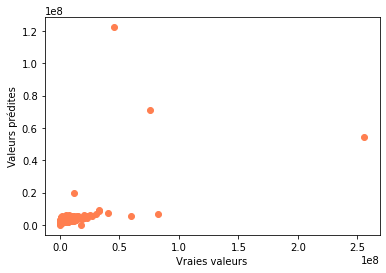

In [381]:
model4 = linear_model.ElasticNet(normalize=True, random_state=0, max_iter=500) 

param_grid4 = {'alpha': np.logspace(-3, -1, 200), 
               'l1_ratio':  np.random.random(100)}

cv=5

modelisation(model4, param_grid4, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'ElasticNet (Test)', 'ElasticNet (Entrainement)')

In [382]:
df_lin_elnet_ST = df_model
df_lin_elnet_ST

,Variable Stat,ElasticNet (Test),ElasticNet (Entrainement)
0,MedAE,1.273120e+06,1.601743e+06
1,MeanAE,4.387752e+06,5.634841e+06
2,MSE,2.055535e+14,3.385714e+14
3,RMSE,1.433714e+07,1.840031e+07
4,R2,2.706251e-01,3.001464e-01
5,Temps (en s),1.142460e-04,9.345590e-02


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'l1_ratio': 0.14579219050886671, 'alpha': 0.001448118227674533}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 551888223072716.6
MedAE : 1532677.65
MeanAE : 6750822.55
RMSE : 23492301.36
R2 : 0.19
******************************************************
Statistiques du Train Set
MSE : 275263122396755.9
MedAE : 1550961.66
MeanAE : 5164262.65
RMSE : 16591055.49
R2 : 0.12
  Variable Stat  ElasticNet (Test)  ElasticNet (Entrainement)
0         MedAE       1.532678e+06               1.550962e+06
1        MeanAE       6.750823e+06               5.164263e+06
2           MSE       5.518882e+14               2.752631e+14
3          RMSE       2.349230e+07               1.659106e+07
4            R2       1.917201e-01               1.166037e-01
5  Temps (en s)       1.125210e-04               9.356361e-02
<class 'pandas.core.frame.DataFrame'>


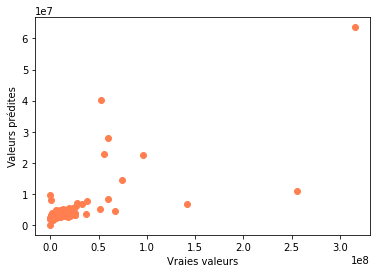

In [398]:
model4 = linear_model.ElasticNet(normalize=True, random_state=0, max_iter=500) 

param_grid4 = {'alpha': np.logspace(-7, 2, 200), 
               'l1_ratio':  np.random.random(100)}

cv=5

modelisation(model4, param_grid4, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'ElasticNet (Test)', 'ElasticNet (Entrainement)')

In [399]:
df_lin_elnet_sans = df_model
df_lin_elnet_sans

,Variable Stat,ElasticNet (Test),ElasticNet (Entrainement)
0,MedAE,1.532678e+06,1.550962e+06
1,MeanAE,6.750823e+06,5.164263e+06
2,MSE,5.518882e+14,2.752631e+14
3,RMSE,2.349230e+07,1.659106e+07
4,R2,1.917201e-01,1.166037e-01
5,Temps (en s),1.125210e-04,9.356361e-02


## Modèles Non-Linéaires

### Modèle non-linéaire - Ridge avec Kernel rbf

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.02833096101839324, 'alpha': 0.051114334834401656}
Temps Entrainement 0.52s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 206924568032593.03
MedAE : 972859.23
MeanAE : 3338382.27
RMSE : 14384872.89
R2 : 0.27
******************************************************
Statistiques du Train Set
MSE : 240970143888603.7
MedAE : 986087.59
MeanAE : 4175670.14
RMSE : 15523213.07
R2 : 0.50
  Variable Stat  Ridge avec Kernel rbf (Test)  \
0         MedAE                  9.728592e+05   
1        MeanAE                  3.338382e+06   
2           MSE                  2.069246e+14   
3          RMSE                  1.438487e+07   
4            R2                  2.657600e-01   
5  Temps (en s)                  3.656695e-03   

   Ridge avec Kernel rbf (Entrainement)  
0                          9.860876e+05  
1                          4.175670e+06  
2                          2.409701e+14  
3         

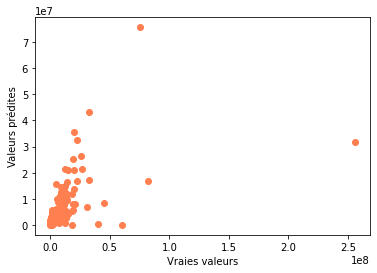

In [433]:
model5 = KernelRidge(kernel='rbf') # noyau Gaussien

param_grid5 = {'alpha': np.logspace(-4, 3, 200), 
               'gamma': np.logspace(-2, 1, 200)}

cv=5

modelisation(model5, param_grid5, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'Ridge avec Kernel rbf (Test)', 'Ridge avec Kernel rbf (Entrainement)')

In [434]:
df_kr_rbf_ST = df_model
df_kr_rbf_ST

,Variable Stat,Ridge avec Kernel rbf (Test),Ridge avec Kernel rbf (Entrainement)
0,MedAE,9.728592e+05,9.860876e+05
1,MeanAE,3.338382e+06,4.175670e+06
2,MSE,2.069246e+14,2.409701e+14
3,RMSE,1.438487e+07,1.552321e+07
4,R2,2.657600e-01,5.018958e-01
5,Temps (en s),3.656695e-03,5.186876e-01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.0004247571552536903, 'alpha': 0.08119844993184008}
Temps Entrainement 0.52s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 509935753477610.75
MedAE : 1394682.39
MeanAE : 6146526.42
RMSE : 22581757.09
R2 : 0.25
******************************************************
Statistiques du Train Set
MSE : 235099461773197.2
MedAE : 1378844.90
MeanAE : 4635624.97
RMSE : 15332953.46
R2 : 0.25
  Variable Stat  Ridge avec Kernel rbf (Test)  \
0         MedAE                  1.394682e+06   
1        MeanAE                  6.146526e+06   
2           MSE                  5.099358e+14   
3          RMSE                  2.258176e+07   
4            R2                  2.531625e-01   
5  Temps (en s)                  3.920034e-03   

   Ridge avec Kernel rbf (Entrainement)  
0                          1.378845e+06  
1                          4.635625e+06  
2                          2.350995e+14  
3      

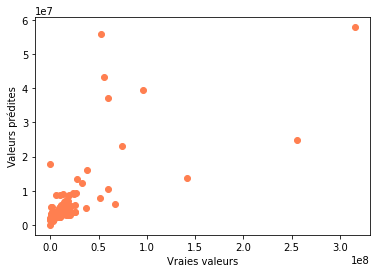

In [469]:
model5 = KernelRidge(kernel='rbf') # noyau Gaussien

param_grid5 = {'alpha': np.logspace(-10, -1, 200), 
               'gamma': np.logspace(-9, 1, 200)}

cv=5

modelisation(model5, param_grid5, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'Ridge avec Kernel rbf (Test)', 'Ridge avec Kernel rbf (Entrainement)')

In [470]:
df_kr_rbf_sans = df_model
df_kr_rbf_sans

,Variable Stat,Ridge avec Kernel rbf (Test),Ridge avec Kernel rbf (Entrainement)
0,MedAE,1.394682e+06,1.378845e+06
1,MeanAE,6.146526e+06,4.635625e+06
2,MSE,5.099358e+14,2.350995e+14
3,RMSE,2.258176e+07,1.533295e+07
4,R2,2.531625e-01,2.455001e-01
5,Temps (en s),3.920034e-03,5.247636e-01


### Modèle non-linéaire - Random Forest Regressor

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 5}
Temps Entrainement 13.18s
Temps Test 0.11s
*******************************************************
Statistiques du Test Set
MSE : 262324065523611.28
MedAE : 846179.01
MeanAE : 3622684.90
RMSE : 16196421.38
R2 : 0.07
******************************************************
Statistiques du Train Set
MSE : 355535168036626.25
MedAE : 849998.03
MeanAE : 4642997.10
RMSE : 18855640.22
R2 : 0.27
  Variable Stat  Random Forest Regression (Test)  \
0         MedAE                     8.461790e+05   
1        MeanAE                     3.622685e+06   
2           MSE                     2.623241e+14   
3          RMSE                     1.619642e+07   
4            R2                     6.918342e-02   
5  Temps (en s)                     1.085165e-01   

   Random Forest Regression (Entrainement)  
0                             8.499980e+05  
1                             4.642997e+06  
2                    

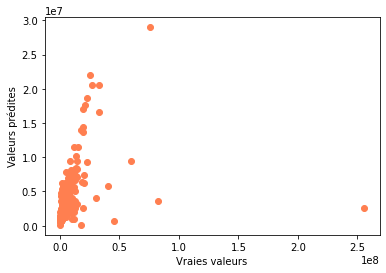

In [472]:
model6 = RandomForestRegressor(random_state=0, #à fixer pour avoir la même série de nb aléatoire 
                               n_jobs=-1, oob_score = True)

param_grid6 = {'n_estimators': [50, 200], # nb arbre # dpd du jeu de données # pas dans la GSCV #perte mémmoire et temps cal
               'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth': [2, 3, 4, 5, 6, 7], # pas 1 pour prof arbre
              }

cv=5

modelisation(model6, param_grid6, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'Random Forest Regression (Test)', 'Random Forest Regression (Entrainement)')

In [473]:
df_rf_reg_ST = df_model
df_rf_reg_ST

,Variable Stat,Random Forest Regression (Test),Random Forest Regression (Entrainement)
0,MedAE,8.461790e+05,8.499980e+05
1,MeanAE,3.622685e+06,4.642997e+06
2,MSE,2.623241e+14,3.555352e+14
3,RMSE,1.619642e+07,1.885564e+07
4,R2,6.918342e-02,2.650809e-01
5,Temps (en s),1.085165e-01,1.317662e+01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 6}
Temps Entrainement 13.39s
Temps Test 0.11s
*******************************************************
Statistiques du Test Set
MSE : 663241924711143.5
MedAE : 1027542.55
MeanAE : 6016153.02
RMSE : 25753483.74
R2 : 0.03
******************************************************
Statistiques du Train Set
MSE : 239304141777319.38
MedAE : 861888.79
MeanAE : 3726778.32
RMSE : 15469458.35
R2 : 0.23
  Variable Stat  Random Forest Regression (Test)  \
0         MedAE                     1.027543e+06   
1        MeanAE                     6.016153e+06   
2           MSE                     6.632419e+14   
3          RMSE                     2.575348e+07   
4            R2                     2.863460e-02   
5  Temps (en s)                     1.052999e-01   

   Random Forest Regression (Entrainement)  
0                             8.618888e+05  
1                             3.726778e+06  
2                   

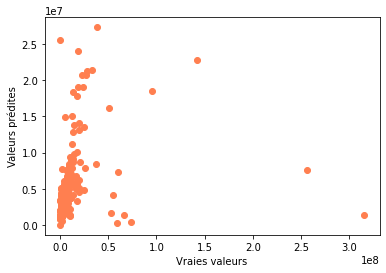

In [475]:
model6 = RandomForestRegressor(random_state=0, #à fixer pour avoir la même série de nb aléatoire 
                               n_jobs=-1, oob_score = True)

param_grid6 = {'n_estimators': [50, 200], # nb arbre # dpd du jeu de données # pas dans la GSCV #perte mémmoire et temps cal
               'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth': [2, 3, 4, 5, 6, 7], # pas 1 pour prof arbre
              }

cv=5

modelisation(model6, param_grid6, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'Random Forest Regression (Test)', 'Random Forest Regression (Entrainement)')

In [476]:
df_rf_reg_sans = df_model
df_rf_reg_sans

,Variable Stat,Random Forest Regression (Test),Random Forest Regression (Entrainement)
0,MedAE,1.027543e+06,8.618888e+05
1,MeanAE,6.016153e+06,3.726778e+06
2,MSE,6.632419e+14,2.393041e+14
3,RMSE,2.575348e+07,1.546946e+07
4,R2,2.863460e-02,2.320061e-01
5,Temps (en s),1.052999e-01,1.338867e+01


### Modèle non-linéaire - Support Vector Regression avec Kernel rbf

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.019791668678535563, 'C': 53.53566677410724}
Temps Entrainement 2.00s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 54297812969924.25
MedAE : 863956.53
MeanAE : 2545404.02
RMSE : 7368704.97
R2 : 0.81
******************************************************
Statistiques du Train Set
MSE : 97969271778735.4
MedAE : 782314.78
MeanAE : 2471279.05
RMSE : 9897942.81
R2 : 0.80
  Variable Stat  Support Vector Regression (Test)  \
0         MedAE                      8.639565e+05   
1        MeanAE                      2.545404e+06   
2           MSE                      5.429781e+13   
3          RMSE                      7.368705e+06   
4            R2                      8.073326e-01   
5  Temps (en s)                      4.921277e-03   

   Support Vector Regression (Entrainement)  
0                              7.823148e+05  
1                              2.471279e+06  
2                     

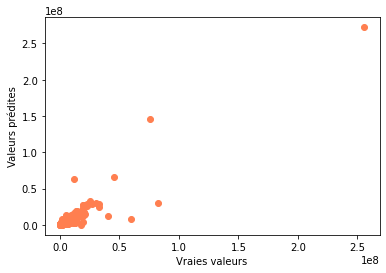

In [491]:
model7 = SVR(kernel='rbf', epsilon=.1)

param_grid7 = {'C': np.logspace(-2, 5, 200), 
               'gamma': np.logspace(-3, 3, 200)}

cv=5

modelisation(model7, param_grid7, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'Support Vector Regression (Test)', 'Support Vector Regression (Entrainement)')

In [492]:
df_svr_rbf_ST = df_model
df_svr_rbf_ST

,Variable Stat,Support Vector Regression (Test),Support Vector Regression (Entrainement)
0,MedAE,8.639565e+05,7.823148e+05
1,MeanAE,2.545404e+06,2.471279e+06
2,MSE,5.429781e+13,9.796927e+13
3,RMSE,7.368705e+06,9.897943e+06
4,R2,8.073326e-01,7.974898e-01
5,Temps (en s),4.921277e-03,2.004681e+00


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.011489510001873092, 'C': 0.2523539170434766}
Temps Entrainement 1.17s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 552587699771889.2
MedAE : 1361838.25
MeanAE : 5594369.75
RMSE : 23507184.00
R2 : 0.19
******************************************************
Statistiques du Train Set
MSE : 234199179733713.72
MedAE : 1297760.39
MeanAE : 4123273.48
RMSE : 15303567.55
R2 : 0.25
  Variable Stat  Support Vector Regression (Test)  \
0         MedAE                      1.361838e+06   
1        MeanAE                      5.594370e+06   
2           MSE                      5.525877e+14   
3          RMSE                      2.350718e+07   
4            R2                      1.906957e-01   
5  Temps (en s)                      5.184096e-03   

   Support Vector Regression (Entrainement)  
0                              1.297760e+06  
1                              4.123273e+06  
2              

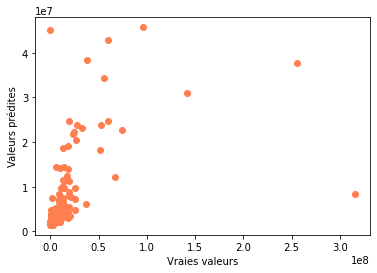

In [547]:
model7 = SVR(kernel='rbf', epsilon=.1)

param_grid7 = {'C': np.logspace(-9, 2, 200), 
               'gamma': np.logspace(-2, 2, 200)}

cv=5

modelisation(model7, param_grid7, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'Support Vector Regression (Test)', 'Support Vector Regression (Entrainement)')

In [548]:
df_svr_rbf_sans = df_model
df_svr_rbf_sans

,Variable Stat,Support Vector Regression (Test),Support Vector Regression (Entrainement)
0,MedAE,1.361838e+06,1.297760e+06
1,MeanAE,5.594370e+06,4.123273e+06
2,MSE,5.525877e+14,2.341992e+14
3,RMSE,2.350718e+07,1.530357e+07
4,R2,1.906957e-01,2.483894e-01
5,Temps (en s),5.184096e-03,1.172515e+00


### Modèle non-linéaire - Support Vector Regression avec Kernel polynomial 

1 - Avec ENERGYSTARScore

2 - Sans ENERGYSTARScore

### Modèle non-linéaire - KNN

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'n_neighbors': 11, 'metric': 'manhattan'}
Temps Entrainement 0.19s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 215310533665517.9
MedAE : 1052162.67
MeanAE : 3888171.11
RMSE : 14673463.59
R2 : 0.24
******************************************************
Statistiques du Train Set
MSE : 416964651977468.3
MedAE : 1165175.08
MeanAE : 5227092.91
RMSE : 20419712.34
R2 : 0.14
  Variable Stat  K Nearest Neighbors (Test)  \
0         MedAE                1.052163e+06   
1        MeanAE                3.888171e+06   
2           MSE                2.153105e+14   
3          RMSE                1.467346e+07   
4            R2                2.360037e-01   
5  Temps (en s)                4.980652e-03   

   K Nearest Neighbors (Entrainement)  
0                        1.165175e+06  
1                        5.227093e+06  
2                        4.169647e+14  
3                        2.041971e+07  
4         

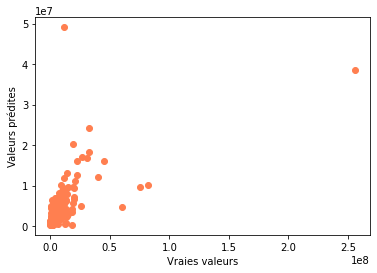

In [549]:
model8 = KNeighborsRegressor()

param_grid8 = {'n_neighbors': np.arange(1, 25),
               'metric': ['euclidean', 'manhattan', 'minkowski']} 

cv=5

modelisation(model8, param_grid8, cv, 
                  X3_train, y3_train, X3_test, y3_test, 
                  'K Nearest Neighbors (Test)', 'K Nearest Neighbors (Entrainement)')

In [550]:
df_knn_ST = df_model
df_knn_ST

,Variable Stat,K Nearest Neighbors (Test),K Nearest Neighbors (Entrainement)
0,MedAE,1.052163e+06,1.165175e+06
1,MeanAE,3.888171e+06,5.227093e+06
2,MSE,2.153105e+14,4.169647e+14
3,RMSE,1.467346e+07,2.041971e+07
4,R2,2.360037e-01,1.381013e-01
5,Temps (en s),4.980652e-03,1.941661e-01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'n_neighbors': 11, 'metric': 'manhattan'}
Temps Entrainement 0.18s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 589454755026326.0
MedAE : 1284724.75
MeanAE : 6209950.20
RMSE : 24278689.32
R2 : 0.14
******************************************************
Statistiques du Train Set
MSE : 261879056306038.1
MedAE : 1152408.75
MeanAE : 4198881.47
RMSE : 16182677.66
R2 : 0.16
  Variable Stat  K Nearest Neighbors (Test)  \
0         MedAE                1.284725e+06   
1        MeanAE                6.209950e+06   
2           MSE                5.894548e+14   
3          RMSE                2.427869e+07   
4            R2                1.367012e-01   
5  Temps (en s)                4.656825e-03   

   K Nearest Neighbors (Entrainement)  
0                        1.152409e+06  
1                        4.198881e+06  
2                        2.618791e+14  
3                        1.618268e+07  
4         

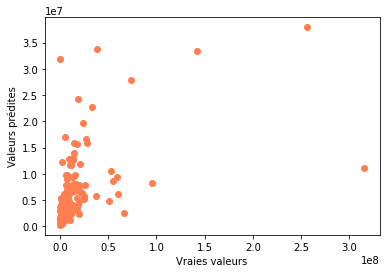

In [551]:
model8 = KNeighborsRegressor()

param_grid8 = {'n_neighbors': np.arange(1, 25),
               'metric': ['euclidean', 'manhattan', 'minkowski']} 

cv=5

modelisation(model8, param_grid8, cv, 
                  X5_train, y5_train, X5_test, y5_test, 
                  'K Nearest Neighbors (Test)', 'K Nearest Neighbors (Entrainement)')

In [552]:
df_knn_sans = df_model
df_knn_sans

,Variable Stat,K Nearest Neighbors (Test),K Nearest Neighbors (Entrainement)
0,MedAE,1.284725e+06,1.152409e+06
1,MeanAE,6.209950e+06,4.198881e+06
2,MSE,5.894548e+14,2.618791e+14
3,RMSE,2.427869e+07,1.618268e+07
4,R2,1.367012e-01,1.595569e-01
5,Temps (en s),4.656825e-03,1.843862e-01


## Comparaison des modèles entre eux

1 - Avec ENERGYSTARScore

<Figure size 432x288 with 0 Axes>

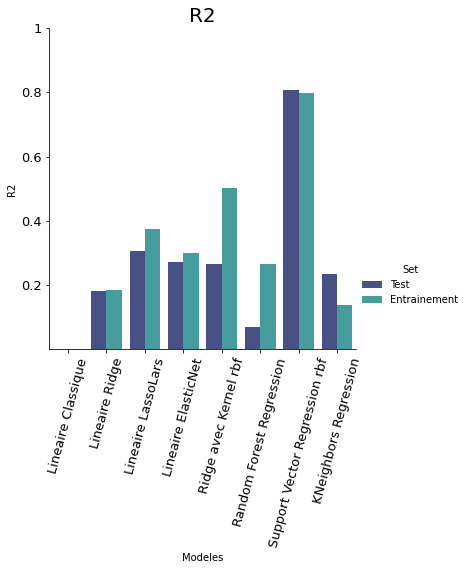

<Figure size 432x288 with 0 Axes>

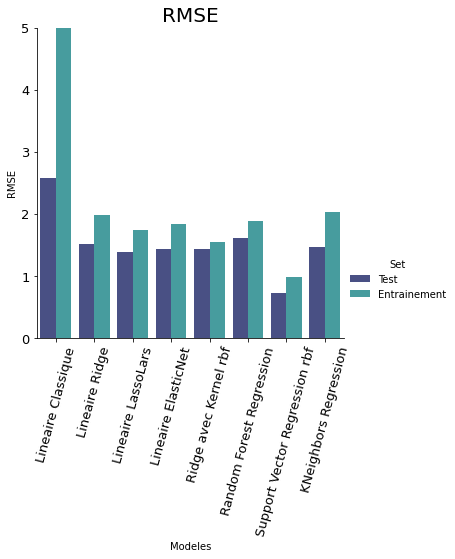

<Figure size 432x288 with 0 Axes>

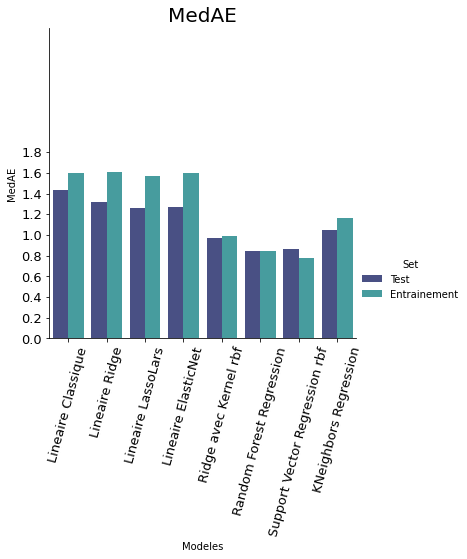

<Figure size 432x288 with 0 Axes>

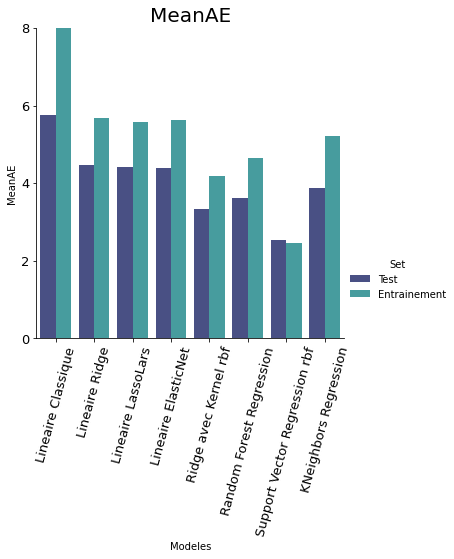

In [553]:
comparaison(df_lin_cl_ST, df_lin_rid_ST, df_lin_las_ST, df_lin_elnet_ST, df_kr_rbf_ST, df_rf_reg_ST, df_svr_rbf_ST, df_knn_ST, [0, 5*10**7], [0, 3*10**6], [0, 8*10**6])

In [554]:
df_mod_Energy_ST = df_mod_T
df_mod_Energy_ST

,MedAE,MeanAE,MSE,RMSE,R2,Temps (en s),Modeles,Set
Linéaire classique (Test),1.439133e+06,5.766929e+06,6.698949e+14,2.588233e+07,-1.377019,0.000367,Lineaire Classique,Test
Linéaire classique (Entrainement),1.595315e+06,9.205579e+06,4.875109e+15,6.982198e+07,-9.077232,0.013422,Lineaire Classique,Entrainement
Ridge linéaire (Test),1.318553e+06,4.469947e+06,2.308880e+14,1.519500e+07,0.180729,0.000132,Lineaire Ridge,Test
Ridge linéaire (Entrainement),1.605244e+06,5.676568e+06,3.938924e+14,1.984672e+07,0.185793,0.088417,Lineaire Ridge,Entrainement
Lasso-Lars (Test),1.258880e+06,4.406632e+06,1.957015e+14,1.398934e+07,0.305583,0.000294,Lineaire LassoLars,Test
Lasso-Lars (Entrainement),1.565641e+06,5.572058e+06,3.026432e+14,1.739664e+07,0.374413,0.155612,Lineaire LassoLars,Entrainement
ElasticNet (Test),1.273120e+06,4.387752e+06,2.055535e+14,1.433714e+07,0.270625,0.000114,Lineaire ElasticNet,Test
ElasticNet (Entrainement),1.601743e+06,5.634841e+06,3.385714e+14,1.840031e+07,0.300146,0.093456,Lineaire ElasticNet,Entrainement
Ridge avec Kernel rbf (Test),9.728592e+05,3.338382e+06,2.069246e+14,1.438487e+07,0.265760,0.003657,Ridge avec Kernel rbf,Test
Ridge avec Kernel rbf (Entrainement),9.860876e+05,4.175670e+06,2.409701e+14,1.552321e+07,0.501896,0.518688,Ridge avec Kernel rbf,Entrainement


2 - Sans ENERGYSTARScore

<Figure size 432x288 with 0 Axes>

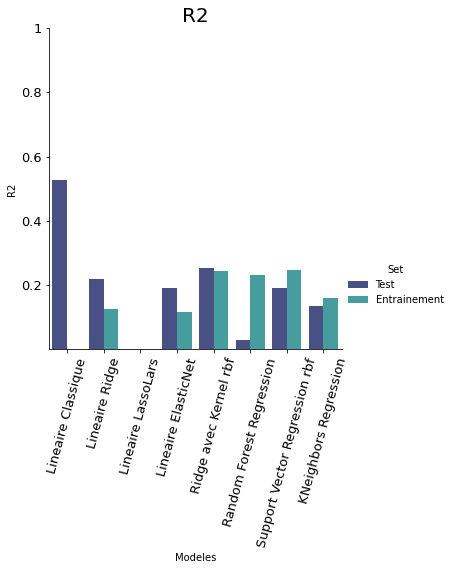

<Figure size 432x288 with 0 Axes>

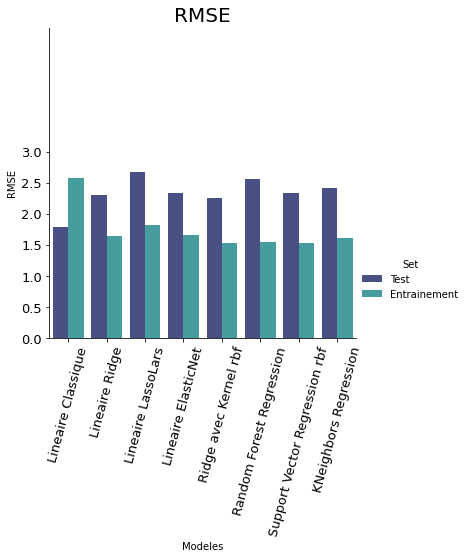

<Figure size 432x288 with 0 Axes>

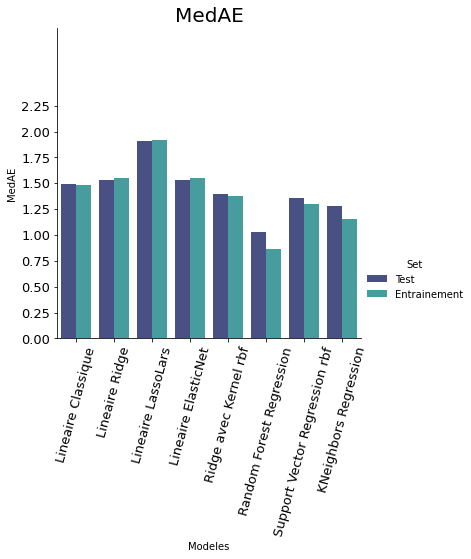

<Figure size 432x288 with 0 Axes>

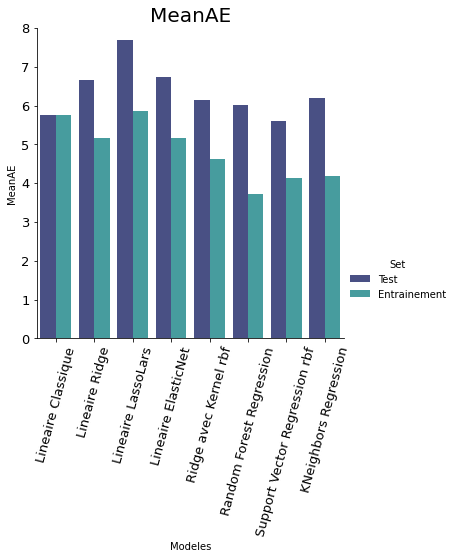

In [555]:
comparaison(df_lin_cl_sans, df_lin_rid_sans, df_lin_las_sans, df_lin_elnet_sans, df_kr_rbf_sans, df_rf_reg_sans, df_svr_rbf_sans, df_knn_sans, [0, 5*10**7], [0, 3*10**6], [0, 8*10**6])

In [556]:
df_mod_Energy_sans = df_mod_T
df_mod_Energy_sans

,MedAE,MeanAE,MSE,RMSE,R2,Temps (en s),Modeles,Set
Linéaire classique (Test),1.490609e+06,5.751175e+06,3.223453e+14,1.795398e+07,0.527902,0.000369,Lineaire Classique,Test
Linéaire classique (Entrainement),1.487885e+06,5.758885e+06,6.652279e+14,2.579201e+07,-1.134902,0.011612,Lineaire Classique,Entrainement
Ridge linéaire (Test),1.527991e+06,6.660434e+06,5.329401e+14,2.308550e+07,0.219471,0.000387,Lineaire Ridge,Test
Ridge linéaire (Entrainement),1.553576e+06,5.157241e+06,2.725757e+14,1.650987e+07,0.125228,0.094487,Lineaire Ridge,Entrainement
Lasso-Lars (Test),1.907940e+06,7.679855e+06,7.222928e+14,2.687551e+07,-0.057850,0.000463,Lineaire LassoLars,Test
Lasso-Lars (Entrainement),1.916620e+06,5.874390e+06,3.317858e+14,1.821499e+07,-0.064793,0.095742,Lineaire LassoLars,Entrainement
ElasticNet (Test),1.532678e+06,6.750823e+06,5.518882e+14,2.349230e+07,0.191720,0.000113,Lineaire ElasticNet,Test
ElasticNet (Entrainement),1.550962e+06,5.164263e+06,2.752631e+14,1.659106e+07,0.116604,0.093564,Lineaire ElasticNet,Entrainement
Ridge avec Kernel rbf (Test),1.394682e+06,6.146526e+06,5.099358e+14,2.258176e+07,0.253162,0.003920,Ridge avec Kernel rbf,Test
Ridge avec Kernel rbf (Entrainement),1.378845e+06,4.635625e+06,2.350995e+14,1.533295e+07,0.245500,0.524764,Ridge avec Kernel rbf,Entrainement


# Modèles de Prédictions d'émissions de CO2

## Modèles Naïfs

### Modèle aléatoire

1 - Avec ENERGYSTARScore

In [557]:
mod_naif_aleatoire(y4, y4_test)

Temps Test 0.00s
*******************************************************
MSE : 883922501642.53
MedAE : 58490.14
MeanAE : 384162.85
RMSE : 940171.53
R2 : -1.99
  Variable Stat  Naïf Aléatoire (Test)
0         MedAE           5.849014e+04
1        MeanAE           3.841629e+05
2           MSE           8.839225e+11
3          RMSE           9.401715e+05
4            R2          -1.990760e+00
5  Temps (en s)           3.161320e-04
<class 'pandas.core.frame.DataFrame'>


In [558]:
df_naif_al_ST = df_naif_al
df_naif_al_ST

,Variable Stat,Naïf Aléatoire (Test)
0,MedAE,5.849014e+04
1,MeanAE,3.841629e+05
2,MSE,8.839225e+11
3,RMSE,9.401715e+05
4,R2,-1.990760e+00
5,Temps (en s),3.161320e-04


2 - Sans ENERGYSTARScore

In [559]:
mod_naif_aleatoire(y6, y6_test)

Temps Test 0.00s
*******************************************************
MSE : 1534473541736.97
MedAE : 61065.60
MeanAE : 476667.05
RMSE : 1238738.69
R2 : -0.82
  Variable Stat  Naïf Aléatoire (Test)
0         MedAE           6.106560e+04
1        MeanAE           4.766670e+05
2           MSE           1.534474e+12
3          RMSE           1.238739e+06
4            R2          -8.158178e-01
5  Temps (en s)           2.677180e-04
<class 'pandas.core.frame.DataFrame'>


In [560]:
df_naif_al_sans = df_naif_al
df_naif_al_sans

,Variable Stat,Naïf Aléatoire (Test)
0,MedAE,6.106560e+04
1,MeanAE,4.766670e+05
2,MSE,1.534474e+12
3,RMSE,1.238739e+06
4,R2,-8.158178e-01
5,Temps (en s),2.677180e-04


### Modèle naïf des moyennes

1 - Avec ENERGYSTARScore

In [561]:
mod_naif_moyennes(X4_train, y4_train, X4_test, y4_test)

Temps Entrainement 0.00s
Temps Test 0.00s
*******************************************************
MSE : 305919720466.78
MedAE : 26658.94
MeanAE : 123276.35
RMSE : 553100.10
R2 : -0.04
*******************************************************
Statistiques du Train Set
MSE : 370426002184.8541
MedAE : 27243.38
MeanAE : 115111.24
RMSE : 608626.32
R2 : -0.03
  Variable Stat  Naïf Moyennes (Test)  Naïf Moyennes (Entrainement)
0         MedAE          2.665894e+04                  2.724338e+04
1        MeanAE          1.232763e+05                  1.151112e+05
2           MSE          3.059197e+11                  3.704260e+11
3          RMSE          5.531001e+05                  6.086263e+05
4            R2         -3.508227e-02                 -2.601908e-02
5  Temps (en s)          4.213600e-05                  2.622650e-04
<class 'pandas.core.frame.DataFrame'>


In [562]:
df_naif_moy_ST = df_naif_moy
df_naif_moy_ST

,Variable Stat,Naïf Moyennes (Test),Naïf Moyennes (Entrainement)
0,MedAE,2.665894e+04,2.724338e+04
1,MeanAE,1.232763e+05,1.151112e+05
2,MSE,3.059197e+11,3.704260e+11
3,RMSE,5.531001e+05,6.086263e+05
4,R2,-3.508227e-02,-2.601908e-02
5,Temps (en s),4.213600e-05,2.622650e-04


2 - Sans ENERGYSTARScore

In [563]:
mod_naif_moyennes(X6_train, y6_train, X6_test, y6_test)

Temps Entrainement 0.00s
Temps Test 0.00s
*******************************************************
MSE : 871102839327.12
MedAE : 25906.06
MeanAE : 177089.40
RMSE : 933328.90
R2 : -0.03
*******************************************************
Statistiques du Train Set
MSE : 128389507916.33324
MedAE : 24949.27
MeanAE : 92295.72
RMSE : 358314.82
R2 : -0.05
  Variable Stat  Naïf Moyennes (Test)  Naïf Moyennes (Entrainement)
0         MedAE          2.590606e+04                  2.494927e+04
1        MeanAE          1.770894e+05                  9.229572e+04
2           MSE          8.711028e+11                  1.283895e+11
3          RMSE          9.333289e+05                  3.583148e+05
4            R2         -3.081873e-02                 -4.654125e-02
5  Temps (en s)          9.598800e-05                  3.633690e-04
<class 'pandas.core.frame.DataFrame'>


In [564]:
df_naif_moy_sans = df_naif_moy
df_naif_moy_sans

,Variable Stat,Naïf Moyennes (Test),Naïf Moyennes (Entrainement)
0,MedAE,2.590606e+04,2.494927e+04
1,MeanAE,1.770894e+05,9.229572e+04
2,MSE,8.711028e+11,1.283895e+11
3,RMSE,9.333289e+05,3.583148e+05
4,R2,-3.081873e-02,-4.654125e-02
5,Temps (en s),9.598800e-05,3.633690e-04


## Modèles Linéaires

### Modèle linéaire Classique

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {}
Temps Entrainement 0.01s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 1970754701023.6562
MedAE : 20336.85
MeanAE : 231307.20
RMSE : 1403835.71
R2 : -5.67
******************************************************
Statistiques du Train Set
MSE : 11087347396715.064
MedAE : 20528.14
MeanAE : 250737.21
RMSE : 3329766.87
R2 : -29.71
  Variable Stat  Linéaire classique (Test)  Linéaire classique (Entrainement)
0         MedAE               2.033685e+04                       2.052814e+04
1        MeanAE               2.313072e+05                       2.507372e+05
2           MSE               1.970755e+12                       1.108735e+13
3          RMSE               1.403836e+06                       3.329767e+06
4            R2              -5.668067e+00                      -2.971013e+01
5  Temps (en s)               3.896390e-04                       1.250695e-02
<class 'pandas.core.frame.DataFrame'>

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


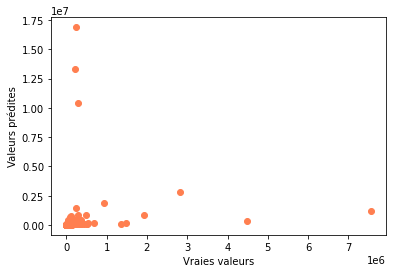

In [565]:
model1 = linear_model.LinearRegression(normalize=0)

param_grid1 = {}

cv=5

modelisation(model1, param_grid1, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'Linéaire classique (Test)', 'Linéaire classique (Entrainement)')

In [566]:
df_lin_cl_ST = df_model
df_lin_cl_ST

,Variable Stat,Linéaire classique (Test),Linéaire classique (Entrainement)
0,MedAE,2.033685e+04,2.052814e+04
1,MeanAE,2.313072e+05,2.507372e+05
2,MSE,1.970755e+12,1.108735e+13
3,RMSE,1.403836e+06,3.329767e+06
4,R2,-5.668067e+00,-2.971013e+01
5,Temps (en s),3.896390e-04,1.250695e-02


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {}
Temps Entrainement 0.01s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 15627227498933.482
MedAE : 22028.09
MeanAE : 347395.99
RMSE : 3953128.82
R2 : -17.49
******************************************************
Statistiques du Train Set
MSE : 486486560401.13916
MedAE : 19387.20
MeanAE : 121661.74
RMSE : 697485.89
R2 : -2.97
  Variable Stat  Linéaire classique (Test)  Linéaire classique (Entrainement)
0         MedAE               2.202809e+04                       1.938720e+04
1        MeanAE               3.473960e+05                       1.216617e+05
2           MSE               1.562723e+13                       4.864866e+11
3          RMSE               3.953129e+06                       6.974859e+05
4            R2              -1.749247e+01                      -2.965497e+00
5  Temps (en s)               3.522640e-04                       1.186756e-02
<class 'pandas.core.frame.DataFrame'>


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


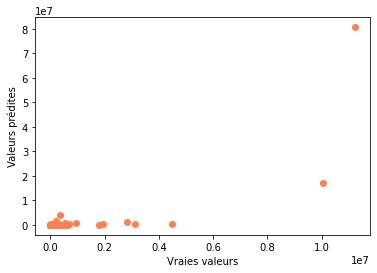

In [567]:
model1 = linear_model.LinearRegression(normalize=0)

param_grid1 = {}

cv=5

modelisation(model1, param_grid1, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'Linéaire classique (Test)', 'Linéaire classique (Entrainement)')

In [568]:
df_lin_cl_sans = df_model
df_lin_cl_sans

,Variable Stat,Linéaire classique (Test),Linéaire classique (Entrainement)
0,MedAE,2.202809e+04,1.938720e+04
1,MeanAE,3.473960e+05,1.216617e+05
2,MSE,1.562723e+13,4.864866e+11
3,RMSE,3.953129e+06,6.974859e+05
4,R2,-1.749247e+01,-2.965497e+00
5,Temps (en s),3.522640e-04,1.186756e-02


### Modèle linéaire Ridge

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 1.1895340673703196}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 292854128113.10394
MedAE : 16530.77
MeanAE : 118947.47
RMSE : 541159.98
R2 : 0.01
******************************************************
Statistiques du Train Set
MSE : 247166122403.3541
MedAE : 16997.85
MeanAE : 98989.92
RMSE : 497158.05
R2 : 0.32
  Variable Stat  Ridge linéaire (Test)  Ridge linéaire (Entrainement)
0         MedAE           1.653077e+04                   1.699785e+04
1        MeanAE           1.189475e+05                   9.898992e+04
2           MSE           2.928541e+11                   2.471661e+11
3          RMSE           5.411600e+05                   4.971580e+05
4            R2           9.125285e-03                   3.153905e-01
5  Temps (en s)           4.192410e-04                   8.596790e-02
<class 'pandas.core.frame.DataFrame'>


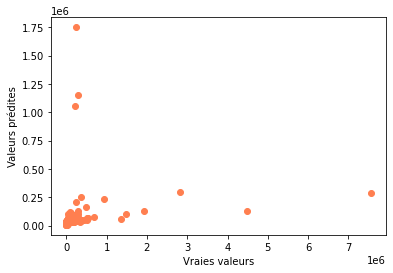

In [590]:
model2 =  linear_model.Ridge(normalize=True, random_state=0, max_iter=500) 
                    
param_grid2 = {'alpha': np.logspace(0, 3, 200)}

cv=5

modelisation(model2, param_grid2, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'Ridge linéaire (Test)', 'Ridge linéaire (Entrainement)')

In [591]:
df_lin_rid_ST = df_model
df_lin_rid_ST

,Variable Stat,Ridge linéaire (Test),Ridge linéaire (Entrainement)
0,MedAE,1.653077e+04,1.699785e+04
1,MeanAE,1.189475e+05,9.898992e+04
2,MSE,2.928541e+11,2.471661e+11
3,RMSE,5.411600e+05,4.971580e+05
4,R2,9.125285e-03,3.153905e-01
5,Temps (en s),4.192410e-04,8.596790e-02


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 0.8214343584919426}
Temps Entrainement 0.10s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 500337304145.7889
MedAE : 17967.24
MeanAE : 149008.45
RMSE : 707345.25
R2 : 0.41
******************************************************
Statistiques du Train Set
MSE : 121426270651.95436
MedAE : 15813.92
MeanAE : 85648.46
RMSE : 348462.72
R2 : 0.01
  Variable Stat  Ridge linéaire (Test)  Ridge linéaire (Entrainement)
0         MedAE           1.796724e+04                   1.581392e+04
1        MeanAE           1.490084e+05                   8.564846e+04
2           MSE           5.003373e+11                   1.214263e+11
3          RMSE           7.073453e+05                   3.484627e+05
4            R2           4.079263e-01                   1.021817e-02
5  Temps (en s)           1.221240e-04                   1.009600e-01
<class 'pandas.core.frame.DataFrame'>


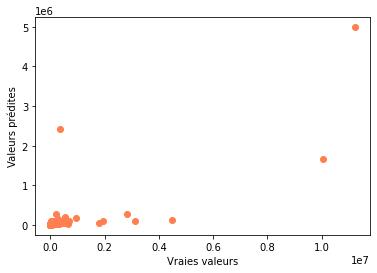

In [601]:
model2 =  linear_model.Ridge(normalize=True, random_state=0, max_iter=500) 
                    
param_grid2 = {'alpha': np.logspace(-1, 0, 200)}

cv=5

modelisation(model2, param_grid2, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'Ridge linéaire (Test)', 'Ridge linéaire (Entrainement)')

In [602]:
df_lin_rid_sans = df_model
df_lin_rid_sans

,Variable Stat,Ridge linéaire (Test),Ridge linéaire (Entrainement)
0,MedAE,1.796724e+04,1.581392e+04
1,MeanAE,1.490084e+05,8.564846e+04
2,MSE,5.003373e+11,1.214263e+11
3,RMSE,7.073453e+05,3.484627e+05
4,R2,4.079263e-01,1.021817e-02
5,Temps (en s),1.221240e-04,1.009600e-01


### Modèle linéaire Lasso

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 0.010595601792776159}
Temps Entrainement 0.11s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 289738634455.0824
MedAE : 18729.83
MeanAE : 115386.36
RMSE : 538273.75
R2 : 0.02
******************************************************
Statistiques du Train Set
MSE : 257028443047.44083
MedAE : 19668.42
MeanAE : 98294.77
RMSE : 506979.73
R2 : 0.29
  Variable Stat  Lasso-Lars (Test)  Lasso-Lars (Entrainement)
0         MedAE       1.872983e+04               1.966842e+04
1        MeanAE       1.153864e+05               9.829477e+04
2           MSE       2.897386e+11               2.570284e+11
3          RMSE       5.382738e+05               5.069797e+05
4            R2       1.966659e-02               2.880735e-01
5  Temps (en s)       4.373570e-04               1.099902e-01
<class 'pandas.core.frame.DataFrame'>


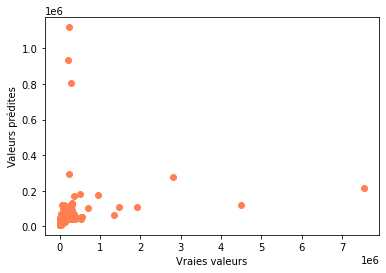

In [613]:
model3 = linear_model.LassoLars(normalize=True, max_iter=500) 

param_grid3 = {'alpha': np.logspace(-2, -1, 200)}

cv=5

modelisation(model3, param_grid3, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'Lasso-Lars (Test)', 'Lasso-Lars (Entrainement)')

In [614]:
df_lin_las_ST = df_model
df_lin_las_ST

,Variable Stat,Lasso-Lars (Test),Lasso-Lars (Entrainement)
0,MedAE,1.872983e+04,1.966842e+04
1,MeanAE,1.153864e+05,9.829477e+04
2,MSE,2.897386e+11,2.570284e+11
3,RMSE,5.382738e+05,5.069797e+05
4,R2,1.966659e-02,2.880735e-01
5,Temps (en s),4.373570e-04,1.099902e-01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'alpha': 0.010595601792776159}
Temps Entrainement 0.11s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 695684843034.082
MedAE : 21128.25
MeanAE : 157423.30
RMSE : 834077.24
R2 : 0.18
******************************************************
Statistiques du Train Set
MSE : 117722828795.40047
MedAE : 18343.51
MeanAE : 82435.96
RMSE : 343107.61
R2 : 0.04
  Variable Stat  Lasso-Lars (Test)  Lasso-Lars (Entrainement)
0         MedAE       2.112825e+04               1.834351e+04
1        MeanAE       1.574233e+05               8.243596e+04
2           MSE       6.956848e+11               1.177228e+11
3          RMSE       8.340772e+05               3.431076e+05
4            R2       1.767620e-01               4.040604e-02
5  Temps (en s)       3.171850e-04               1.110701e-01
<class 'pandas.core.frame.DataFrame'>


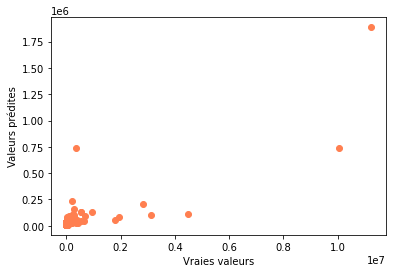

In [626]:
model3 = linear_model.LassoLars(normalize=True, max_iter=500) 

param_grid3 = {'alpha': np.logspace(-2, -1, 200)}

cv=5

modelisation(model3, param_grid3, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'Lasso-Lars (Test)', 'Lasso-Lars (Entrainement)')

In [627]:
df_lin_las_sans = df_model
df_lin_las_sans

,Variable Stat,Lasso-Lars (Test),Lasso-Lars (Entrainement)
0,MedAE,2.112825e+04,1.834351e+04
1,MeanAE,1.574233e+05,8.243596e+04
2,MSE,6.956848e+11,1.177228e+11
3,RMSE,8.340772e+05,3.431076e+05
4,R2,1.767620e-01,4.040604e-02
5,Temps (en s),3.171850e-04,1.110701e-01


### Modèle linéaire elasticnet

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'l1_ratio': 0.03220379152409336, 'alpha': 0.0025529080682395165}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 291487372173.54803
MedAE : 16041.12
MeanAE : 116328.77
RMSE : 539895.70
R2 : 0.01
******************************************************
Statistiques du Train Set
MSE : 304499212303.2812
MedAE : 17367.96
MeanAE : 103301.14
RMSE : 551814.47
R2 : 0.16
  Variable Stat  ElasticNet (Test)  ElasticNet (Entrainement)
0         MedAE       1.604112e+04               1.736796e+04
1        MeanAE       1.163288e+05               1.033011e+05
2           MSE       2.914874e+11               3.044992e+11
3          RMSE       5.398957e+05               5.518145e+05
4            R2       1.374972e-02               1.565873e-01
5  Temps (en s)       1.235990e-04               8.785431e-02
<class 'pandas.core.frame.DataFrame'>


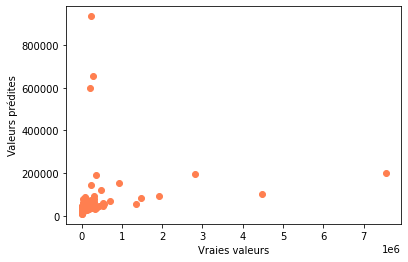

In [656]:
model4 = linear_model.ElasticNet(normalize=True, random_state=0, max_iter=500) 

param_grid4 = {'alpha': np.logspace(-3, 0, 200), 
               'l1_ratio':  np.random.random(100)}

cv=5

modelisation(model4, param_grid4, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'ElasticNet (Test)', 'ElasticNet (Entrainement)')

In [657]:
df_lin_elnet_ST = df_model
df_lin_elnet_ST

,Variable Stat,ElasticNet (Test),ElasticNet (Entrainement)
0,MedAE,1.604112e+04,1.736796e+04
1,MeanAE,1.163288e+05,1.033011e+05
2,MSE,2.914874e+11,3.044992e+11
3,RMSE,5.398957e+05,5.518145e+05
4,R2,1.374972e-02,1.565873e-01
5,Temps (en s),1.235990e-04,8.785431e-02


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'l1_ratio': 0.9929699733772979, 'alpha': 0.0059411339849650335}
Temps Entrainement 0.09s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 364250538470.0539
MedAE : 21402.08
MeanAE : 134015.43
RMSE : 603531.72
R2 : 0.57
******************************************************
Statistiques du Train Set
MSE : 122287444713.4641
MedAE : 18704.98
MeanAE : 84863.61
RMSE : 349696.22
R2 : 0.00
  Variable Stat  ElasticNet (Test)  ElasticNet (Entrainement)
0         MedAE       2.140208e+04               1.870498e+04
1        MeanAE       1.340154e+05               8.486361e+04
2           MSE       3.642505e+11               1.222874e+11
3          RMSE       6.035317e+05               3.496962e+05
4            R2       5.689645e-01               3.198488e-03
5  Temps (en s)       1.179750e-04               9.143922e-02
<class 'pandas.core.frame.DataFrame'>


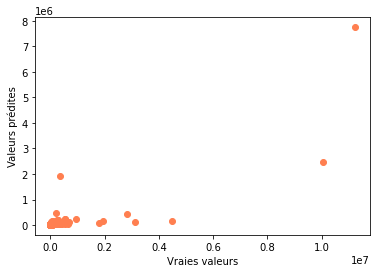

In [669]:
model4 = linear_model.ElasticNet(normalize=True, random_state=0, max_iter=500) 

param_grid4 = {'alpha': np.logspace(-3, -2, 200), 
               'l1_ratio':  np.random.random(100)}

cv=5

modelisation(model4, param_grid4, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'ElasticNet (Test)', 'ElasticNet (Entrainement)')

In [670]:
df_lin_elnet_sans = df_model
df_lin_elnet_sans

,Variable Stat,ElasticNet (Test),ElasticNet (Entrainement)
0,MedAE,2.140208e+04,1.870498e+04
1,MeanAE,1.340154e+05,8.486361e+04
2,MSE,3.642505e+11,1.222874e+11
3,RMSE,6.035317e+05,3.496962e+05
4,R2,5.689645e-01,3.198488e-03
5,Temps (en s),1.179750e-04,9.143922e-02


## Modèles Non-Linéaires

### Modèle non-linéaire - Ridge avec Kernel rbf

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.005672426068491977, 'alpha': 0.024374441501222206}
Temps Entrainement 0.56s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 60370914346.05431
MedAE : 17087.74
MeanAE : 71692.10
RMSE : 245704.93
R2 : 0.80
******************************************************
Statistiques du Train Set
MSE : 59895168837.42147
MedAE : 18435.51
MeanAE : 64878.69
RMSE : 244734.90
R2 : 0.83
  Variable Stat  Ridge avec Kernel rbf (Test)  \
0         MedAE                  1.708774e+04   
1        MeanAE                  7.169210e+04   
2           MSE                  6.037091e+10   
3          RMSE                  2.457049e+05   
4            R2                  7.957344e-01   
5  Temps (en s)                  3.965386e-03   

   Ridge avec Kernel rbf (Entrainement)  
0                          1.843551e+04  
1                          6.487869e+04  
2                          5.989517e+10  
3                   

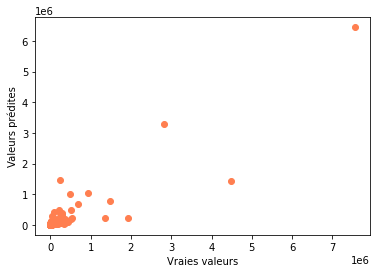

In [690]:
model5 = KernelRidge(kernel='rbf') # noyau Gaussien

param_grid5 = {'alpha': np.logspace(-2, -1, 200), 
               'gamma': np.logspace(-3, 2, 200)}

cv=5

modelisation(model5, param_grid5, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'Ridge avec Kernel rbf (Test)', 'Ridge avec Kernel rbf (Entrainement)')

In [691]:
df_kr_rbf_ST = df_model
df_kr_rbf_ST

,Variable Stat,Ridge avec Kernel rbf (Test),Ridge avec Kernel rbf (Entrainement)
0,MedAE,1.708774e+04,1.843551e+04
1,MeanAE,7.169210e+04,6.487869e+04
2,MSE,6.037091e+10,5.989517e+10
3,RMSE,2.457049e+05,2.447349e+05
4,R2,7.957344e-01,8.341002e-01
5,Temps (en s),3.965386e-03,5.594853e-01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.010353218432956621, 'alpha': 0.0005805225516094895}
Temps Entrainement 0.52s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 464245007875.78033
MedAE : 18091.72
MeanAE : 133184.62
RMSE : 681355.27
R2 : 0.45
******************************************************
Statistiques du Train Set
MSE : 16191571433.561485
MedAE : 15253.98
MeanAE : 50023.44
RMSE : 127246.11
R2 : 0.87
  Variable Stat  Ridge avec Kernel rbf (Test)  \
0         MedAE                  1.809172e+04   
1        MeanAE                  1.331846e+05   
2           MSE                  4.642450e+11   
3          RMSE                  6.813553e+05   
4            R2                  4.506361e-01   
5  Temps (en s)                  3.642280e-03   

   Ridge avec Kernel rbf (Entrainement)  
0                          1.525398e+04  
1                          5.002344e+04  
2                          1.619157e+10  
3               

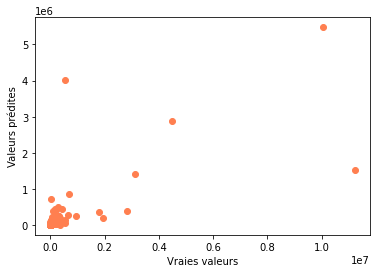

In [788]:
model5 = KernelRidge(kernel='rbf') # noyau Gaussien

param_grid5 = {'alpha': np.logspace(-4, -3, 200), 
               'gamma': np.logspace(-2, -1, 200)}

cv=5

modelisation(model5, param_grid5, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'Ridge avec Kernel rbf (Test)', 'Ridge avec Kernel rbf (Entrainement)')

In [789]:
df_kr_rbf_sans = df_model
df_kr_rbf_sans

,Variable Stat,Ridge avec Kernel rbf (Test),Ridge avec Kernel rbf (Entrainement)
0,MedAE,1.809172e+04,1.525398e+04
1,MeanAE,1.331846e+05,5.002344e+04
2,MSE,4.642450e+11,1.619157e+10
3,RMSE,6.813553e+05,1.272461e+05
4,R2,4.506361e-01,8.680177e-01
5,Temps (en s),3.642280e-03,5.191234e-01


### Modèle non-linéaire - Random Forest Regressor

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 8}
Temps Entrainement 12.84s
Temps Test 0.11s
*******************************************************
Statistiques du Test Set
MSE : 142915335529.84464
MedAE : 16702.10
MeanAE : 85758.21
RMSE : 378041.45
R2 : 0.52
******************************************************
Statistiques du Train Set
MSE : 61213530522.37796
MedAE : 11394.23
MeanAE : 47226.13
RMSE : 247413.68
R2 : 0.83
  Variable Stat  Random Forest Regression (Test)  \
0         MedAE                     1.670210e+04   
1        MeanAE                     8.575821e+04   
2           MSE                     1.429153e+11   
3          RMSE                     3.780414e+05   
4            R2                     5.164446e-01   
5  Temps (en s)                     1.060360e-01   

   Random Forest Regression (Entrainement)  
0                             1.139423e+04  
1                             4.722613e+04  
2                             6

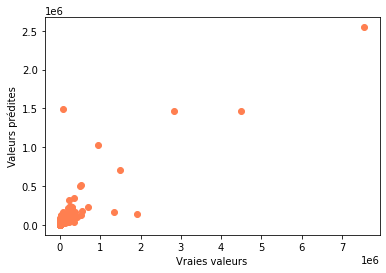

In [722]:
model6 = RandomForestRegressor(random_state=0, #à fixer pour avoir la même série de nb aléatoire 
                               n_jobs=-1, oob_score = True)

param_grid6 = {'n_estimators': [50, 200], # nb arbre # dpd du jeu de données # pas dans la GSCV #perte mémmoire et temps cal
               'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], # pas 1 pour prof arbre
              }

cv=5

modelisation(model6, param_grid6, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'Random Forest Regression (Test)', 'Random Forest Regression (Entrainement)')

In [723]:
df_rf_reg_ST = df_model
df_rf_reg_ST

,Variable Stat,Random Forest Regression (Test),Random Forest Regression (Entrainement)
0,MedAE,1.670210e+04,1.139423e+04
1,MeanAE,8.575821e+04,4.722613e+04
2,MSE,1.429153e+11,6.121353e+10
3,RMSE,3.780414e+05,2.474137e+05
4,R2,5.164446e-01,8.304486e-01
5,Temps (en s),1.060360e-01,1.284285e+01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 8}
Temps Entrainement 12.69s
Temps Test 0.11s
*******************************************************
Statistiques du Test Set
MSE : 792072301388.2727
MedAE : 19089.95
MeanAE : 151929.85
RMSE : 889984.44
R2 : 0.06
******************************************************
Statistiques du Train Set
MSE : 39441468226.857445
MedAE : 10673.51
MeanAE : 47876.31
RMSE : 198598.76
R2 : 0.68
  Variable Stat  Random Forest Regression (Test)  \
0         MedAE                     1.908995e+04   
1        MeanAE                     1.519299e+05   
2           MSE                     7.920723e+11   
3          RMSE                     8.899844e+05   
4            R2                     6.270198e-02   
5  Temps (en s)                     1.073366e-01   

   Random Forest Regression (Entrainement)  
0                             1.067351e+04  
1                             4.787631e+04  
2                             

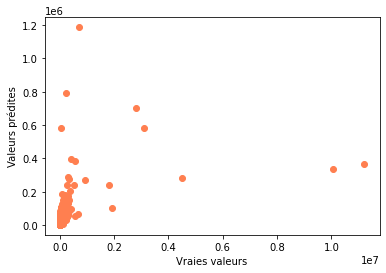

In [797]:
model6 = RandomForestRegressor(random_state=0, #à fixer pour avoir la même série de nb aléatoire 
                               n_jobs=-1, oob_score = True)

param_grid6 = {'n_estimators': [50, 200], # nb arbre # dpd du jeu de données # pas dans la GSCV #perte mémmoire et temps cal
               'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], # pas 1 pour prof arbre
              }

cv=5

modelisation(model6, param_grid6, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'Random Forest Regression (Test)', 'Random Forest Regression (Entrainement)')

In [728]:
df_rf_reg_sans = df_model
df_rf_reg_sans

,Variable Stat,Random Forest Regression (Test),Random Forest Regression (Entrainement)
0,MedAE,1.908995e+04,1.067351e+04
1,MeanAE,1.519299e+05,4.787631e+04
2,MSE,7.920723e+11,3.944147e+10
3,RMSE,8.899844e+05,1.985988e+05
4,R2,6.270198e-02,6.785008e-01
5,Temps (en s),1.065850e-01,1.287095e+01


### Modèle non-linéaire - Support Vector Regression avec Kernel rbf

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.007316807143427192, 'C': 18.251834943190424}
Temps Entrainement 57.24s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 56162086045.80134
MedAE : 16717.14
MeanAE : 71908.61
RMSE : 236985.41
R2 : 0.81
******************************************************
Statistiques du Train Set
MSE : 26472846202.347492
MedAE : 18737.04
MeanAE : 57132.54
RMSE : 162704.78
R2 : 0.93
  Variable Stat  Support Vector Regression (Test)  \
0         MedAE                      1.671714e+04   
1        MeanAE                      7.190861e+04   
2           MSE                      5.616209e+10   
3          RMSE                      2.369854e+05   
4            R2                      8.099751e-01   
5  Temps (en s)                      5.118193e-03   

   Support Vector Regression (Entrainement)  
0                              1.873704e+04  
1                              5.713254e+04  
2                         

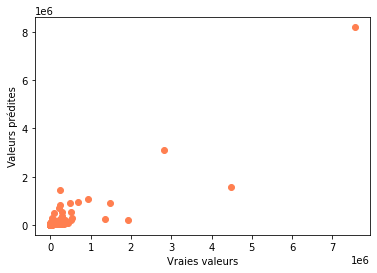

In [735]:
model7 = SVR(kernel='rbf', epsilon=.1)

param_grid7 = {'C': np.logspace(-3, 5, 200), 
               'gamma': np.logspace(-3, 1, 200)}

cv=5

modelisation(model7, param_grid7, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'Support Vector Regression (Test)', 'Support Vector Regression (Entrainement)')

In [736]:
df_svr_rbf_ST = df_model
df_svr_rbf_ST

,Variable Stat,Support Vector Regression (Test),Support Vector Regression (Entrainement)
0,MedAE,1.671714e+04,1.873704e+04
1,MeanAE,7.190861e+04,5.713254e+04
2,MSE,5.616209e+10,2.647285e+10
3,RMSE,2.369854e+05,1.627048e+05
4,R2,8.099751e-01,9.266746e-01
5,Temps (en s),5.118193e-03,5.723510e+01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'gamma': 0.0010234114021054528, 'C': 29.331662783900438}
Temps Entrainement 30.55s
Temps Test 0.01s
*******************************************************
Statistiques du Test Set
MSE : 676130959384.2708
MedAE : 19511.52
MeanAE : 147680.03
RMSE : 822271.83
R2 : 0.20
******************************************************
Statistiques du Train Set
MSE : 95911454298.62773
MedAE : 17992.29
MeanAE : 75635.83
RMSE : 309695.74
R2 : 0.22
  Variable Stat  Support Vector Regression (Test)  \
0         MedAE                      1.951152e+04   
1        MeanAE                      1.476800e+05   
2           MSE                      6.761310e+11   
3          RMSE                      8.222718e+05   
4            R2                      1.999011e-01   
5  Temps (en s)                      5.592666e-03   

   Support Vector Regression (Entrainement)  
0                              1.799229e+04  
1                              7.563583e+04  
2                        

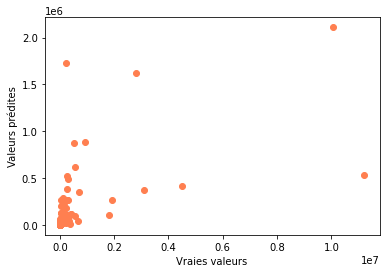

In [766]:
model7 = SVR(kernel='rbf', epsilon=.1)

param_grid7 = {'C': np.logspace(0, 4, 200), 
               'gamma': np.logspace(-5, 3, 200)}

cv=5

modelisation(model7, param_grid7, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'Support Vector Regression (Test)', 'Support Vector Regression (Entrainement)')

In [767]:
df_svr_rbf_sans = df_model
df_svr_rbf_sans

,Variable Stat,Support Vector Regression (Test),Support Vector Regression (Entrainement)
0,MedAE,1.951152e+04,1.799229e+04
1,MeanAE,1.476800e+05,7.563583e+04
2,MSE,6.761310e+11,9.591145e+10
3,RMSE,8.222718e+05,3.096957e+05
4,R2,1.999011e-01,2.181971e-01
5,Temps (en s),5.592666e-03,3.055293e+01


### Modèle non-linéaire - Support Vector Regression avec Kernel polynomial 

1 - Avec ENERGYSTARScore

2 - Sans ENERGYSTARScore

### Modèle non-linéaire - KNN

1 - Avec ENERGYSTARScore

Les paramètres optimaux sont {'n_neighbors': 11, 'metric': 'manhattan'}
Temps Entrainement 0.19s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 269305392808.3884
MedAE : 18685.71
MeanAE : 103657.32
RMSE : 518946.43
R2 : 0.09
******************************************************
Statistiques du Train Set
MSE : 305359866092.0853
MedAE : 18886.10
MeanAE : 91062.06
RMSE : 552593.76
R2 : 0.15
  Variable Stat  K Nearest Neighbors (Test)  \
0         MedAE                1.868571e+04   
1        MeanAE                1.036573e+05   
2           MSE                2.693054e+11   
3          RMSE                5.189464e+05   
4            R2                8.880265e-02   
5  Temps (en s)                4.861176e-03   

   K Nearest Neighbors (Entrainement)  
0                        1.888610e+04  
1                        9.106206e+04  
2                        3.053599e+11  
3                        5.525938e+05  
4                    

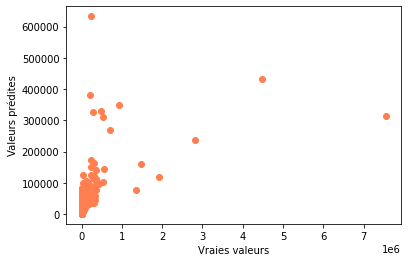

In [757]:
model8 = KNeighborsRegressor()

param_grid8 = {'n_neighbors': np.arange(1, 25),
               'metric': ['euclidean', 'manhattan', 'minkowski']} 

cv=5

modelisation(model8, param_grid8, cv, 
                  X4_train, y4_train, X4_test, y4_test, 
                  'K Nearest Neighbors (Test)', 'K Nearest Neighbors (Entrainement)')

In [758]:
df_knn_ST = df_model
df_knn_ST

,Variable Stat,K Nearest Neighbors (Test),K Nearest Neighbors (Entrainement)
0,MedAE,1.868571e+04,1.888610e+04
1,MeanAE,1.036573e+05,9.106206e+04
2,MSE,2.693054e+11,3.053599e+11
3,RMSE,5.189464e+05,5.525938e+05
4,R2,8.880265e-02,1.542034e-01
5,Temps (en s),4.861176e-03,1.873463e-01


2 - Sans ENERGYSTARScore

Les paramètres optimaux sont {'n_neighbors': 11, 'metric': 'manhattan'}
Temps Entrainement 0.18s
Temps Test 0.00s
*******************************************************
Statistiques du Test Set
MSE : 794174698148.6965
MedAE : 22118.82
MeanAE : 154996.67
RMSE : 891164.80
R2 : 0.06
******************************************************
Statistiques du Train Set
MSE : 102232964261.33351
MedAE : 16377.43
MeanAE : 72355.86
RMSE : 319738.90
R2 : 0.17
  Variable Stat  K Nearest Neighbors (Test)  \
0         MedAE                2.211882e+04   
1        MeanAE                1.549967e+05   
2           MSE                7.941747e+11   
3          RMSE                8.911648e+05   
4            R2                6.021411e-02   
5  Temps (en s)                4.866116e-03   

   K Nearest Neighbors (Entrainement)  
0                        1.637743e+04  
1                        7.235586e+04  
2                        1.022330e+11  
3                        3.197389e+05  
4                   

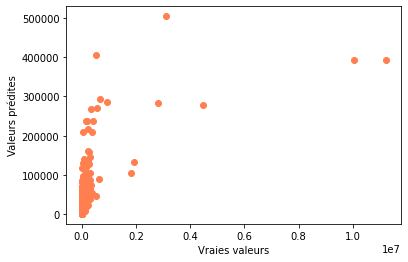

In [759]:
model8 = KNeighborsRegressor()

param_grid8 = {'n_neighbors': np.arange(1, 25),
               'metric': ['euclidean', 'manhattan', 'minkowski']} 

cv=5

modelisation(model8, param_grid8, cv, 
                  X6_train, y6_train, X6_test, y6_test, 
                  'K Nearest Neighbors (Test)', 'K Nearest Neighbors (Entrainement)')

In [760]:
df_knn_sans = df_model
df_knn_sans

,Variable Stat,K Nearest Neighbors (Test),K Nearest Neighbors (Entrainement)
0,MedAE,2.211882e+04,1.637743e+04
1,MeanAE,1.549967e+05,7.235586e+04
2,MSE,7.941747e+11,1.022330e+11
3,RMSE,8.911648e+05,3.197389e+05
4,R2,6.021411e-02,1.666686e-01
5,Temps (en s),4.866116e-03,1.830396e-01


## Comparaison des modèles entre eux

1 - Avec ENERGYSTARScore

<Figure size 432x288 with 0 Axes>

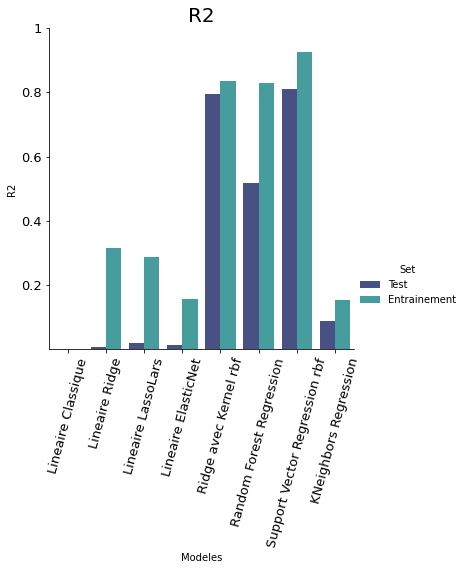

<Figure size 432x288 with 0 Axes>

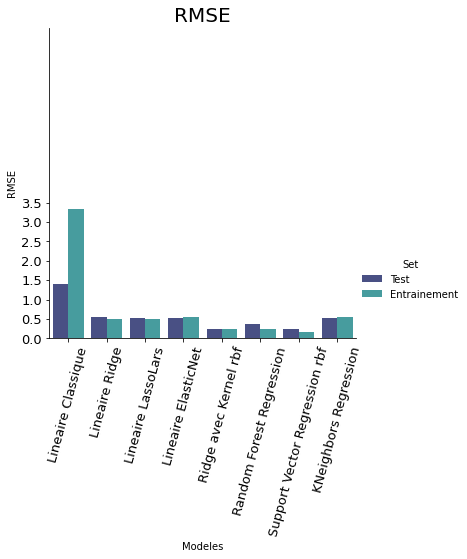

<Figure size 432x288 with 0 Axes>

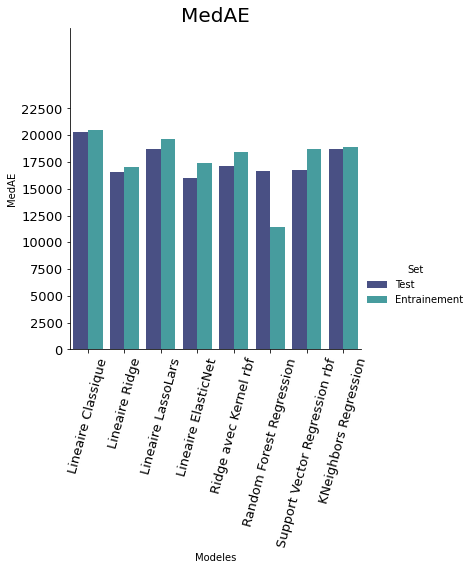

<Figure size 432x288 with 0 Axes>

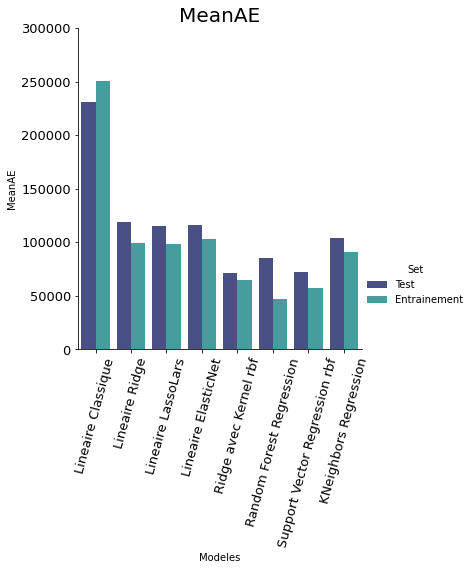

In [761]:
comparaison(df_lin_cl_ST, df_lin_rid_ST, df_lin_las_ST, df_lin_elnet_ST, df_kr_rbf_ST, df_rf_reg_ST, df_svr_rbf_ST, df_knn_ST)

In [762]:
df_mod_CO2_ST = df_mod_T
df_mod_CO2_ST

,MedAE,MeanAE,MSE,RMSE,R2,Temps (en s),Modeles,Set
Linéaire classique (Test),20336.845443,231307.198267,1.970755e+12,1.403836e+06,-5.668067,0.000390,Lineaire Classique,Test
Linéaire classique (Entrainement),20528.143739,250737.212209,1.108735e+13,3.329767e+06,-29.710128,0.012507,Lineaire Classique,Entrainement
Ridge linéaire (Test),16530.766644,118947.469897,2.928541e+11,5.411600e+05,0.009125,0.000419,Lineaire Ridge,Test
Ridge linéaire (Entrainement),16997.850531,98989.924359,2.471661e+11,4.971580e+05,0.315391,0.085968,Lineaire Ridge,Entrainement
Lasso-Lars (Test),18729.831876,115386.356323,2.897386e+11,5.382738e+05,0.019667,0.000437,Lineaire LassoLars,Test
Lasso-Lars (Entrainement),19668.419548,98294.772784,2.570284e+11,5.069797e+05,0.288074,0.109990,Lineaire LassoLars,Entrainement
ElasticNet (Test),16041.115431,116328.765367,2.914874e+11,5.398957e+05,0.013750,0.000124,Lineaire ElasticNet,Test
ElasticNet (Entrainement),17367.959813,103301.135187,3.044992e+11,5.518145e+05,0.156587,0.087854,Lineaire ElasticNet,Entrainement
Ridge avec Kernel rbf (Test),17087.740243,71692.104708,6.037091e+10,2.457049e+05,0.795734,0.003965,Ridge avec Kernel rbf,Test
Ridge avec Kernel rbf (Entrainement),18435.512594,64878.690110,5.989517e+10,2.447349e+05,0.834100,0.559485,Ridge avec Kernel rbf,Entrainement


2 - Sans ENERGYSTARScore

<Figure size 432x288 with 0 Axes>

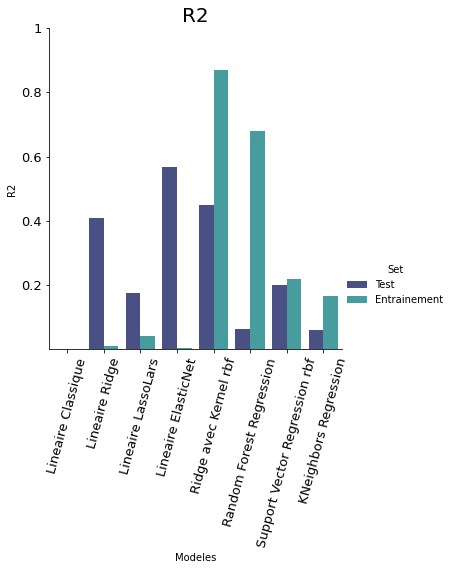

<Figure size 432x288 with 0 Axes>

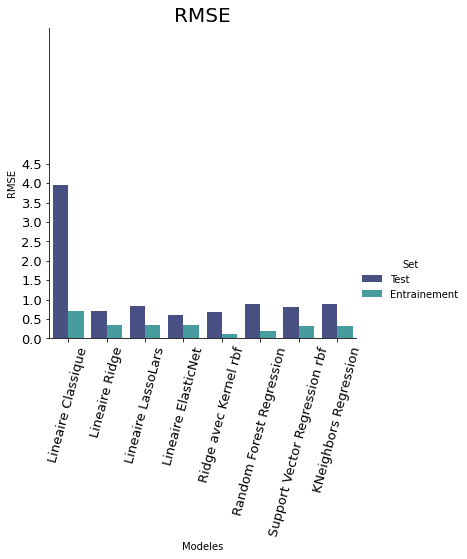

<Figure size 432x288 with 0 Axes>

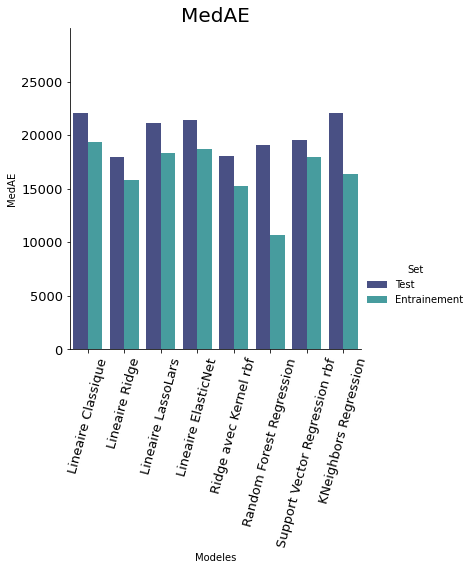

<Figure size 432x288 with 0 Axes>

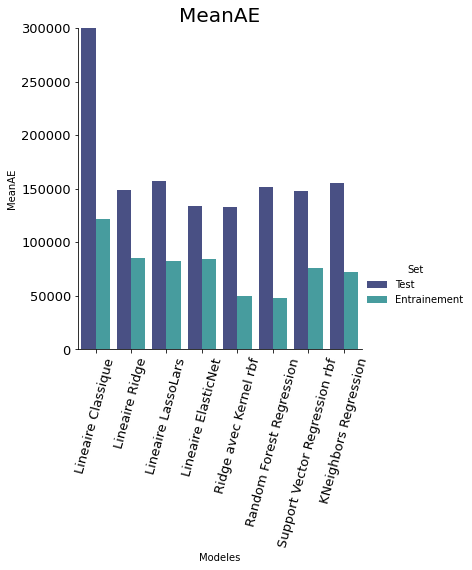

In [790]:
comparaison(df_lin_cl_sans, df_lin_rid_sans, df_lin_las_sans, df_lin_elnet_sans, df_kr_rbf_sans, df_rf_reg_sans, df_svr_rbf_sans, df_knn_sans)

In [791]:
df_mod_CO2_sans = df_mod_T
df_mod_CO2_sans

,MedAE,MeanAE,MSE,RMSE,R2,Temps (en s),Modeles,Set
Linéaire classique (Test),22028.091940,347395.993211,1.562723e+13,3.953129e+06,-17.492465,0.000352,Lineaire Classique,Test
Linéaire classique (Entrainement),19387.197730,121661.741067,4.864866e+11,6.974859e+05,-2.965497,0.011868,Lineaire Classique,Entrainement
Ridge linéaire (Test),17967.244626,149008.446358,5.003373e+11,7.073453e+05,0.407926,0.000122,Lineaire Ridge,Test
Ridge linéaire (Entrainement),15813.918619,85648.457306,1.214263e+11,3.484627e+05,0.010218,0.100960,Lineaire Ridge,Entrainement
Lasso-Lars (Test),21128.253352,157423.298059,6.956848e+11,8.340772e+05,0.176762,0.000317,Lineaire LassoLars,Test
Lasso-Lars (Entrainement),18343.507327,82435.961432,1.177228e+11,3.431076e+05,0.040406,0.111070,Lineaire LassoLars,Entrainement
ElasticNet (Test),21402.083419,134015.427849,3.642505e+11,6.035317e+05,0.568964,0.000118,Lineaire ElasticNet,Test
ElasticNet (Entrainement),18704.981182,84863.612021,1.222874e+11,3.496962e+05,0.003198,0.091439,Lineaire ElasticNet,Entrainement
Ridge avec Kernel rbf (Test),18091.716946,133184.617886,4.642450e+11,6.813553e+05,0.450636,0.003642,Ridge avec Kernel rbf,Test
Ridge avec Kernel rbf (Entrainement),15253.977060,50023.441318,1.619157e+10,1.272461e+05,0.868018,0.519123,Ridge avec Kernel rbf,Entrainement


In [765]:
df_mod_CO2_ST

,MedAE,MeanAE,MSE,RMSE,R2,Temps (en s),Modeles,Set
Linéaire classique (Test),20336.845443,231307.198267,1.970755e+12,1.403836e+06,-5.668067,0.000390,Lineaire Classique,Test
Linéaire classique (Entrainement),20528.143739,250737.212209,1.108735e+13,3.329767e+06,-29.710128,0.012507,Lineaire Classique,Entrainement
Ridge linéaire (Test),16530.766644,118947.469897,2.928541e+11,5.411600e+05,0.009125,0.000419,Lineaire Ridge,Test
Ridge linéaire (Entrainement),16997.850531,98989.924359,2.471661e+11,4.971580e+05,0.315391,0.085968,Lineaire Ridge,Entrainement
Lasso-Lars (Test),18729.831876,115386.356323,2.897386e+11,5.382738e+05,0.019667,0.000437,Lineaire LassoLars,Test
Lasso-Lars (Entrainement),19668.419548,98294.772784,2.570284e+11,5.069797e+05,0.288074,0.109990,Lineaire LassoLars,Entrainement
ElasticNet (Test),16041.115431,116328.765367,2.914874e+11,5.398957e+05,0.013750,0.000124,Lineaire ElasticNet,Test
ElasticNet (Entrainement),17367.959813,103301.135187,3.044992e+11,5.518145e+05,0.156587,0.087854,Lineaire ElasticNet,Entrainement
Ridge avec Kernel rbf (Test),17087.740243,71692.104708,6.037091e+10,2.457049e+05,0.795734,0.003965,Ridge avec Kernel rbf,Test
Ridge avec Kernel rbf (Entrainement),18435.512594,64878.690110,5.989517e+10,2.447349e+05,0.834100,0.559485,Ridge avec Kernel rbf,Entrainement
